# Chicagoans Love Our Pizza

As a native Chicagoan, I want to take this opportunity to dig into a serious question -- who has the best pizza, and what factors may be contributing to these ratings.

I spent a summer eating my way through and rating 20 Chicago pizza joints. I now will scrape the yelp reviews for those restaurants and do some data analysis on the ratings and the text reviews.

In [13]:
#c.StoreMagic.autorestore = True #automatically restores stored variables at startup
from bs4 import BeautifulSoup

In [12]:
from urllib.request import urlopen
import re
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
#nltk.download()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import sentiwordnet as swn

import calendar
import datetime

#from collections import Counter # don't need this. can use FreqDist

# Getting the Data

In [21]:
yelp_base = "http://www.yelp.com/biz/"
mediary = "?start="

restaurants = [#"vito-and-nicks-pizzeria-chicago", "home-run-inn-chicago", "union-pizzeria-evanston", 
               "paisans-pizza-cicero","coalfire-pizza-chicago", "lou-malnatis-pizzeria-lincolnwood",
               "martinos-italian-cuisine-and-pizzeria-chicago", "d-agostinos-pizza-and-pub-chicago-2",
               "bennys-pizza-berwyn", "freddys-pizza-cicero", "connies-pizza-chicago", "the-boiler-room-chicago-2",
               "flo-and-santos-chicago-3", "dantes-pizzeria-chicago-2", "spacca-napoli-chicago", "pizanos-pizza-chicago-2",
               "the-art-of-pizza-chicago", "pizza-rustica-italian-bistro-and-bar-chicago-3",
               "pequods-pizzeria-chicago", "piece-brewery-and-pizzeria-chicago"]


'''make a list of review counts for each of the restaurants
get review count; this will be used to specify the endings for url pages, so know how many pages need to loop through
for each restaurant'''

review_cnt_lst = []
for item in restaurants:
    url = yelp_base + item + mediary
    print(url)

    page = urlopen(url)
    soup = BeautifulSoup(page, "lxml")
    try:
        #this gives the review count listed in 
        exp = re.sub("</span", "", str(soup.find('span', {'itemprop': 'reviewCount'})).split('>')[1])
        review_cnt_lst.append(exp)
    except IndexError as indxerr:
        print(indxerr)
        
#this had stopped working and that's because I was getting sent to captcha page instead of to the actual yelp page


http://www.yelp.com/biz/paisans-pizza-cicero?start=
http://www.yelp.com/biz/coalfire-pizza-chicago?start=
http://www.yelp.com/biz/lou-malnatis-pizzeria-lincolnwood?start=
http://www.yelp.com/biz/martinos-italian-cuisine-and-pizzeria-chicago?start=
http://www.yelp.com/biz/d-agostinos-pizza-and-pub-chicago-2?start=
http://www.yelp.com/biz/bennys-pizza-berwyn?start=
http://www.yelp.com/biz/freddys-pizza-cicero?start=
http://www.yelp.com/biz/connies-pizza-chicago?start=
http://www.yelp.com/biz/the-boiler-room-chicago-2?start=
http://www.yelp.com/biz/flo-and-santos-chicago-3?start=
http://www.yelp.com/biz/dantes-pizzeria-chicago-2?start=
http://www.yelp.com/biz/spacca-napoli-chicago?start=
http://www.yelp.com/biz/pizanos-pizza-chicago-2?start=
http://www.yelp.com/biz/the-art-of-pizza-chicago?start=
http://www.yelp.com/biz/pizza-rustica-italian-bistro-and-bar-chicago-3?start=
http://www.yelp.com/biz/pequods-pizzeria-chicago?start=
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?st

In [14]:
with urlopen("https://www.yelp.com/biz/dantes-pizzeria-chicago-2") as conn:
    soup = BeautifulSoup(conn, "lxml")

In [970]:
#review_cnt_lst

In [23]:
#loop through web pages for a restaurant and compile reviews info in a data frame;about 10 minutes to run 10 restaurants
reviews_df = pd.DataFrame()

for i in range(0, len(restaurants)):
    

    page_order = list(range(0, int(review_cnt_lst[i]), 20))

    url_base = yelp_base + restaurants[i] + mediary
    
    res = restaurants[i]

    for page in list(range(0,len(page_order))):

        yelp_url = "".join([url_base, str(page_order[page])])
        print(yelp_url)

        with urlopen(yelp_url) as conn:
            soup = BeautifulSoup(conn, "lxml")

            #find this tag which indicates start of block of reviews
            rev1 = soup.find('script', {'type' : 'application/ld+json'}) 
            # list of review information, where each reviewer is element
            review_lst = (str(rev1).split('{"reviewRating":')) 

            rting_lst = []
            pub_lst = []
            desc_lst = []

            for element in review_lst:
                '''break down the components of each list element to get rating, date, and description'''
                indiv_lst = (element.split('": '))
                rating = (indiv_lst[1].split('}')[0])
                date = indiv_lst[2].split(',')[0].strip('"')
                description = indiv_lst[3].strip('", author')

                #create a list of each of the target variables
                rting_lst.append(rating)
                pub_lst.append(date)
                desc_lst.append(description)

            #then add variable lists to dictionary and dictionary to dataframe
            dic = {'restaurant' : res ,'publish_date' : pub_lst, 'rating' : rting_lst, 'review_desc' : desc_lst} 
            df = pd.DataFrame.from_dict(dic)
            reviews_df = reviews_df.append(df, ignore_index=True)
            

            # get rid of that awkward row
reviews_df = reviews_df[reviews_df.rating != '{"reviewCount']

print(reviews_df.head())
print(len(reviews_df))
print(np.unique((reviews_df[reviews_df.columns[2]])))

http://www.yelp.com/biz/paisans-pizza-cicero?start=0
http://www.yelp.com/biz/paisans-pizza-cicero?start=20
http://www.yelp.com/biz/paisans-pizza-cicero?start=40
http://www.yelp.com/biz/coalfire-pizza-chicago?start=0
http://www.yelp.com/biz/coalfire-pizza-chicago?start=20
http://www.yelp.com/biz/coalfire-pizza-chicago?start=40
http://www.yelp.com/biz/coalfire-pizza-chicago?start=60
http://www.yelp.com/biz/coalfire-pizza-chicago?start=80
http://www.yelp.com/biz/coalfire-pizza-chicago?start=100
http://www.yelp.com/biz/coalfire-pizza-chicago?start=120
http://www.yelp.com/biz/coalfire-pizza-chicago?start=140
http://www.yelp.com/biz/coalfire-pizza-chicago?start=160
http://www.yelp.com/biz/coalfire-pizza-chicago?start=180
http://www.yelp.com/biz/coalfire-pizza-chicago?start=200
http://www.yelp.com/biz/coalfire-pizza-chicago?start=220
http://www.yelp.com/biz/coalfire-pizza-chicago?start=240
http://www.yelp.com/biz/coalfire-pizza-chicago?start=260
http://www.yelp.com/biz/coalfire-pizza-chicago?

http://www.yelp.com/biz/connies-pizza-chicago?start=40
http://www.yelp.com/biz/connies-pizza-chicago?start=60
http://www.yelp.com/biz/connies-pizza-chicago?start=80
http://www.yelp.com/biz/connies-pizza-chicago?start=100
http://www.yelp.com/biz/connies-pizza-chicago?start=120
http://www.yelp.com/biz/connies-pizza-chicago?start=140
http://www.yelp.com/biz/connies-pizza-chicago?start=160
http://www.yelp.com/biz/connies-pizza-chicago?start=180
http://www.yelp.com/biz/connies-pizza-chicago?start=200
http://www.yelp.com/biz/connies-pizza-chicago?start=220
http://www.yelp.com/biz/connies-pizza-chicago?start=240
http://www.yelp.com/biz/connies-pizza-chicago?start=260
http://www.yelp.com/biz/connies-pizza-chicago?start=280
http://www.yelp.com/biz/connies-pizza-chicago?start=300
http://www.yelp.com/biz/connies-pizza-chicago?start=320
http://www.yelp.com/biz/connies-pizza-chicago?start=340
http://www.yelp.com/biz/connies-pizza-chicago?start=360
http://www.yelp.com/biz/connies-pizza-chicago?start

http://www.yelp.com/biz/spacca-napoli-chicago?start=680
http://www.yelp.com/biz/spacca-napoli-chicago?start=700
http://www.yelp.com/biz/spacca-napoli-chicago?start=720
http://www.yelp.com/biz/spacca-napoli-chicago?start=740
http://www.yelp.com/biz/spacca-napoli-chicago?start=760
http://www.yelp.com/biz/spacca-napoli-chicago?start=780
http://www.yelp.com/biz/spacca-napoli-chicago?start=800
http://www.yelp.com/biz/spacca-napoli-chicago?start=820
http://www.yelp.com/biz/spacca-napoli-chicago?start=840
http://www.yelp.com/biz/spacca-napoli-chicago?start=860
http://www.yelp.com/biz/spacca-napoli-chicago?start=880
http://www.yelp.com/biz/spacca-napoli-chicago?start=900
http://www.yelp.com/biz/spacca-napoli-chicago?start=920
http://www.yelp.com/biz/spacca-napoli-chicago?start=940
http://www.yelp.com/biz/spacca-napoli-chicago?start=960
http://www.yelp.com/biz/spacca-napoli-chicago?start=980
http://www.yelp.com/biz/spacca-napoli-chicago?start=1000
http://www.yelp.com/biz/spacca-napoli-chicago?s

http://www.yelp.com/biz/pizza-rustica-italian-bistro-and-bar-chicago-3?start=0
http://www.yelp.com/biz/pizza-rustica-italian-bistro-and-bar-chicago-3?start=20
http://www.yelp.com/biz/pizza-rustica-italian-bistro-and-bar-chicago-3?start=40
http://www.yelp.com/biz/pizza-rustica-italian-bistro-and-bar-chicago-3?start=60
http://www.yelp.com/biz/pizza-rustica-italian-bistro-and-bar-chicago-3?start=80
http://www.yelp.com/biz/pizza-rustica-italian-bistro-and-bar-chicago-3?start=100
http://www.yelp.com/biz/pizza-rustica-italian-bistro-and-bar-chicago-3?start=120
http://www.yelp.com/biz/pizza-rustica-italian-bistro-and-bar-chicago-3?start=140
http://www.yelp.com/biz/pizza-rustica-italian-bistro-and-bar-chicago-3?start=160
http://www.yelp.com/biz/pizza-rustica-italian-bistro-and-bar-chicago-3?start=180
http://www.yelp.com/biz/pizza-rustica-italian-bistro-and-bar-chicago-3?start=200
http://www.yelp.com/biz/pizza-rustica-italian-bistro-and-bar-chicago-3?start=220
http://www.yelp.com/biz/pizza-rust

http://www.yelp.com/biz/pequods-pizzeria-chicago?start=1960
http://www.yelp.com/biz/pequods-pizzeria-chicago?start=1980
http://www.yelp.com/biz/pequods-pizzeria-chicago?start=2000
http://www.yelp.com/biz/pequods-pizzeria-chicago?start=2020
http://www.yelp.com/biz/pequods-pizzeria-chicago?start=2040
http://www.yelp.com/biz/pequods-pizzeria-chicago?start=2060
http://www.yelp.com/biz/pequods-pizzeria-chicago?start=2080
http://www.yelp.com/biz/pequods-pizzeria-chicago?start=2100
http://www.yelp.com/biz/pequods-pizzeria-chicago?start=2120
http://www.yelp.com/biz/pequods-pizzeria-chicago?start=2140
http://www.yelp.com/biz/pequods-pizzeria-chicago?start=2160
http://www.yelp.com/biz/pequods-pizzeria-chicago?start=2180
http://www.yelp.com/biz/pequods-pizzeria-chicago?start=2200
http://www.yelp.com/biz/pequods-pizzeria-chicago?start=2220
http://www.yelp.com/biz/pequods-pizzeria-chicago?start=2240
http://www.yelp.com/biz/pequods-pizzeria-chicago?start=2260
http://www.yelp.com/biz/pequods-pizzeria

http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=500
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=520
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=540
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=560
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=580
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=600
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=620
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=640
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=660
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=680
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=700
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=720
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=740
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=760
http://www.yelp.com/biz/piece-brew

http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=2860
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=2880
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=2900
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=2920
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=2940
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=2960
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=2980
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=3000
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=3020
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=3040
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=3060
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=3080
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=3100
http://www.yelp.com/biz/piece-brewery-and-pizzeria-chicago?start=3120
http://www.yelp.com/

In [24]:
print(len(reviews_df))
print(np.unique((reviews_df[reviews_df.columns[2]])))

16132
['bennys-pizza-berwyn' 'coalfire-pizza-chicago' 'connies-pizza-chicago'
 'd-agostinos-pizza-and-pub-chicago-2' 'dantes-pizzeria-chicago-2'
 'flo-and-santos-chicago-3' 'freddys-pizza-cicero'
 'lou-malnatis-pizzeria-lincolnwood'
 'martinos-italian-cuisine-and-pizzeria-chicago' 'paisans-pizza-cicero'
 'pequods-pizzeria-chicago' 'piece-brewery-and-pizzeria-chicago'
 'pizanos-pizza-chicago-2' 'pizza-rustica-italian-bistro-and-bar-chicago-3'
 'spacca-napoli-chicago' 'the-art-of-pizza-chicago'
 'the-boiler-room-chicago-2']


In [26]:
'''Want to save reviews_df so dont have to ping yelp again. 
   Eventually will need to get the reviews for the three other restaurants and add them to the df, but worry about that
   later. Store magic should work. http://ipython.org/ipython-doc/rel-0.12/config/extensions/storemagic.html'''

%store reviews_df

Stored 'reviews_df' (DataFrame)


In [4]:
#%store -r reviews_df

In [16]:
#make a copy of reviews df so won't mess up frame
df_copy = reviews_df.copy()

# Summarizing Ratings


Let's start by getting an idea of the ratings that people gave in their reviews. We'll start with a quick description of each restaurant.

We quickly see that all but one restaurant has an average rating above 3.0, except Paisan's, which also has the lowest number of reviews. We also see that there is a huge range in the number of reviews from restaurant to restaurant.

In [276]:
#esc + m to go into markdown mode
#esc + dd to delete a cell
#esc + a to add a cell above

#this data was last pulled from yelp on 1/22/18

In [19]:
#make sure correct datatypes
df_copy['publish_date'] = pd.to_datetime(df_copy['publish_date'])
df_copy['rating'] = df_copy.rating.astype(float)
df_copy['restaurant'] = df_copy.restaurant.apply(str)


publish_date    datetime64[ns]
rating                 float64
restaurant              object
review_desc             object
dtype: object

In [15]:
df_copy.groupby('restaurant')['rating'].describe()

count      mean       std  \
restaurant                                                                   
bennys-pizza-berwyn                               64.0  3.796875  1.416229   
coalfire-pizza-chicago                           978.0  4.232106  0.957816   
connies-pizza-chicago                            482.0  3.622407  1.358180   
d-agostinos-pizza-and-pub-chicago-2              422.0  3.125592  1.349183   
dantes-pizzeria-chicago-2                        110.0  3.909091  1.317110   
flo-and-santos-chicago-3                         746.0  3.831099  1.117715   
freddys-pizza-cicero                             454.0  4.667401  0.775988   
lou-malnatis-pizzeria-lincolnwood                519.0  4.198459  1.129252   
martinos-italian-cuisine-and-pizzeria-chicago     97.0  3.371134  1.543262   
paisans-pizza-cicero                              55.0  2.727273  1.638140   
pequods-pizzeria-chicago                        4104.0  3.940789  1.261806   
piece-brewery-and-pizzeria-chicago              3220.0  4.011491  1.001176   
pizanos-pizza-chicago-2                         1140.0  3.368421  1.384494   
pizza-rustica-italian-bistro-and-bar-chicago-3   600.0  3.728333  1.354346   
spacca-napoli-chicago                           1260.0  4.119048  1.112476   
the-art-of-pizza-chicago                        1066.0  4.037523  1.153276   
the-boiler-room-chicago-2                        815.0  3.622086  1.239007   

                                                min   25%  50%  75%  max  
restaurant                                                                
bennys-pizza-berwyn                             1.0  3.75  4.0  5.0  5.0  
coalfire-pizza-chicago                          1.0  4.00  4.0  5.0  5.0  
connies-pizza-chicago                           1.0  3.00  4.0  5.0  5.0  
d-agostinos-pizza-and-pub-chicago-2             1.0  2.00  3.0  4.0  5.0  
dantes-pizzeria-chicago-2                       1.0  3.00  4.0  5.0  5.0  
flo-and-santos-chicago-3                        1.0  3.00  4.0  5.0  5.0  
freddys-pizza-cicero                            1.0  5.00  5.0  5.0  5.0  
lou-malnatis-pizzeria-lincolnwood               1.0  4.00  5.0  5.0  5.0  
martinos-italian-cuisine-and-pizzeria-chicago   1.0  2.00  4.0  5.0  5.0  
paisans-pizza-cicero                            1.0  1.00  3.0  4.0  5.0  
pequods-pizzeria-chicago                        1.0  3.00  4.0  5.0  5.0  
piece-brewery-and-pizzeria-chicago              1.0  4.00  4.0  5.0  5.0  
pizanos-pizza-chicago-2                         1.0  2.00  4.0  5.0  5.0  
pizza-rustica-italian-bistro-and-bar-chicago-3  1.0  3.00  4.0  5.0  5.0  
spacca-napoli-chicago                           1.0  4.00  4.0  5.0  5.0  
the-art-of-pizza-chicago                        1.0  4.00  4.0  5.0  5.0  
the-boiler-room-chicago-2                       1.0  3.00  4.0  5.0  5.0

In [21]:
#Create different date variables

df_copy['Month'] = df_copy['publish_date'].map(lambda x: x.month) # January is 1

dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df_copy['WeekDay'] = df_copy['publish_date'].dt.dayofweek.map(dayOfWeek) #Monday is 0

df_copy['Year'] = df_copy['publish_date'].dt.year

# this gives sort of a YearMonth variable, but keeps a date object
df_copy['AdjustedDateToEndOfMonth'] = df_copy['publish_date'].map(
    lambda x: datetime.datetime(
        x.year,
        x.month,
        max(calendar.monthcalendar(x.year, x.month)[-1][:5])
    ))

df_copy.head()

publish_date  rating            restaurant  \
1   2017-12-29     5.0  paisans-pizza-cicero   
2   2017-11-17     1.0  paisans-pizza-cicero   
3   2017-12-17     1.0  paisans-pizza-cicero   
4   2017-07-14     4.0  paisans-pizza-cicero   
5   2017-05-01     5.0  paisans-pizza-cicero   

                                         review_desc  Month WeekDay  Year  
1  This is the GOAT of all pizza spots in Cicero....     12  Friday  2017  
2  I won't be ordering from Paisan's ever again. ...     11  Friday  2017  
3  I placed an online order for delivery. The web...     12  Sunday  2017  
4  Solid pizza. I have no complaints. I like the ...      7  Friday  2017  
5  Love their pizza and other things they have to...      5  Monday  2017

## Over Time

Let's see how the average rating looks for each restaurant over time. From the plot below, we see that most restaurants have relatively steady ratings, with some bumps along the way. In particular, Benny's has a huge dip in 2013, and Paisan's has two large dips in 2008 and 2015. We see that D'Agostino was on a decline from 2006 to 2008 but levelled off.

Let's investigate to see if the number of reviews have huge bearing on the average ratings.

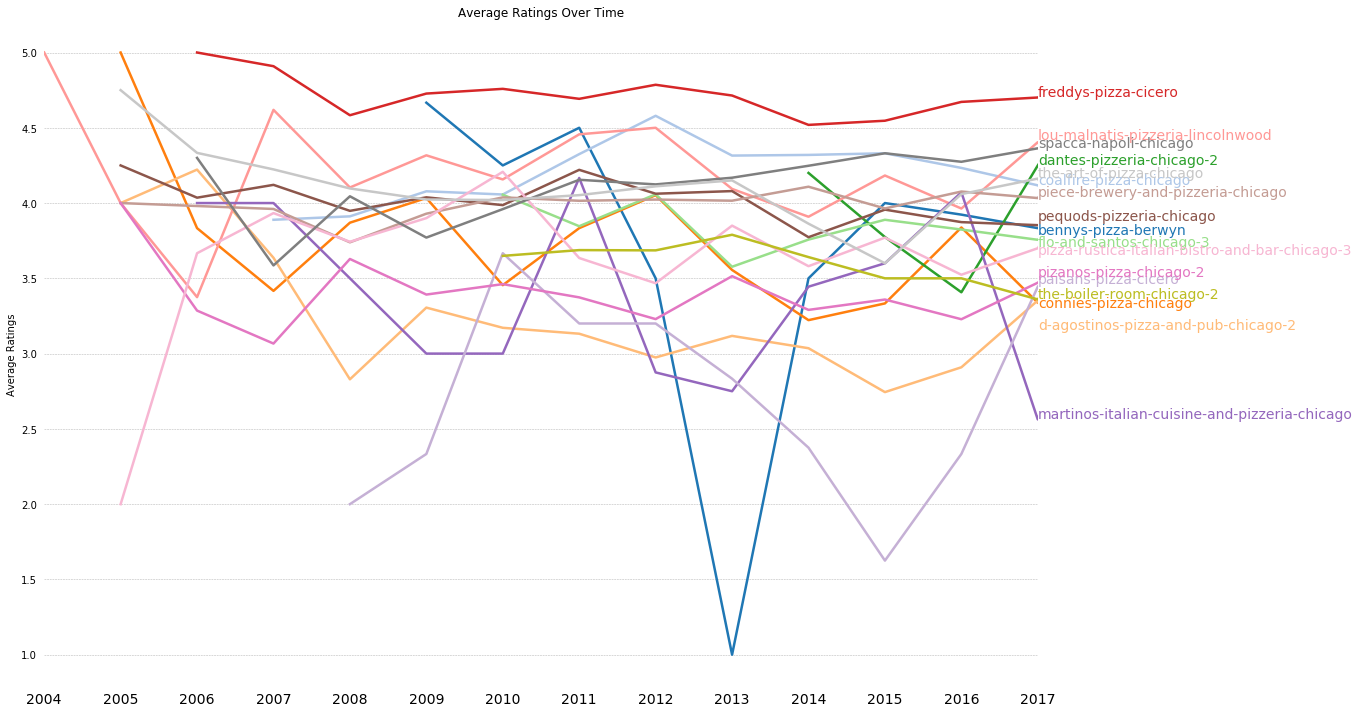

In [420]:
yrGrp = df_copy.groupby(['restaurant','Year'])['rating'].mean().reset_index()

yrGrpRatWide = yrGrp.pivot(index='Year', columns='restaurant', values = 'rating').reset_index()


#apply a ylimit on the above plot to see more detail on the other restaurants
# These are the colors that will be used in the plot
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22']#, '#dbdb8d', '#17becf', '#9edae5']

# You typically want your plot to be ~1.33x wider than tall. This plot
# is a rare exception because of the number of lines being plotted on it.
# Common sizes: (10, 7.5) and (12, 9)
fig, ax = plt.subplots(1,1,figsize=(20, 10))
#fig, ax = plt.subplots(1, 1, figsize=(12, 14))


# Remove the plot frame lines. They are unnecessary here.
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Ensure that the axis ticks only show up on the bottom and left of the plot.
# Ticks on the right and top of the plot are generally unnecessary.
ax.get_xaxis().tick_bottom()
#ax.get_yaxis().tick_left()

fig.subplots_adjust(left=.06, right=.75, bottom=.02, top=.94)
# Limit the range of the plot to only where the data is.
# Avoid unnecessary whitespace.
ax.set_xlim(2004, 2017)
#ax.set_ylim(0, 200)

# Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
plt.xticks(range(2004, 2018, 1), fontsize=14)
#plt.yticks(range(0, 200, 10), fontsize=14)
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))
#ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

# Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

ax.set( ylabel='Average Ratings',
       title='Average Ratings Over Time')

# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted.
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='on', left='off', right='off', labelleft='on')

# Now that the plot is prepared, it's time to actually plot the data!
# Note that I plotted the majors in order of the highest % in the final year.
joints = list(yrGrpRatWide)[1:]


y_offsets = {'lou-malnatis-pizzeria-lincolnwood': 0.01, 
             'pizanos-pizza-chicago-2': 0.03,
             'paisans-pizza-cicero': 0.01,
             'connies-pizza-chicago': -0.04, 
             'd-agostinos-pizza-and-pub-chicago-2': -0.2,
            'pequods-pizzeria-chicago' : 0.02,
            'bennys-pizza-berwyn': -.05,
            'flo-and-santos-chicago-3': -.05,
            'pizza-rustica-italian-bistro-and-bar-chicago-3': -0.05}

for rank, column in enumerate(joints):
    # Plot each line separately with its own color.
    column_rec_name = column#.replace('\n', '_').replace(' ', '_').lower()

    line = plt.plot(yrGrpRatWide['Year'],
                    yrGrpRatWide[column_rec_name],
                    lw=2.5,
                    color=color_sequence[rank])

    # Add a text label to the right end of every line. Most of the code below
    # is adding specific offsets y position because some labels overlapped.
    y_pos = list(yrGrpRatWide[column_rec_name])[-2] + 0.01
          

    if column in y_offsets:
        y_pos += y_offsets[column]

    # Again, make sure that all labels are large enough to be easily read
    # by the viewer.
    plt.text(2017, y_pos, column, fontsize=14, color=color_sequence[rank])




 (2004, 2017),

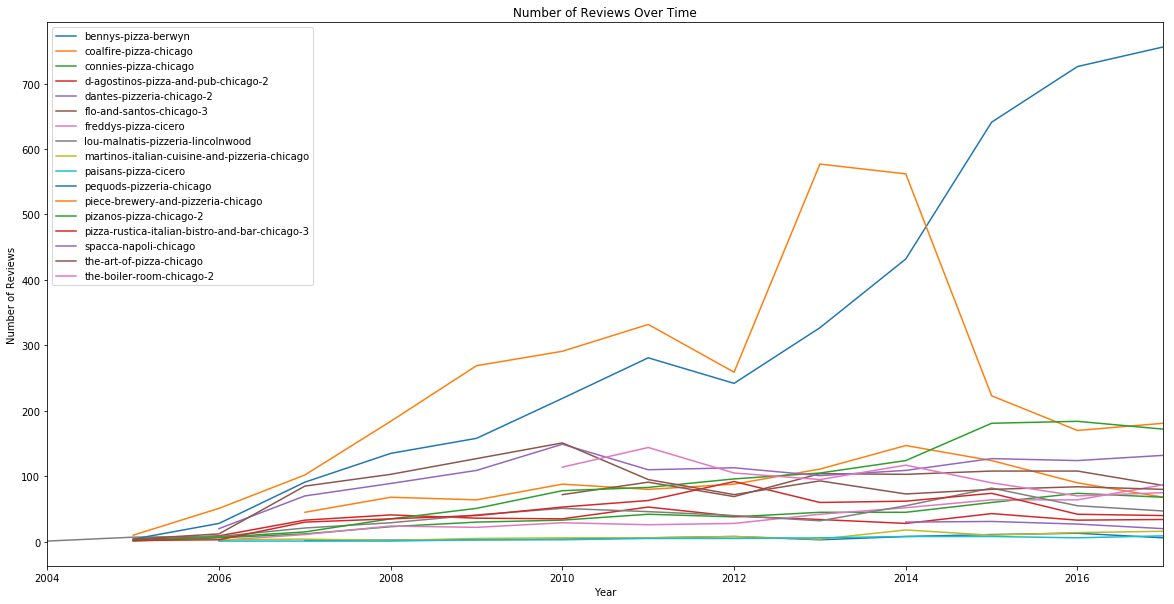

In [182]:
yrGrpCnt = df_copy.groupby(['restaurant','Year'])['rating'].count().reset_index()
yrGrpCnt = yrGrpCnt.rename(columns={'rating':'ReviewsCount'})
#yrGrpCnt.head()

fig, ax = plt.subplots(figsize=(20,10))
grouped = yrGrpCnt.groupby('restaurant')
for key, group in grouped:
    group.plot(ax =ax, x = 'Year', y='ReviewsCount', label=key)
ax.set( ylabel='Number of Reviews',
       title='Number of Reviews Over Time',
      xlim = (2004,2017))

Right away we see that the number of people that have reviewed Pequod's has been increasing by bounds for the past 5 years. Piece Brewery had some gains for several years, but had been on the decline since 2014. 

Pequod's has been featured on several food network shows since 2015, and has won other awards/accolades in and around Chicago area.

Since these two restaurants have so many more reviews relative to the others, let's set a limit to take a closer look at the trend of review counts for the other restaurants.



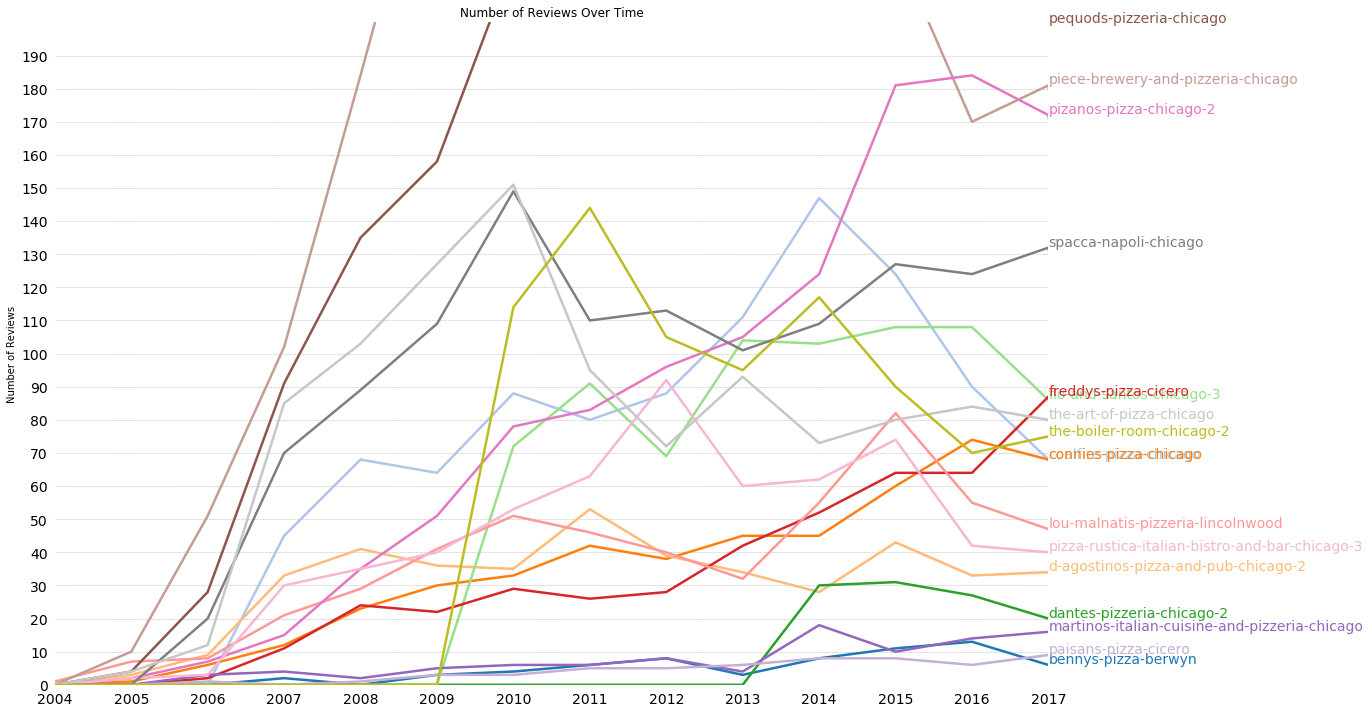

In [421]:
yrGrpWide = yrGrpCnt.pivot(index='Year', columns='restaurant', values = 'ReviewsCount').reset_index().fillna(0)



#apply a ylimit on the above plot to see more detail on the other restaurants
# These are the colors that will be used in the plot
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22']#, '#dbdb8d', '#17becf', '#9edae5']

# You typically want your plot to be ~1.33x wider than tall. This plot
# is a rare exception because of the number of lines being plotted on it.
# Common sizes: (10, 7.5) and (12, 9)
fig, ax = plt.subplots(1,1,figsize=(20, 10))
#fig, ax = plt.subplots(1, 1, figsize=(12, 14))


# Remove the plot frame lines. They are unnecessary here.
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Ensure that the axis ticks only show up on the bottom and left of the plot.
# Ticks on the right and top of the plot are generally unnecessary.
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

fig.subplots_adjust(left=.06, right=.75, bottom=.02, top=.94)
# Limit the range of the plot to only where the data is.
# Avoid unnecessary whitespace.
ax.set_xlim(2004, 2017)
ax.set_ylim(0, 200)

# Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
plt.xticks(range(2004, 2018, 1), fontsize=14)
plt.yticks(range(0, 200, 10), fontsize=14)
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))
#ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

# Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted.
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='on', left='off', right='off', labelleft='on')

# Now that the plot is prepared, it's time to actually plot the data!
# Note that I plotted the majors in order of the highest % in the final year.
joints = list(yrGrpWide)[1:]

ax.set( ylabel='Number of Reviews',
       title='Number of Reviews Over Time')


for rank, column in enumerate(joints):
    # Plot each line separately with its own color.
    column_rec_name = column#.replace('\n', '_').replace(' ', '_').lower()

    line = plt.plot(yrGrpWide['Year'],
                    yrGrpWide[column_rec_name],
                    lw=2.5,
                    color=color_sequence[rank])

    # Add a text label to the right end of every line. Most of the code below
    # is adding specific offsets y position because some labels overlapped.
    if column != 'pequods-pizzeria-chicago':
        y_pos = list(yrGrpWide[column_rec_name])[-2] + 0.5
    else:
        y_pos = 200
        

    #if column in y_offsets:
     #   y_pos += y_offsets[column]

    # Again, make sure that all labels are large enough to be easily read
    # by the viewer.
    plt.text(2017, y_pos, column, fontsize=14, color=color_sequence[rank])




Earlier we mentioned that Benny's and Paisan's had major ratings drops. We can see here that the number of reviews is very small, and thus greatly influenced by a single rating.

For most restaurants we see a general increase in reviews. This is probably moreso a reflection of a changing society, where it has become more common/normal to leave internet ratings. However, there are some restaurant that hit a peak and seem to be on a steady decline, such as Coalfire and the Boiler Room. This may actually be an indicator in the decline of popularity of the restaurant.  

Reviews for restaurants like Pizano's has been increasing linearly for about 10 years, which indicates that they continue to bring in people to their restaurant; and a certain demographic -- people that write reviews. 

Note: Vito and Nicks aired in 2009 on Triple D

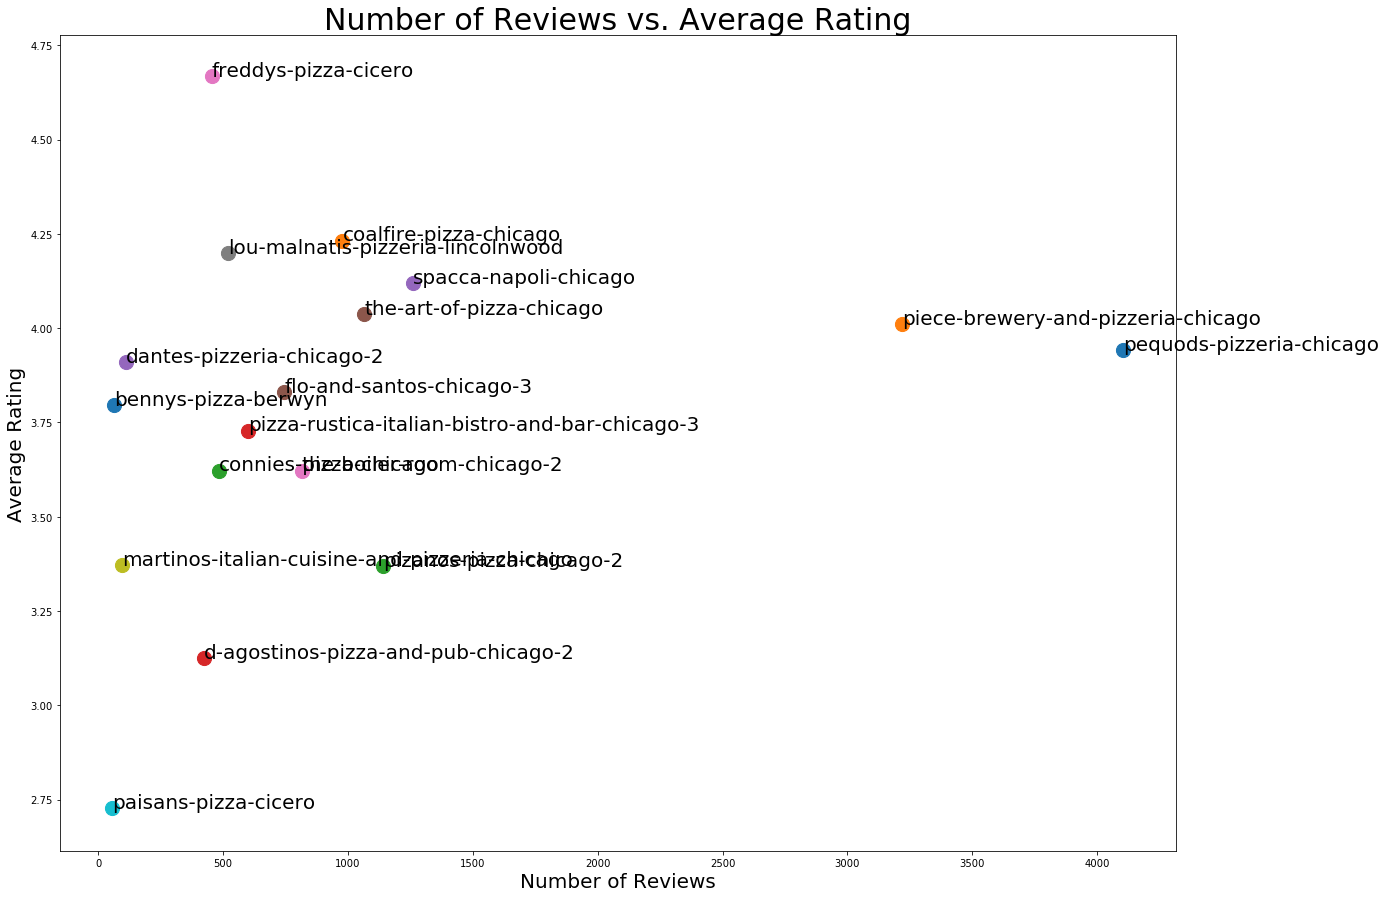

In [260]:
rtgCnt = df_copy.groupby('restaurant')['rating'].aggregate([np.mean, 'count']).reset_index()

fig, ax = plt.subplots(figsize=(20,15))

for i in range(len(rtgCnt)):
   
    ax.scatter(rtgCnt['count'][i], rtgCnt['mean'][i], s = 200)
    ax.annotate(rtgCnt['restaurant'][i], (rtgCnt['count'][i], rtgCnt['mean'][i]), fontsize=20)
ax.set_title('Number of Reviews vs. Average Rating',fontsize= 30)
ax.set_xlabel('Number of Reviews',fontsize = 20)
ax.set_ylabel('Average Rating',fontsize = 20)


Above, we can see the relationship between number of reviews and average rating. There is a positive relationship, but outliers like Piece and Pequod's show that the most ratings doesn't equate the best, while restaurants like Dante's and Benny's show that lower number of reviews doesn't knock you from being in the top rated.

It would be interesting to do some statistical analysis on this relationship with even more restaurants to draw some insights into the relationship between review popularity and the goodness of the restaurant... Perhaps in another project.

## Does Day of the Week Matter?

The last thing I want to check if the day of the week seems to have any relationship with ratings. The plot below shows a histogram of ratings for all restaurants, and the contribution that each day of the week made to a bin. The ratings skew to the left in an asymmetrical distribution, and each day of the week seems to contribute relatively equally to each bin.

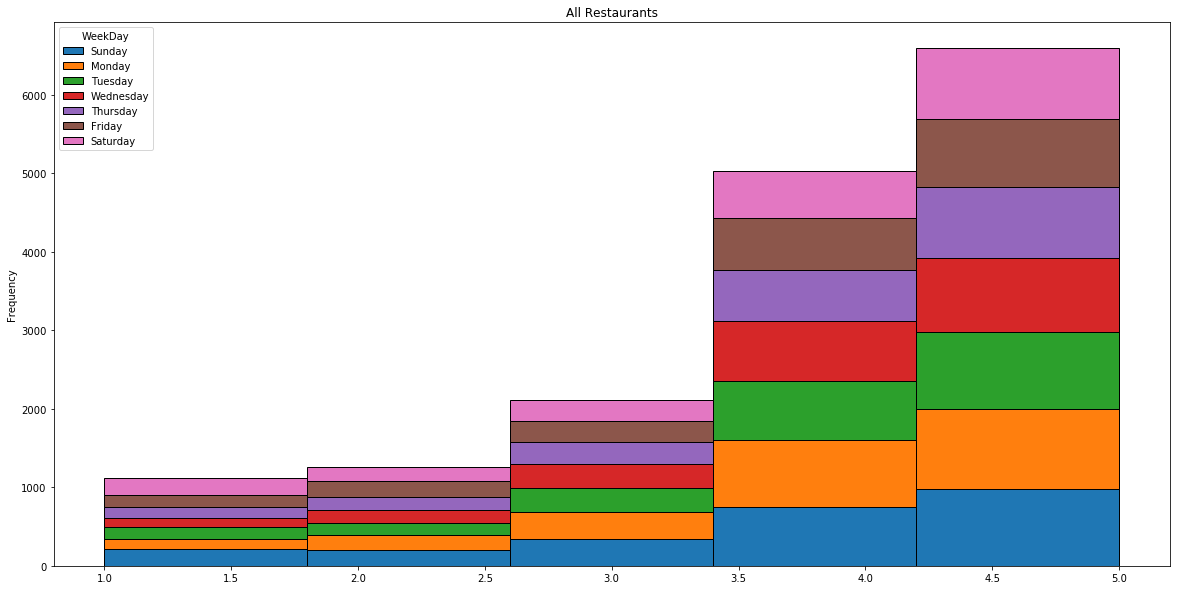

In [971]:
''' Want to make overlapping histograms of ratings. Each different histogram color will be a day or the week'''

#get a dataframe where each weekday is a column and rating is the values

df4 = df_copy.pivot( columns='WeekDay', values = 'rating')
df4 = df4[['Sunday','Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday']] #reorder the columns


df4.plot.hist(bins=5, figsize=(20,10), edgecolor='black', stacked=True, title="All Restaurants")

If we look closer at each individual restaurant, we see the distributions vary and the weekday contributions vary. For example, over a third of Paisan's top rating were published on a Monday and a quarter of their lowest ratings were published on a Sunday.

Probably about a quarter or more of Benny's top ratings were published on a Monday. 

It's interesting to speculate whether perhaps the quality of the food or service varies depending on the day of the week. But in truth, this data could not really shed light on this, since we don't know if the date a review is published is the date that the reviewer actually visited the restaurant.

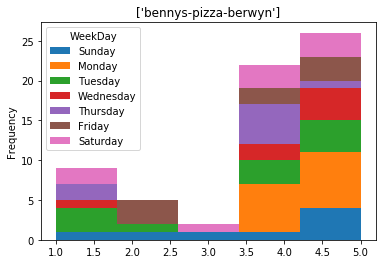

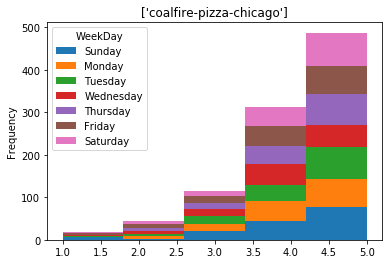

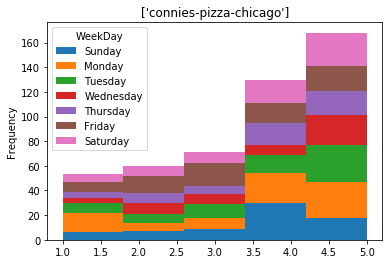

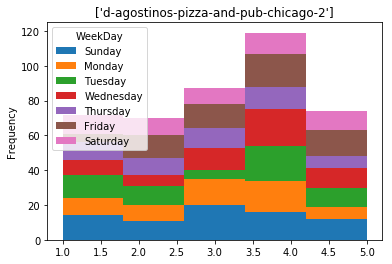

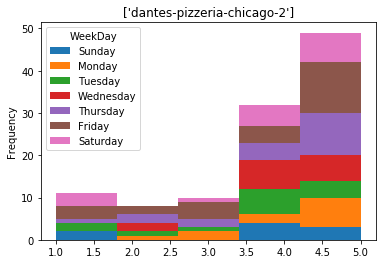

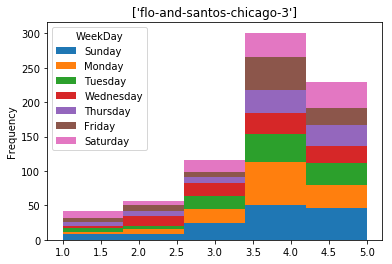

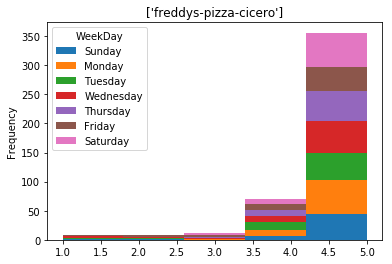

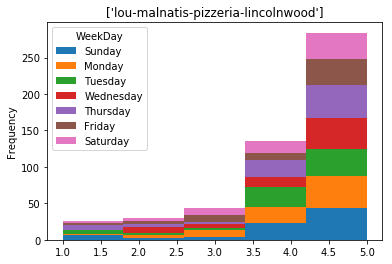

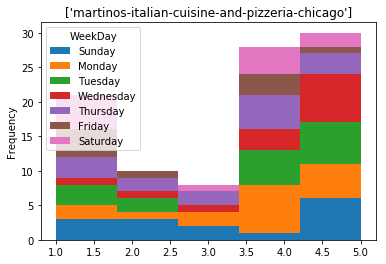

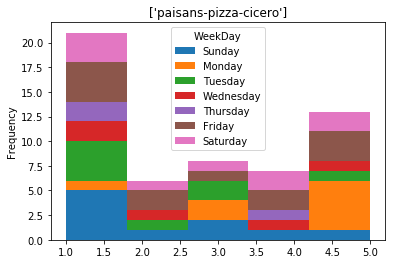

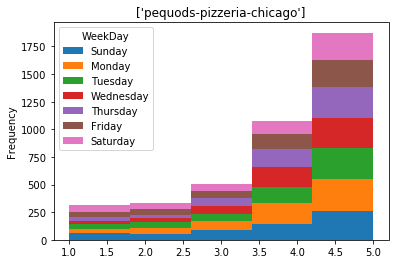

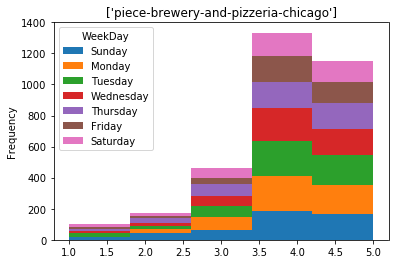

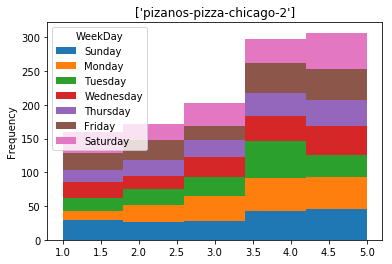

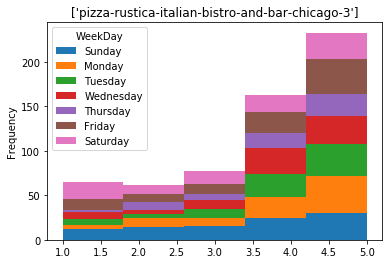

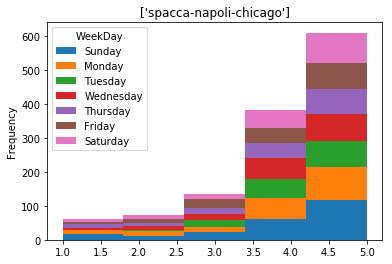

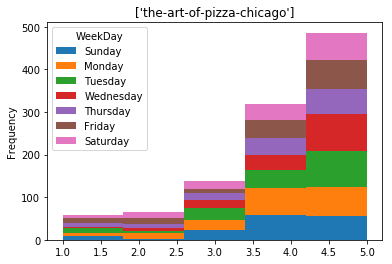

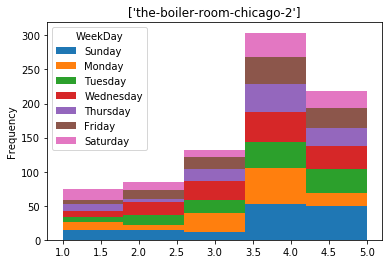

In [270]:
for key, res in df_copy.groupby('restaurant'):
    #print(res)
    
    piv = res.pivot( columns='WeekDay', values = 'rating')
    piv = piv[['Sunday','Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday']] #reorder the columns
    piv.plot.hist(bins=5, stacked = True, title=str(np.unique(res['restaurant'])))

# Digging into the Text

In [ ]:
# work with df_copy
''' Whats going to be the best way to get text representations for each of the 20 restaurants?
Maybe making a loop and then looking into bigrams and most common words is the best way to go. Perhaps
Make these into a word cloud representation. Or perhaps something like a term document matrix, where itll 
show the common words, but also the scarcity'''

In [695]:
stop_words = set(stopwords.words('english'))
throwaways = [".", ",", "!","'", "'s", "n't", "''","...","``", ")", "(", "us" ,"would","one","'ve", "?", "\\\\",
             "got","gets","went", "none","'m","[","]",":","also","-","'re","'ll"] # a list of punction and things to get rid of


In [518]:
#make each column all the reviews for a particular restaurant
descWide = df_copy.pivot(columns ='restaurant', values= 'review_desc')

#function returns an object where each restaurant is key, and the item is a list of top 40 frequency tuples
def topwords_fun(reviews):
    
    bigstring = str(reviews.tolist()).lower().strip(r"\\n\\")
    tokens = word_tokenize(bigstring)
    #print(tokens)
    
    filtered_desc = []
    for word in tokens:
        if word not in stop_words and word not in throwaways:
            filterd_desc = filtered_desc.append(word)
    
    freqd = nltk.FreqDist(filtered_desc)
    topwords = freqd.most_common(40)
    
    return(topwords)
    
    
    
topWordsDic = descWide.apply(topwords_fun, axis=0)

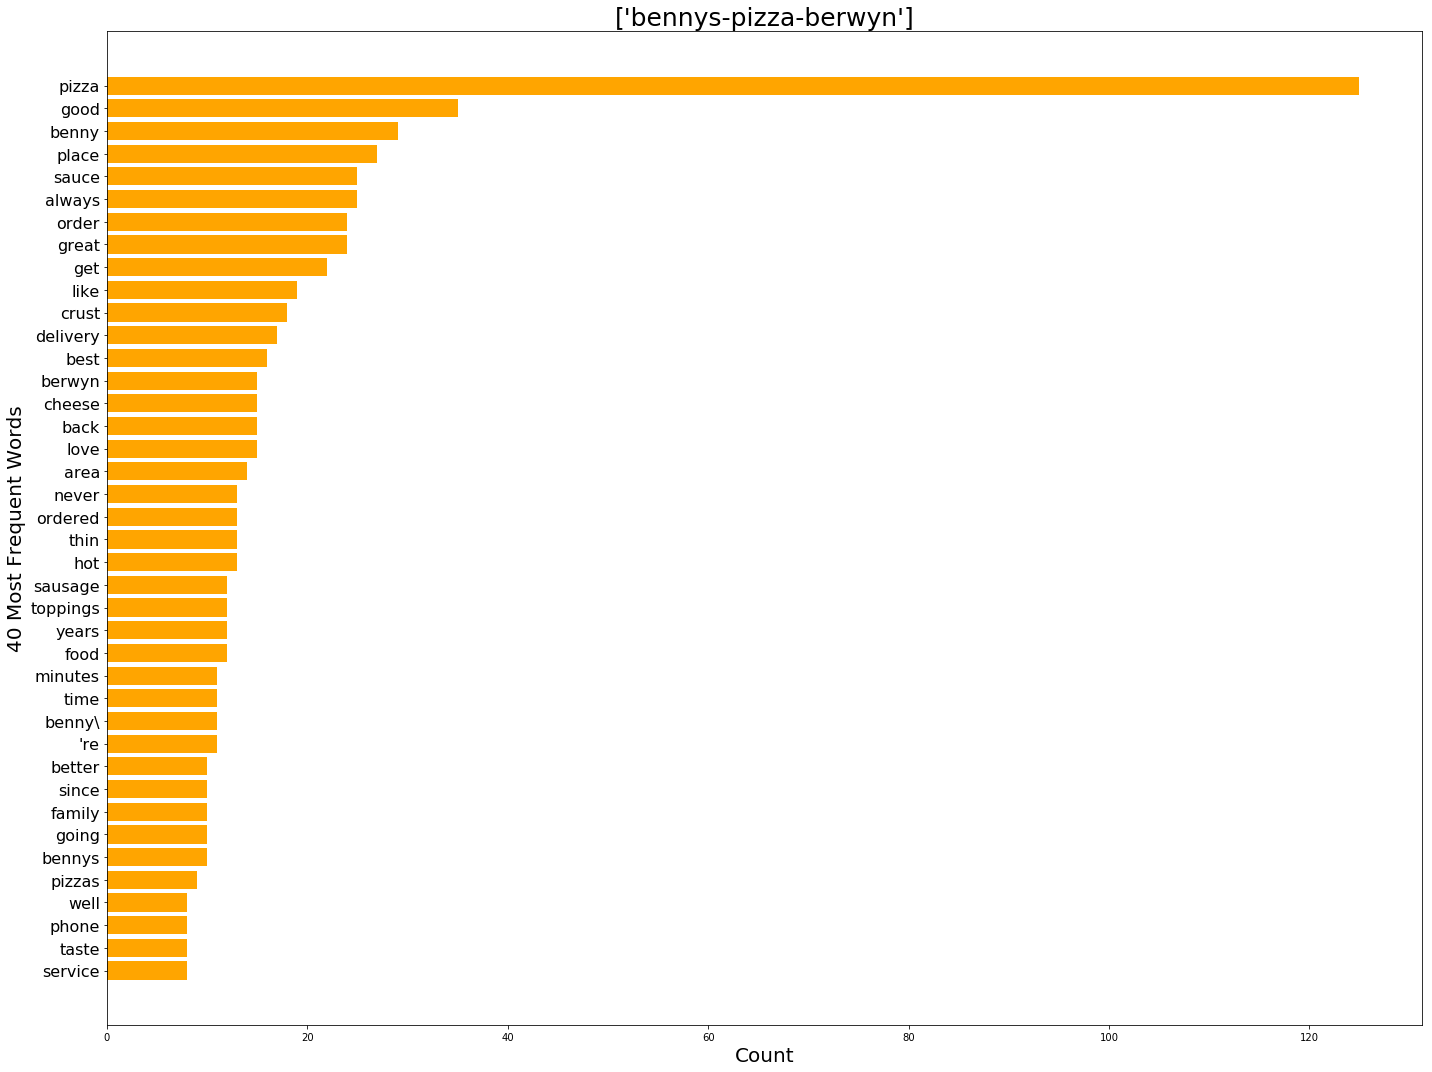

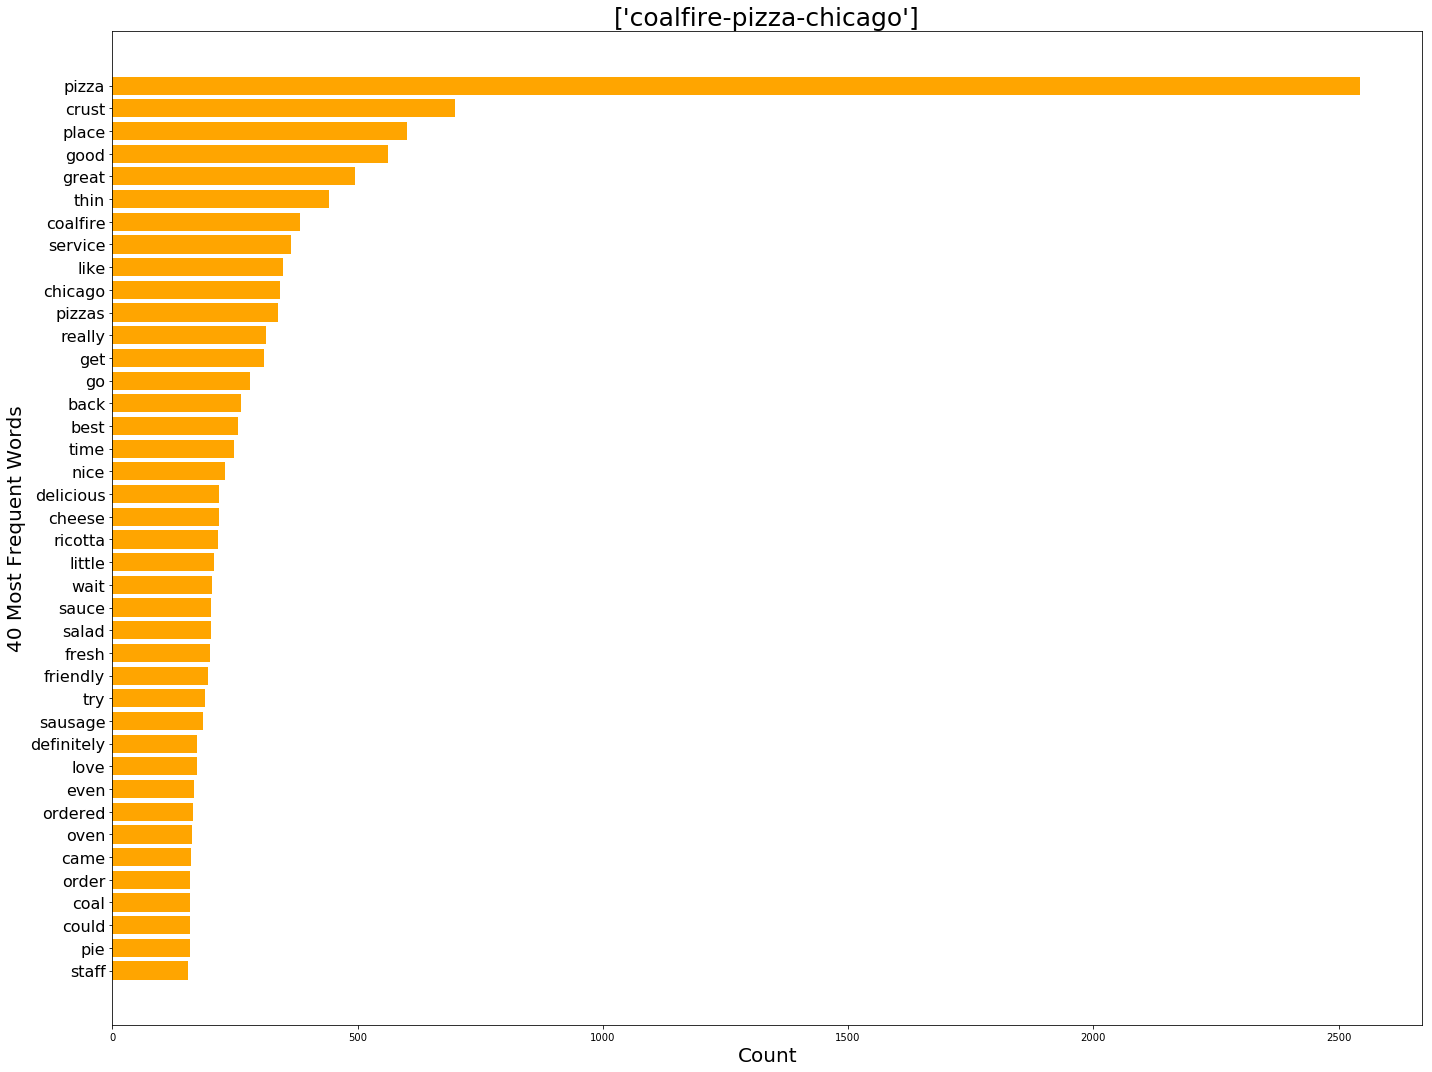

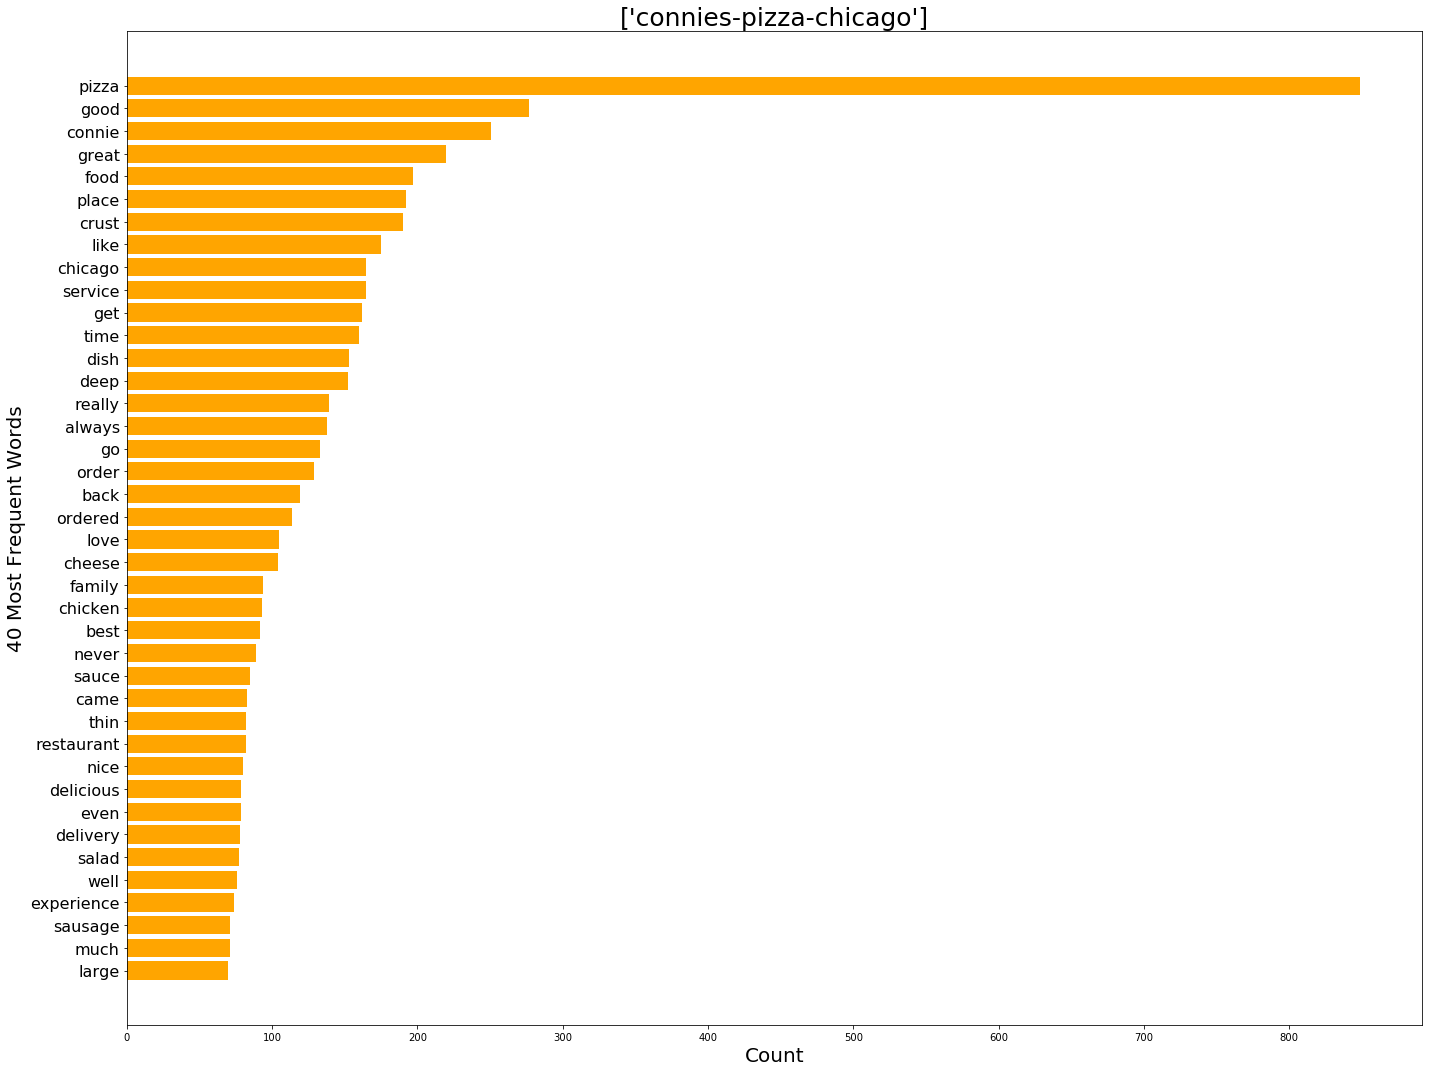

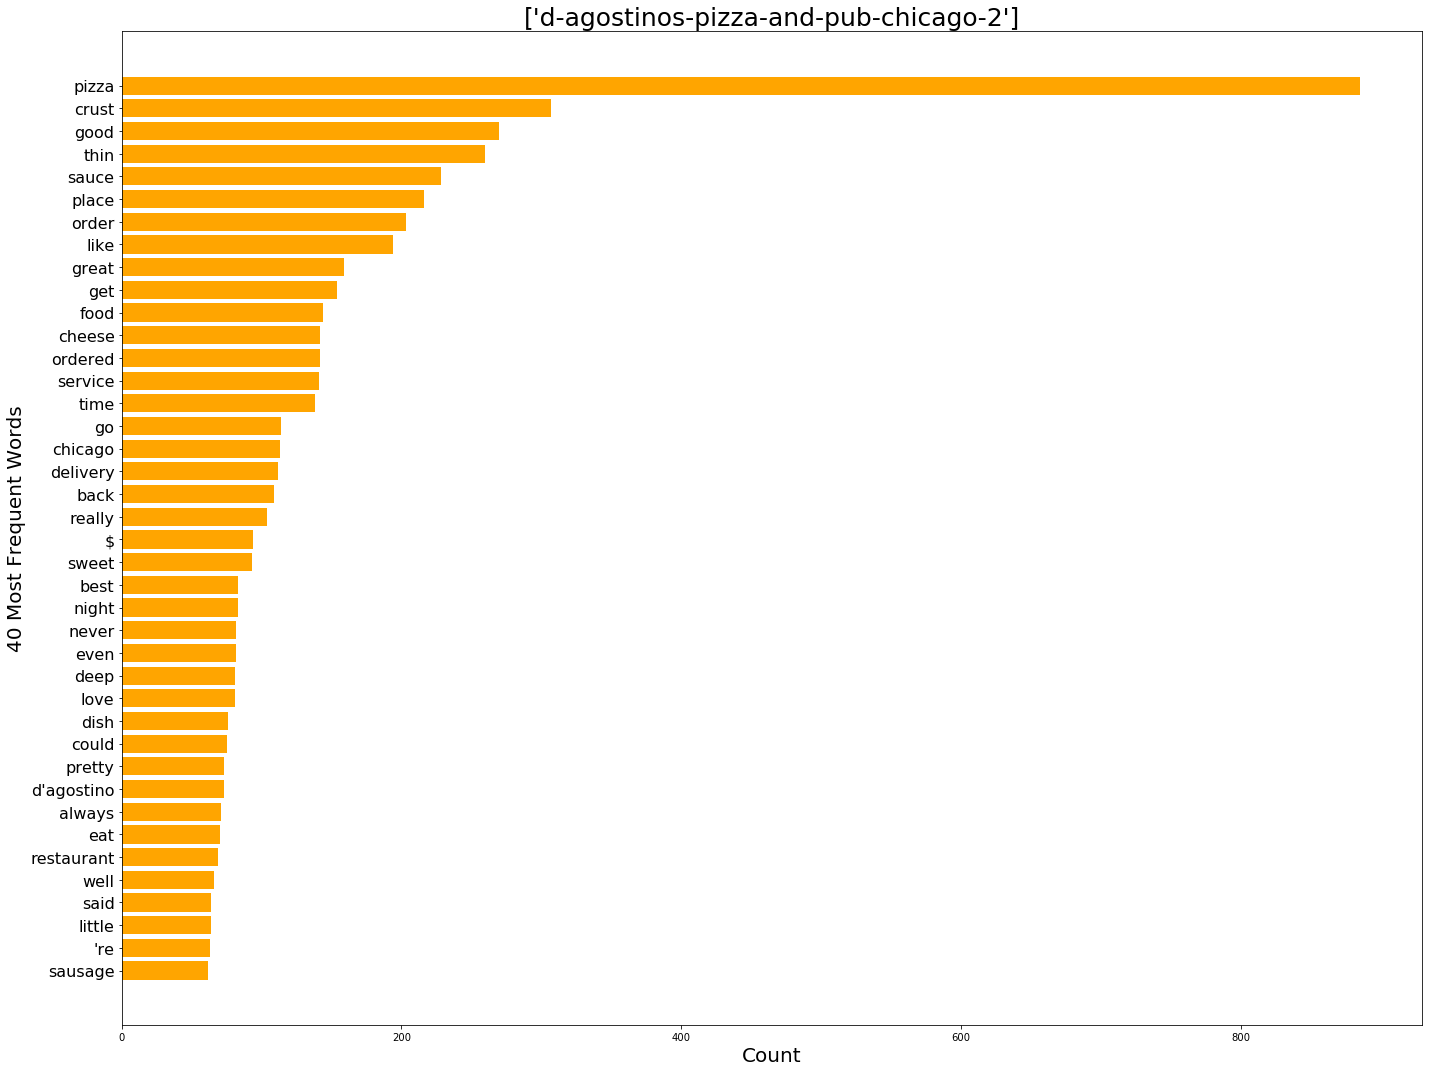

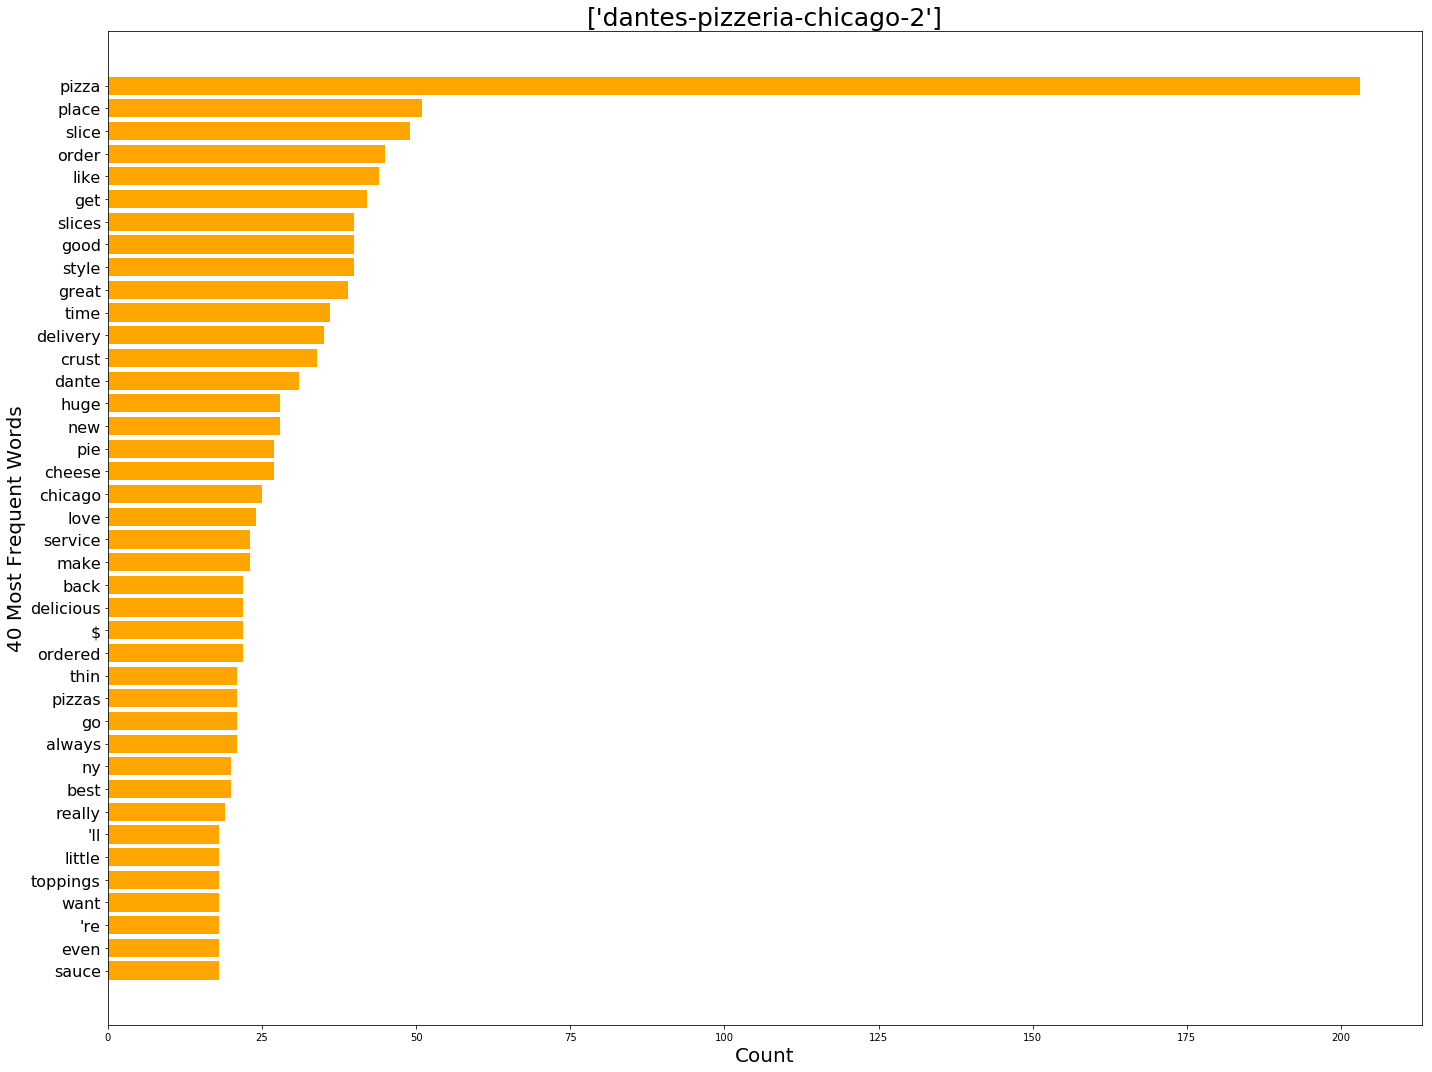

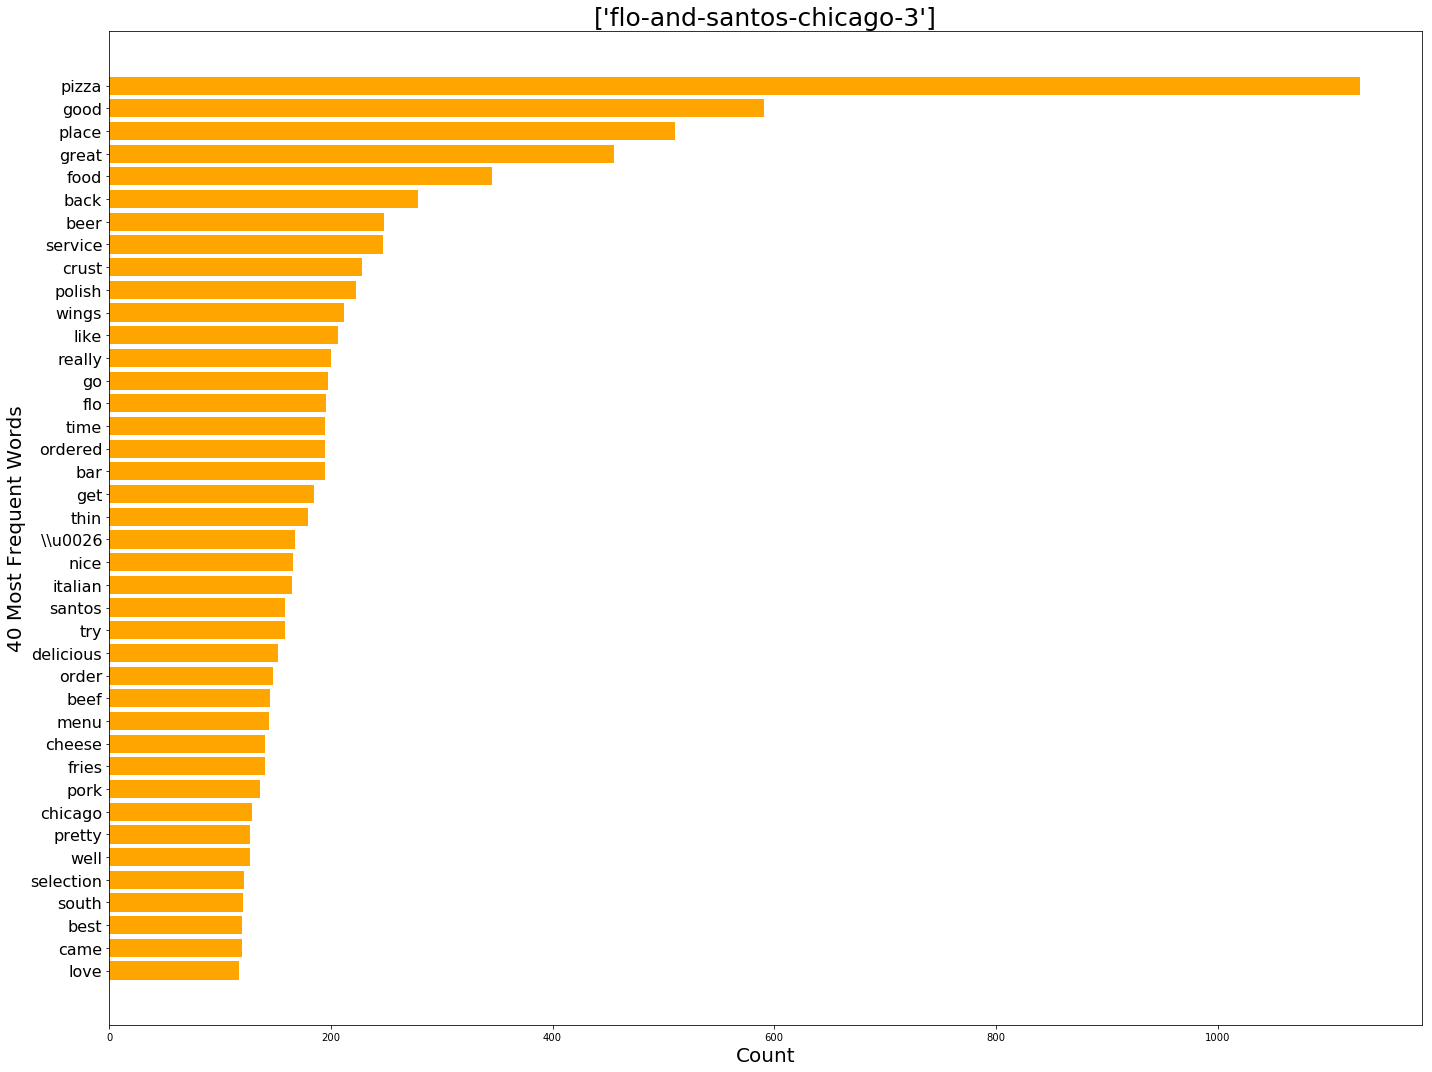

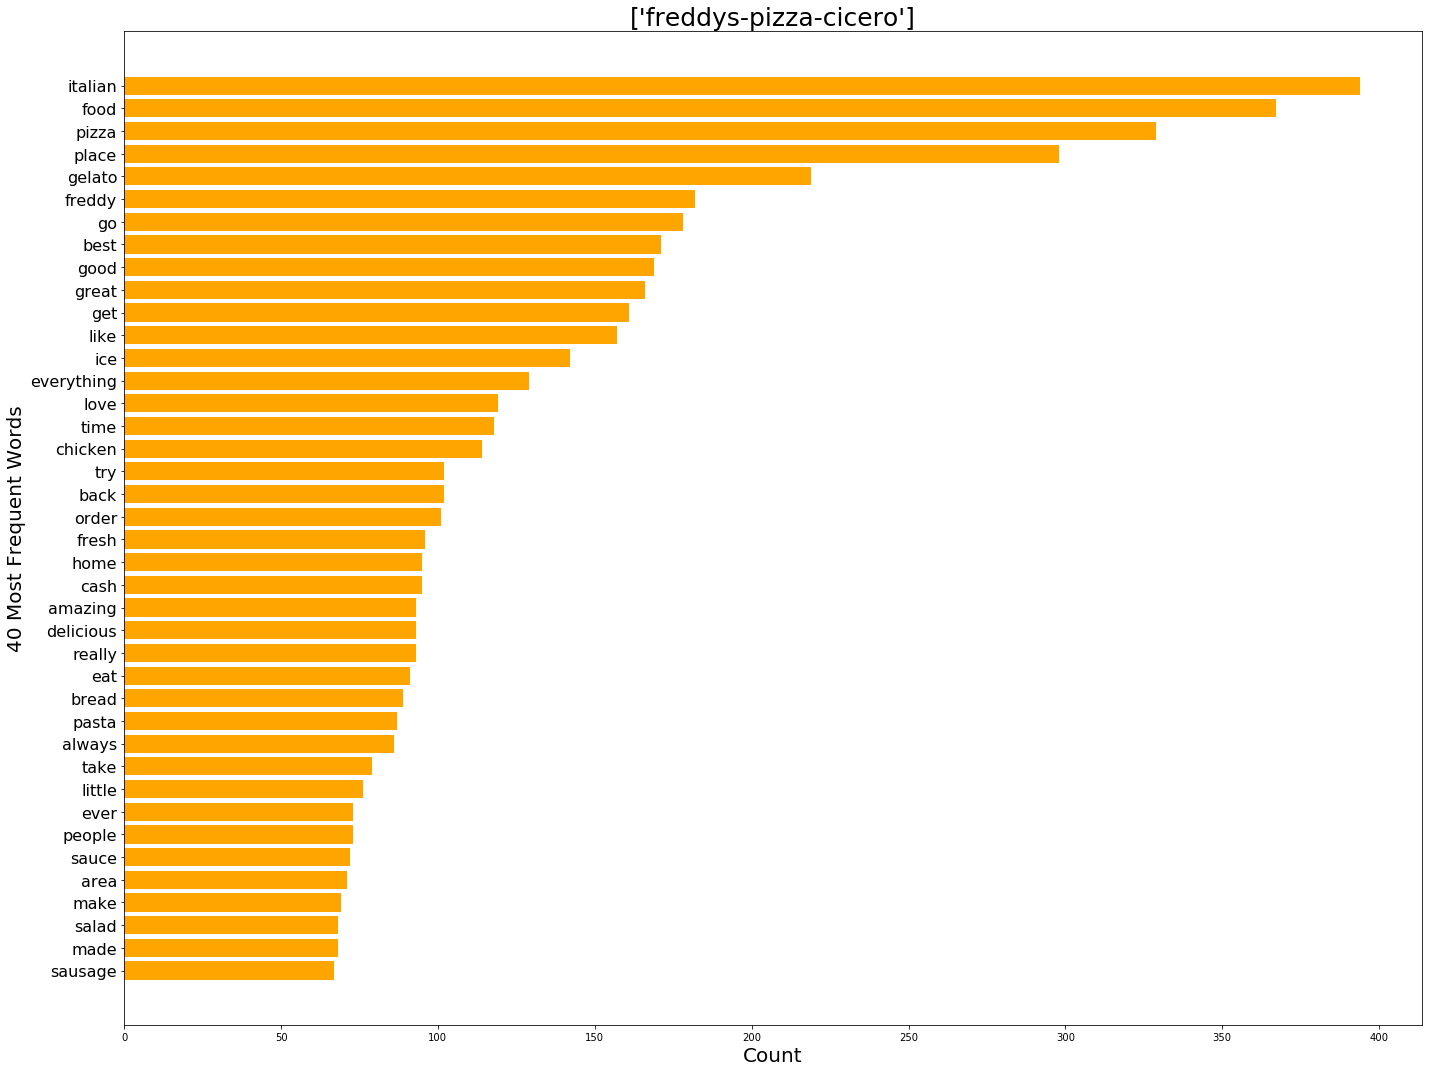

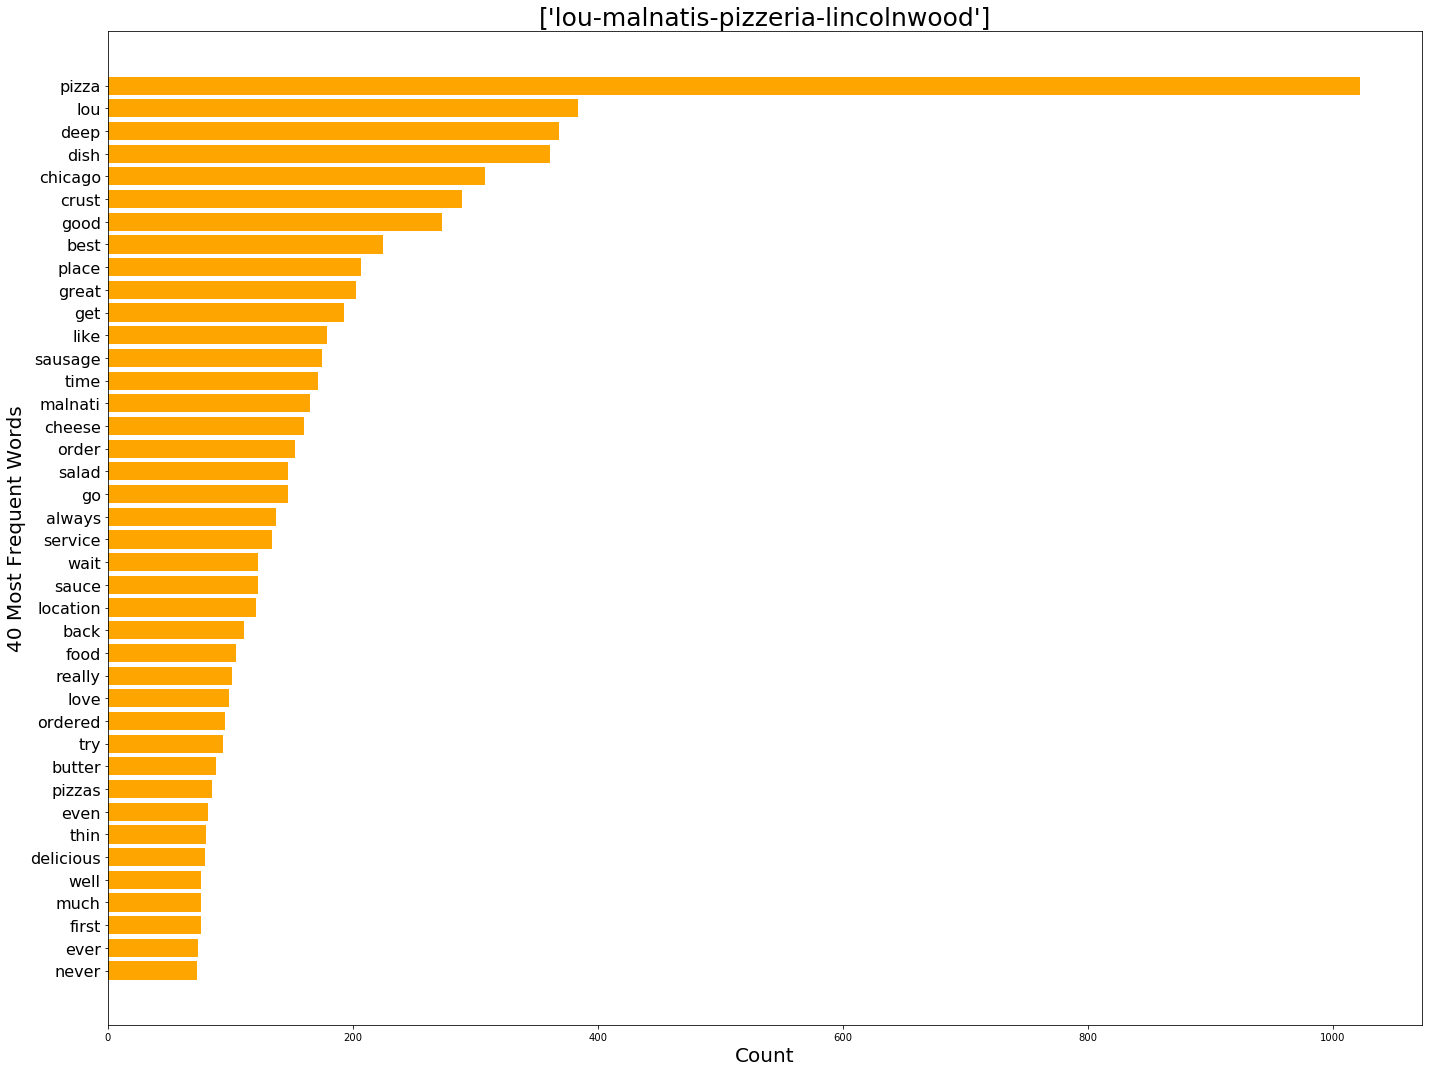

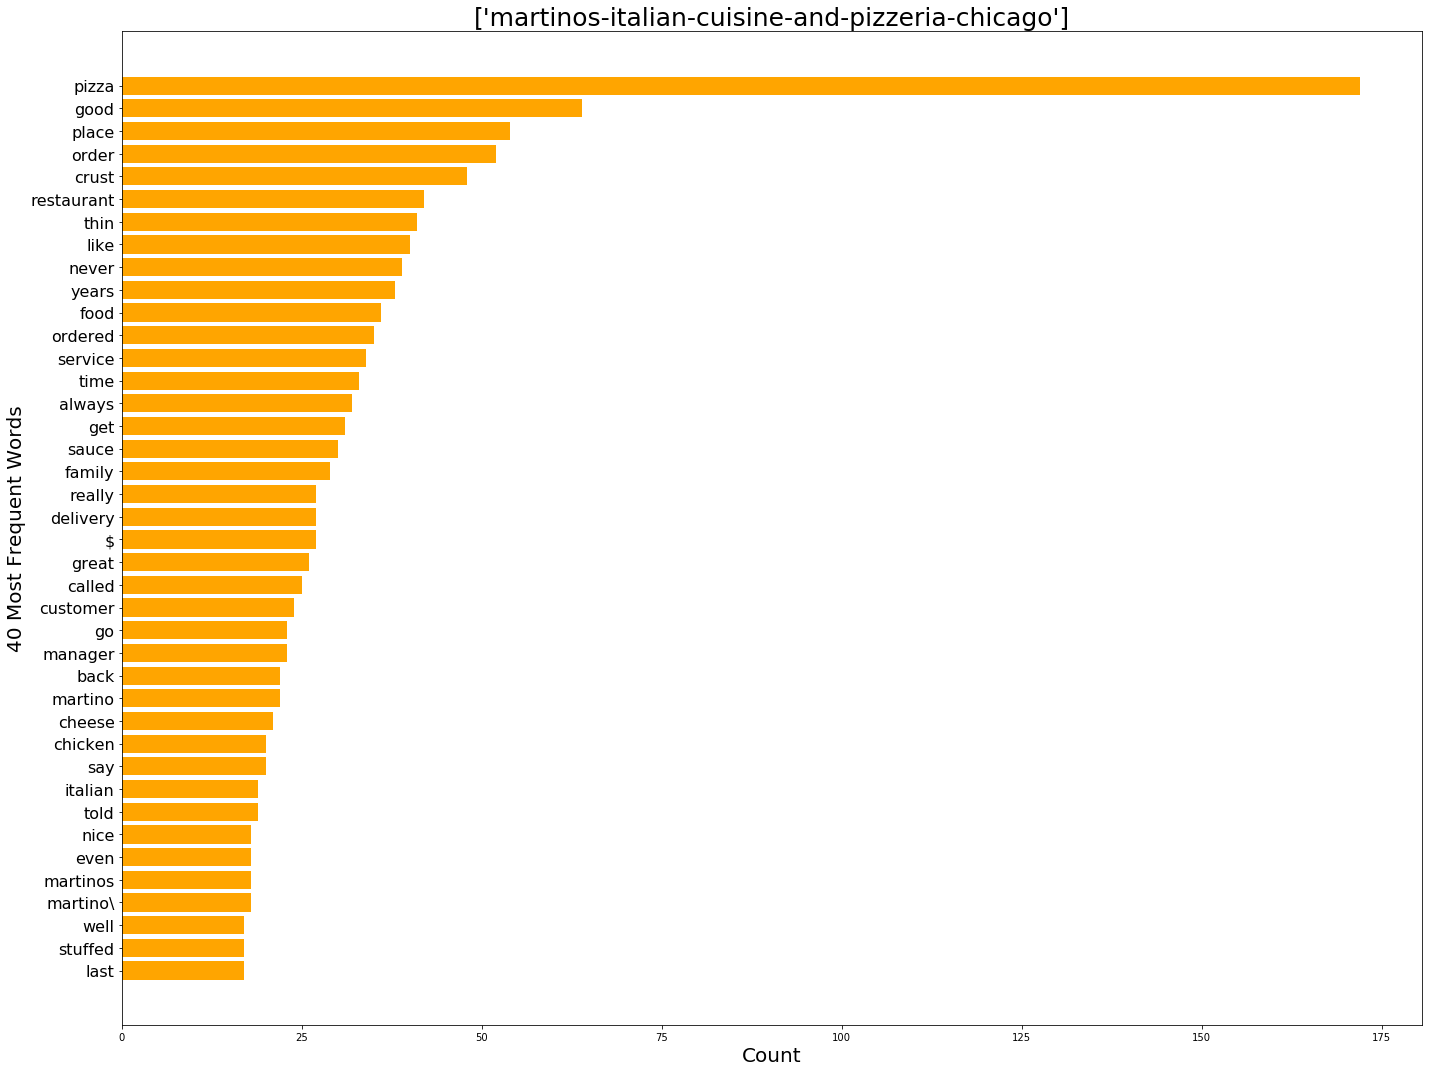

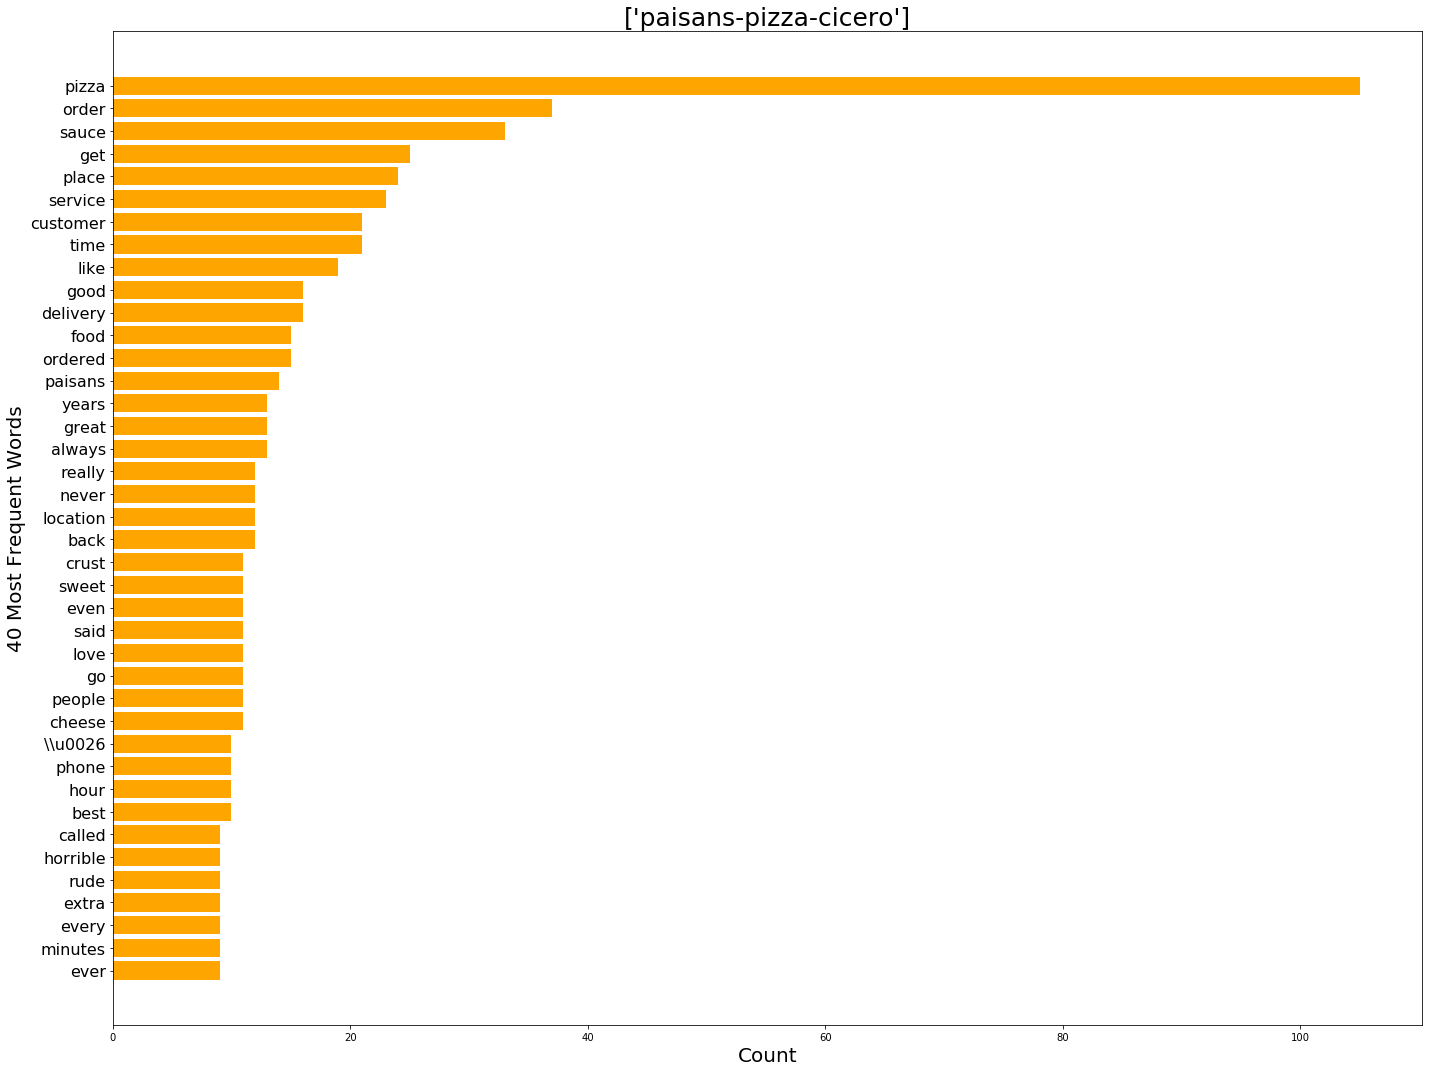

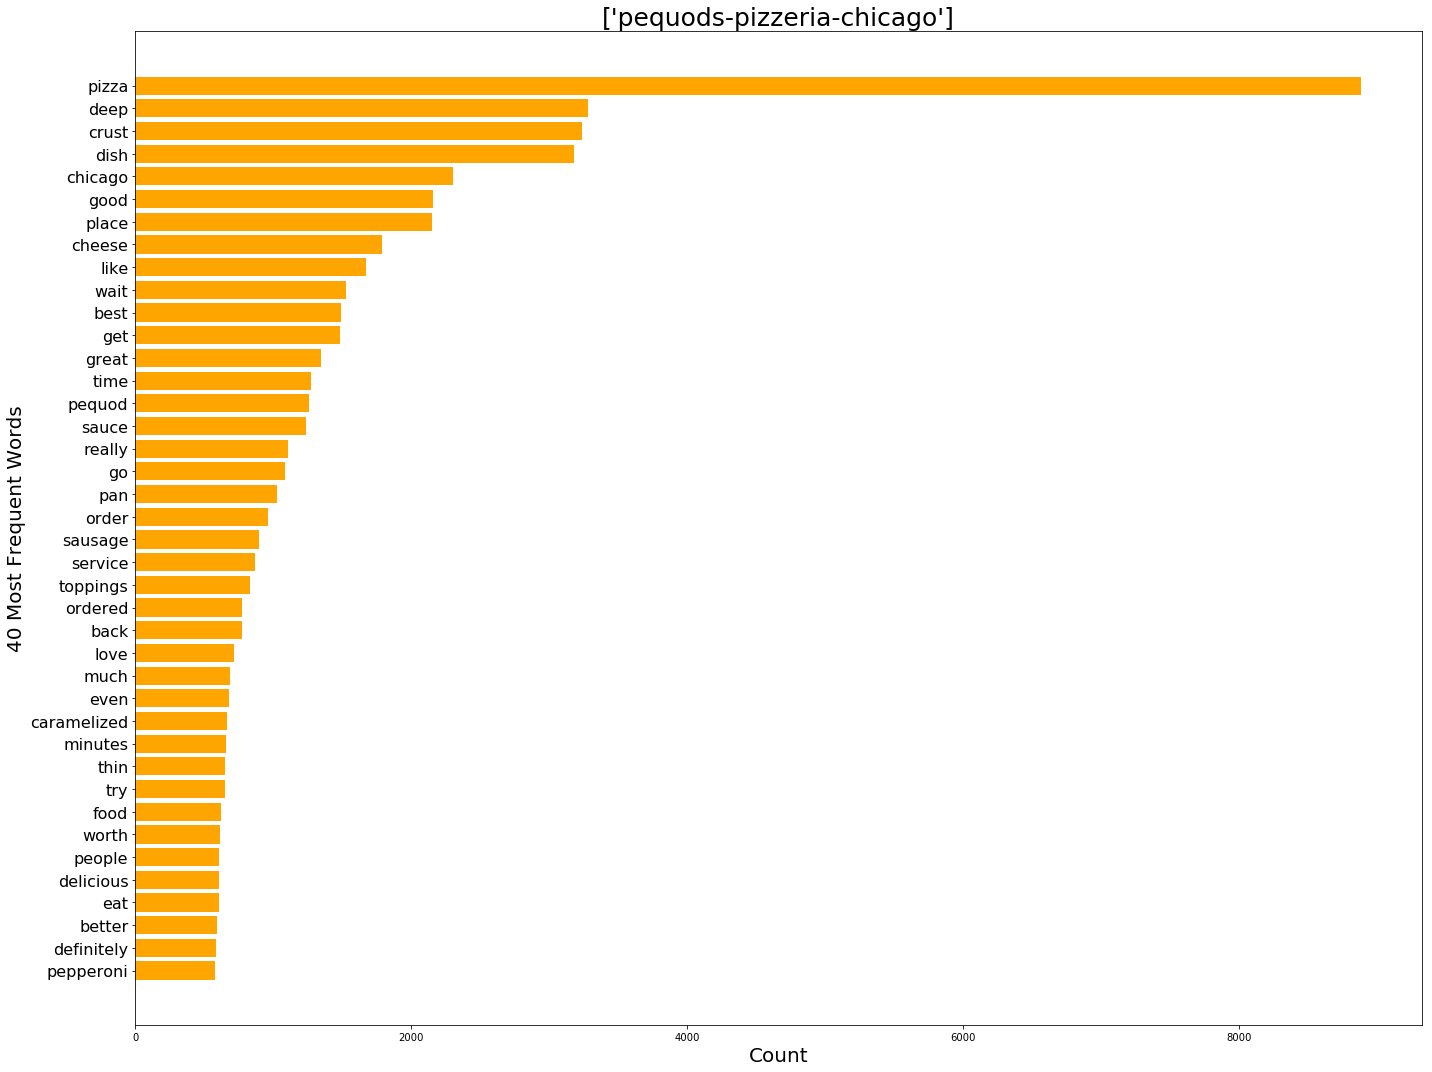

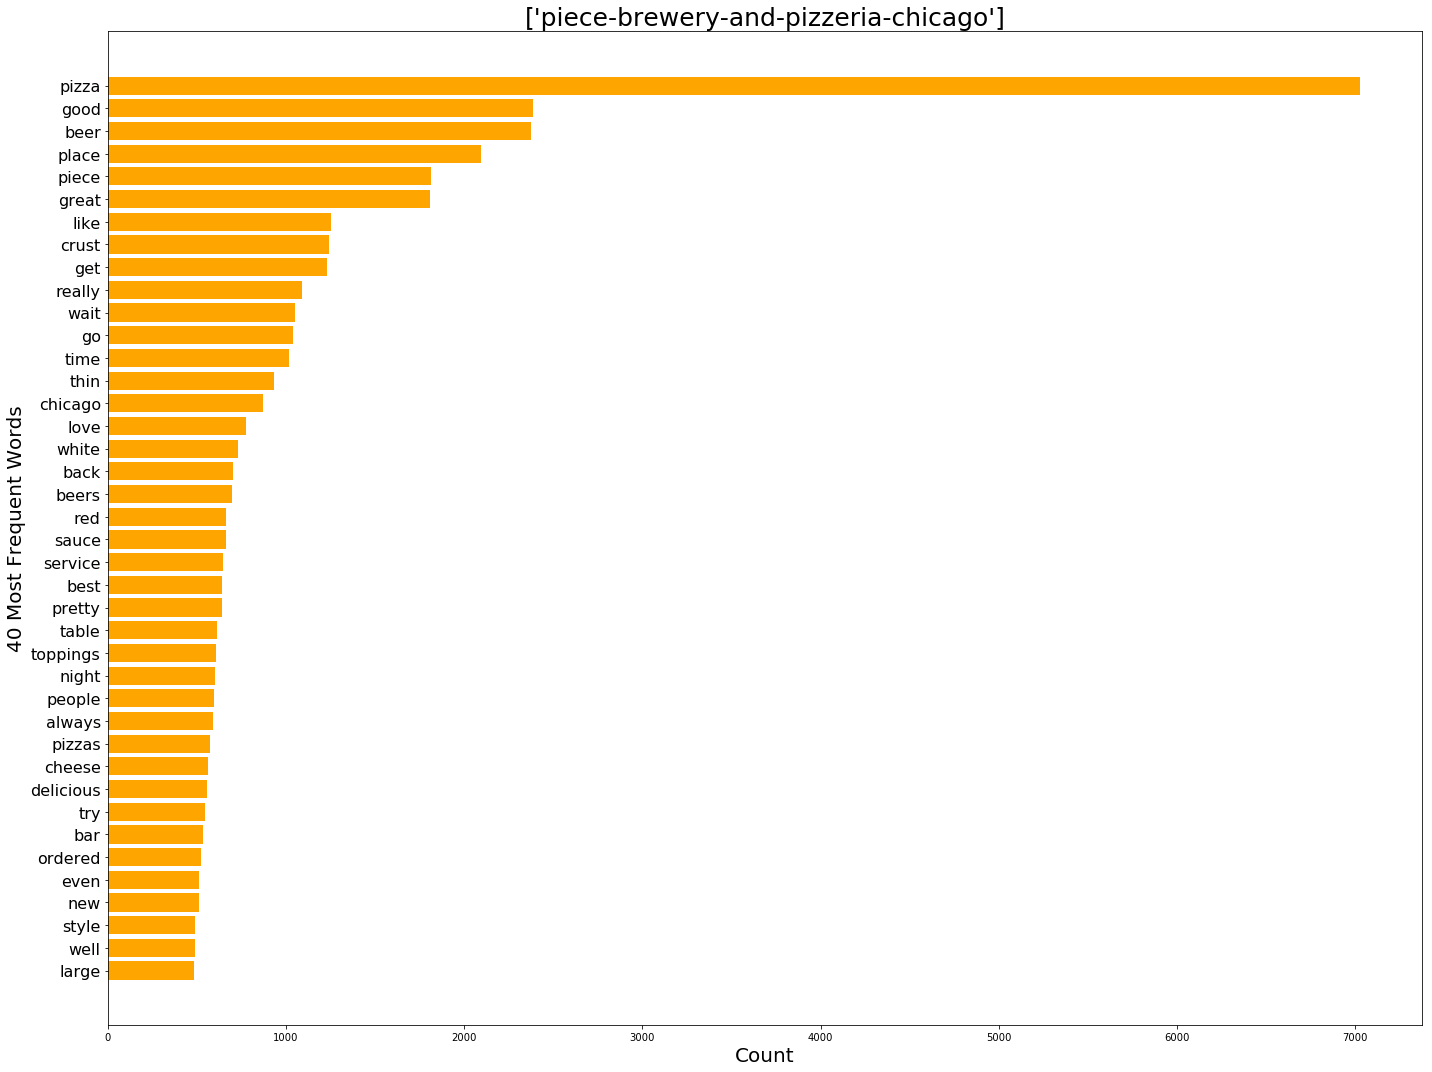

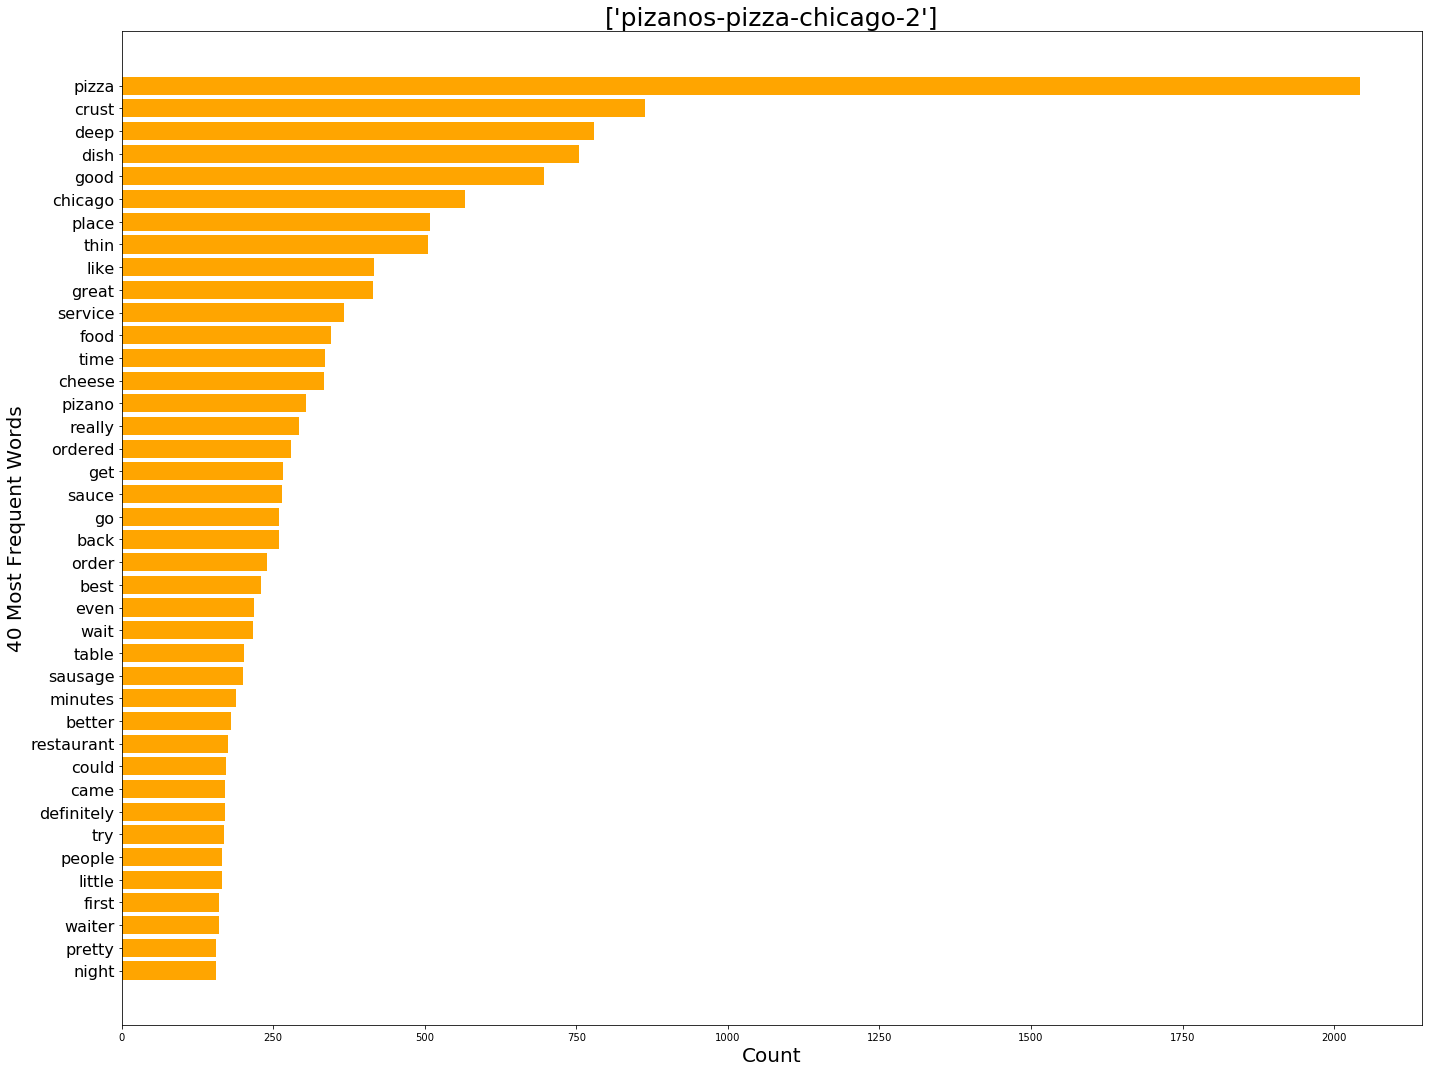

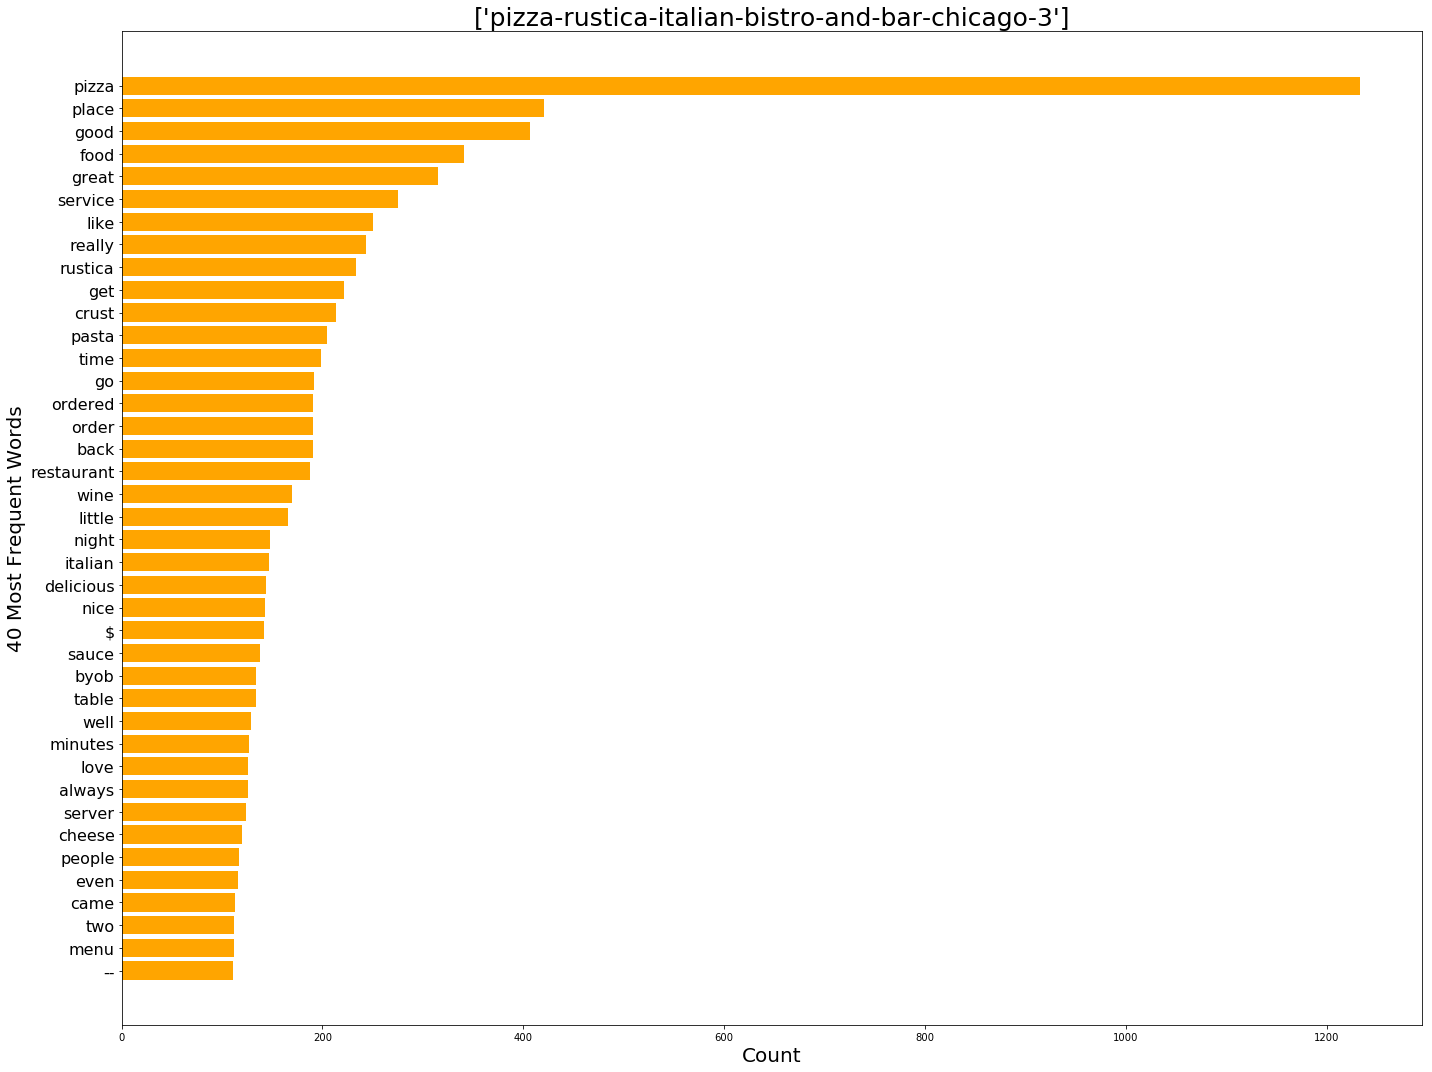

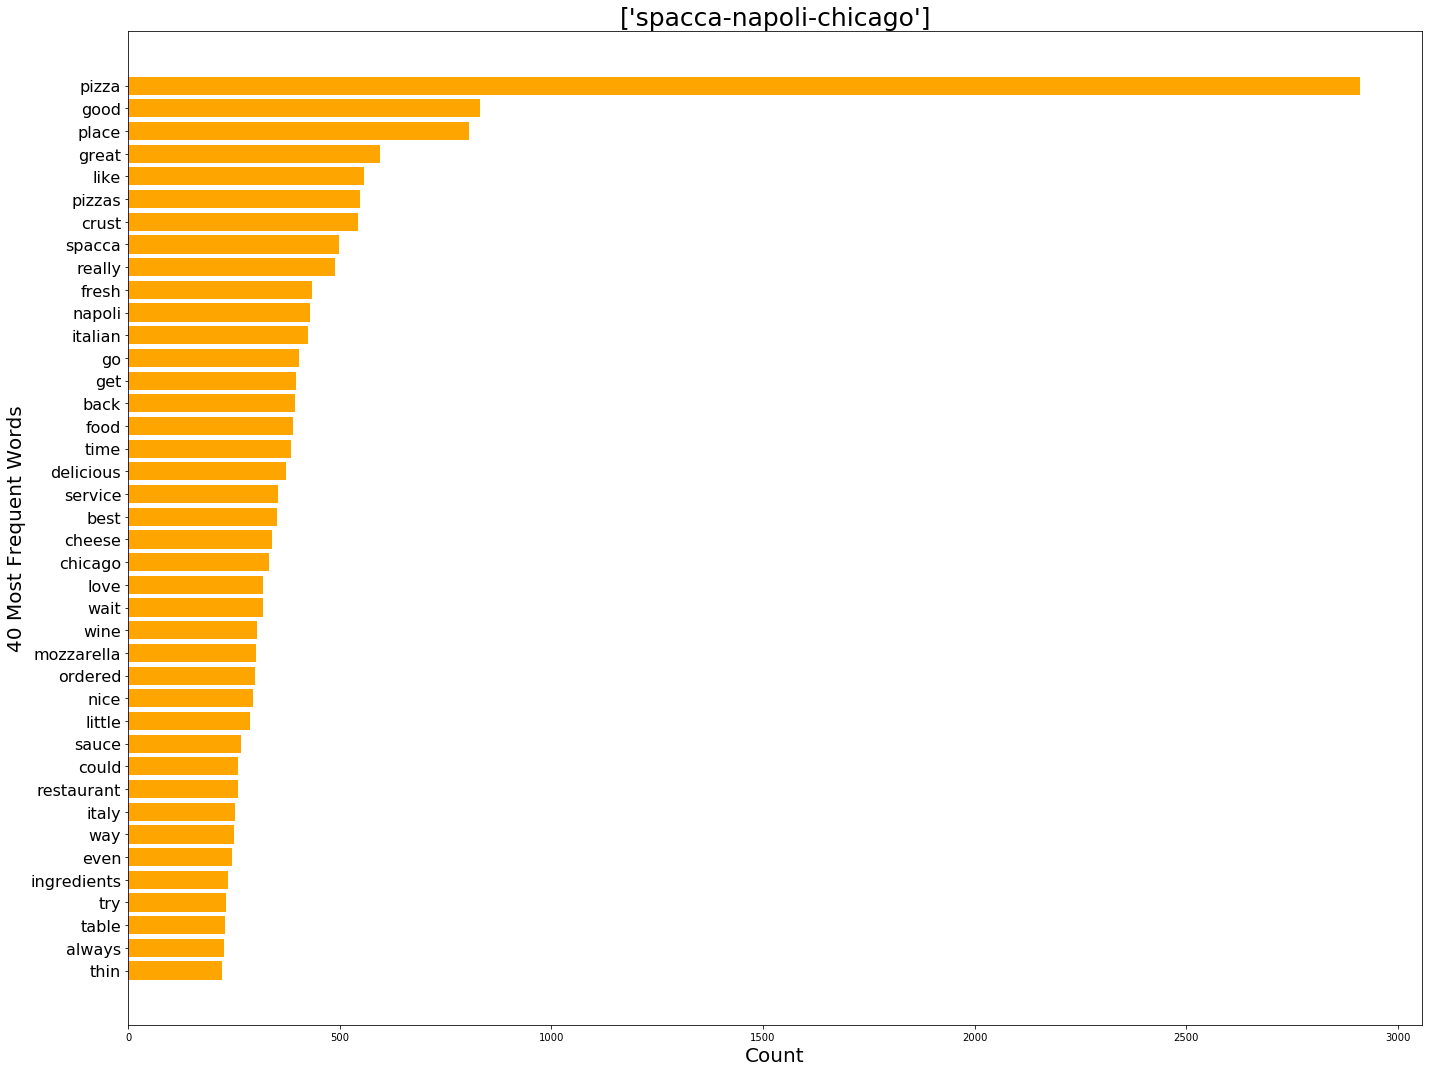

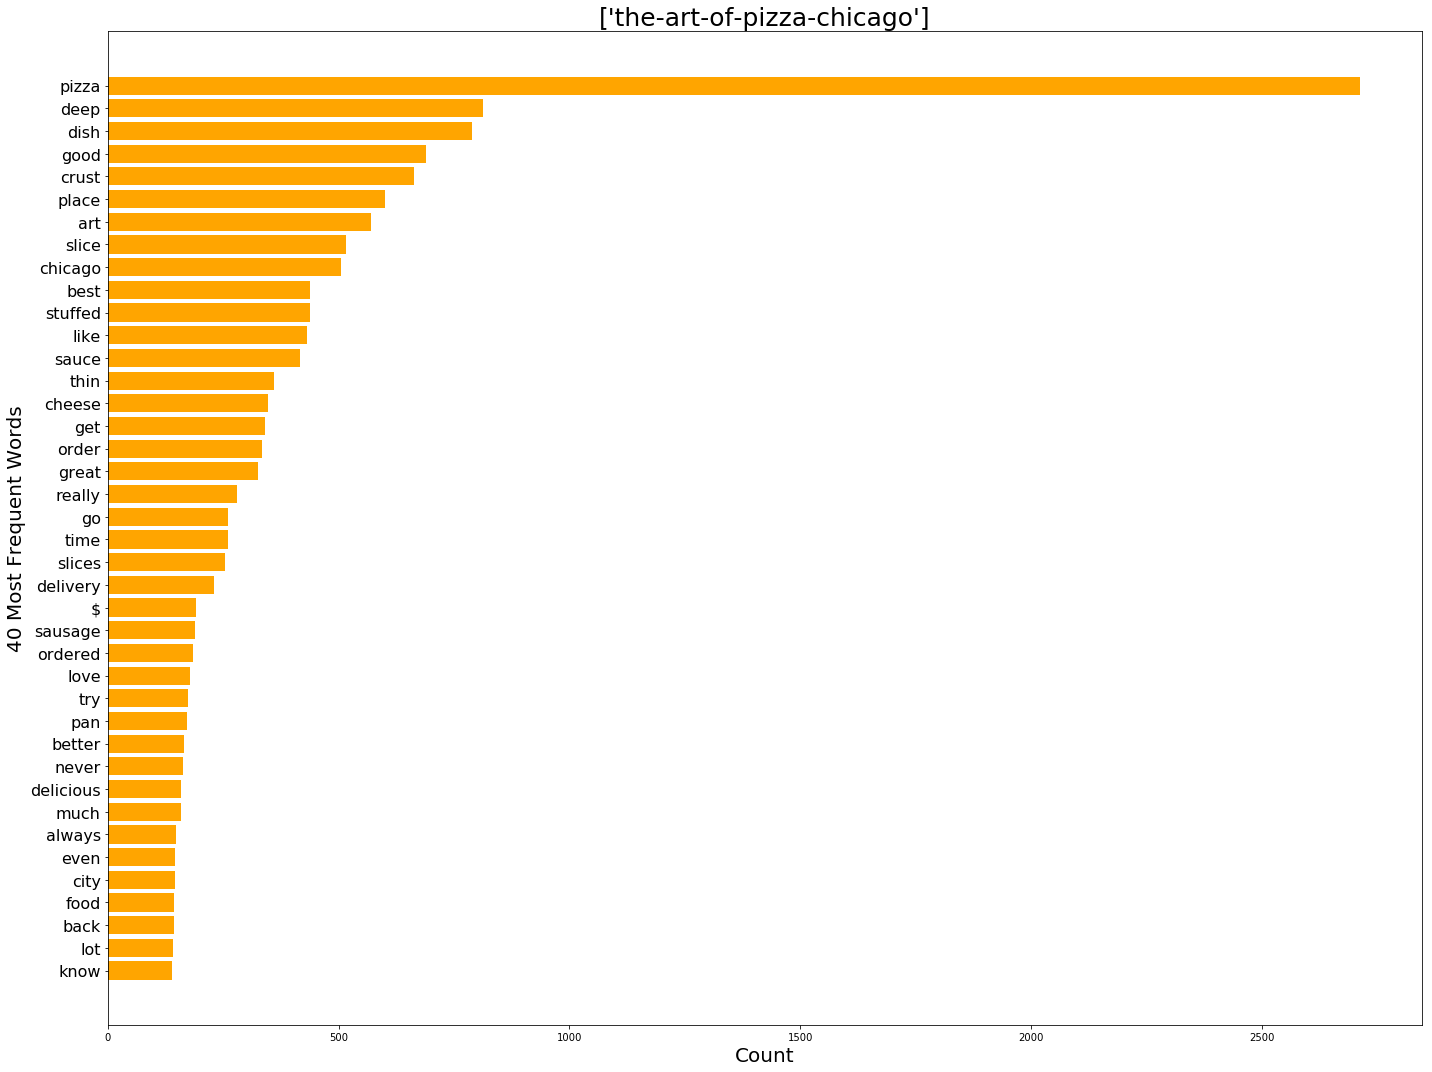

In [693]:
#Create bar plots for all top words
topWords_df = pd.DataFrame(topWordsDic)


for row in list(range(1,len(topWords_df))):
    
    tw = topWords_df[row - 1:row]
    tw = tw.values.tolist()[0][0] #doing this unlist caused a multiple nested list, so need to get out of that
    tw.sort(key=itemgetter(1)) #need to sort by frequencys to get descending order in bar graph
    
    res = topWords_df[row - 1:row].index.values


    word = []
    frequency = []
    #samp = topWords_df[:1]

    for i in range(len(tw)):
        word.append(tw[i][0])
        frequency.append(tw[i][1])


    indices = np.arange(len(tw))
    ax = plt.subplots(figsize=(20,15))
    plt.title(res, fontsize=25)
    plt.xlabel('Count',fontsize = 20)
    plt.ylabel('40 Most Frequent Words',fontsize = 20)
    plt.barh(indices, frequency, color='orange')
    plt.yticks(indices, word, rotation='horizontal',size=16)

    plt.tight_layout()
    plt.show()

# Ngrams 


We use Ngrams when want to look at words as they are related to each other. We can look at how common it is for n words to occur together. Let's start with a bigram -- which is just two words.

In [ ]:
#function returns filtered list of words for each restaurant
def filteredtxt_fun(reviews):
    #global(stop_words)
    #global(throwaways)
    
    bigstring = str(reviews.tolist()).lower().strip(r"\\n\\")
    tokens = word_tokenize(bigstring)
    
    filtered_desc = []

    for word in tokens:
        if word not in stop_words and word not in throwaways:
            filterd_desc = filtered_desc.append(word)
    
    return(filtered_desc)
    
    
    
    
filt_txt = descWide.apply(filteredtxt_fun, axis=0)

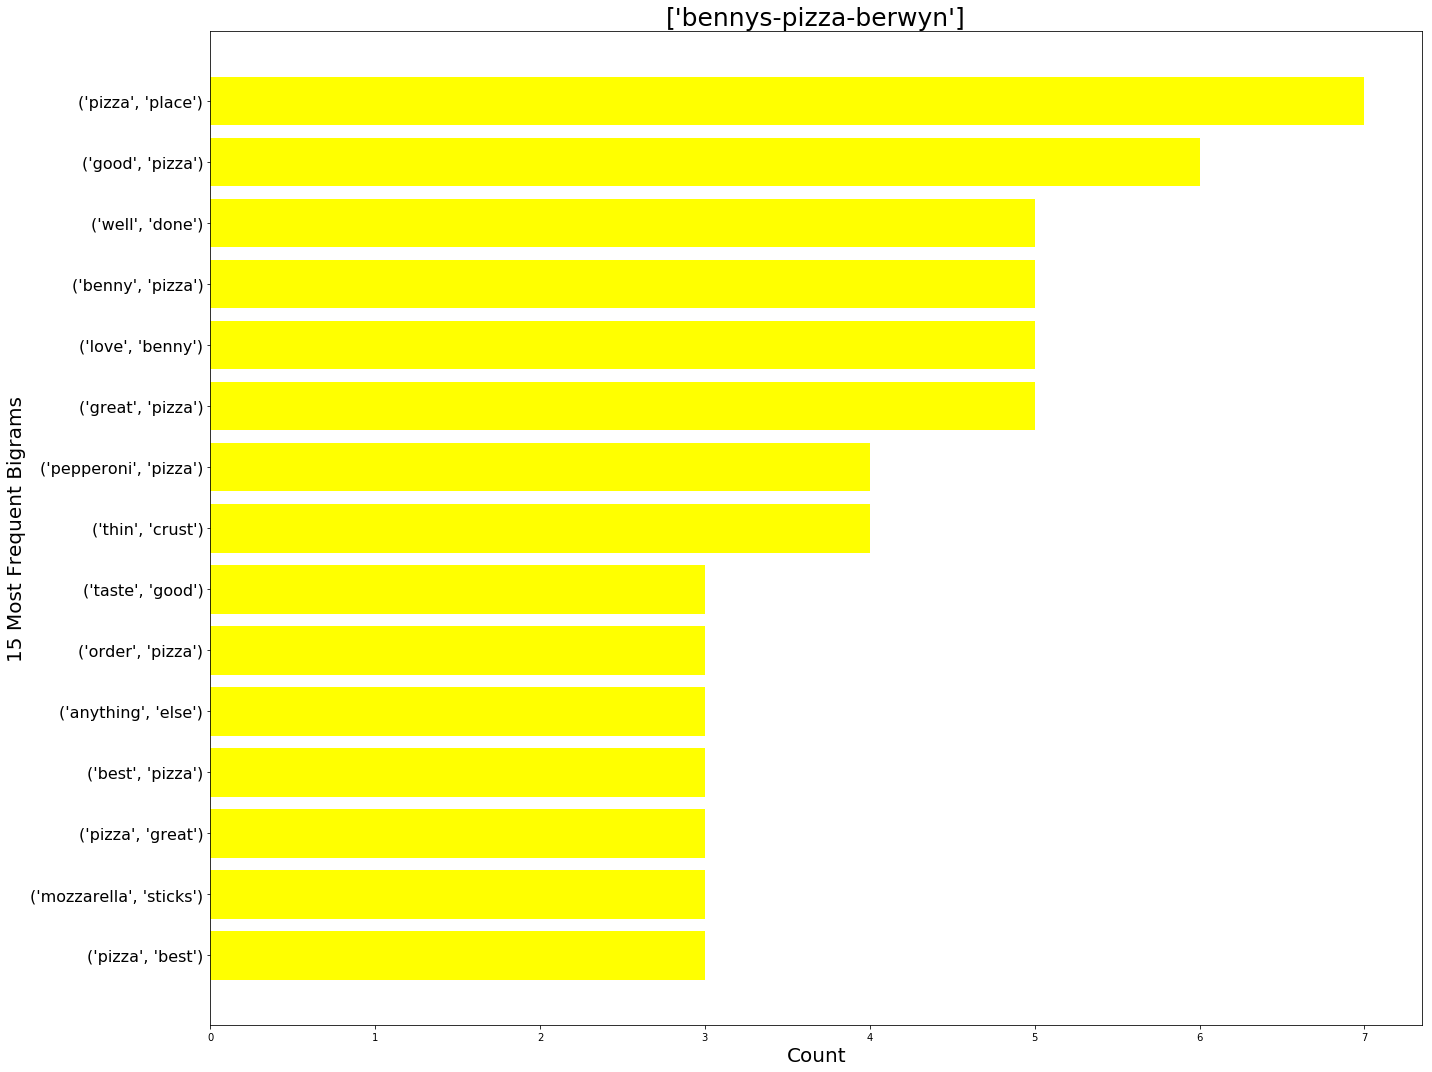

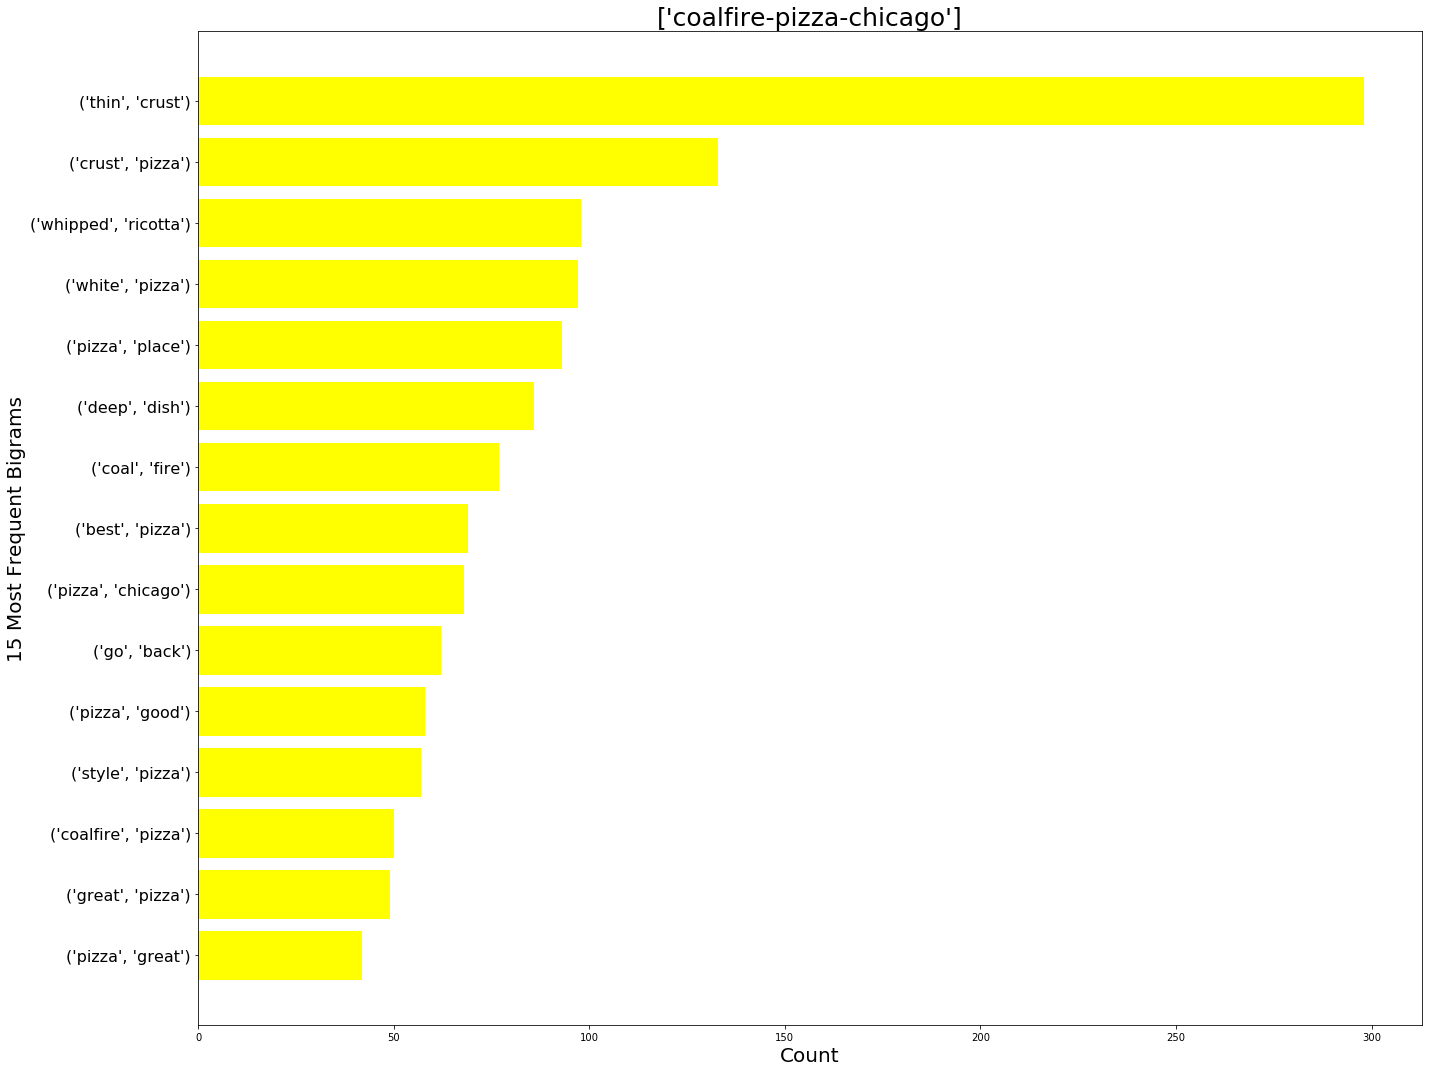

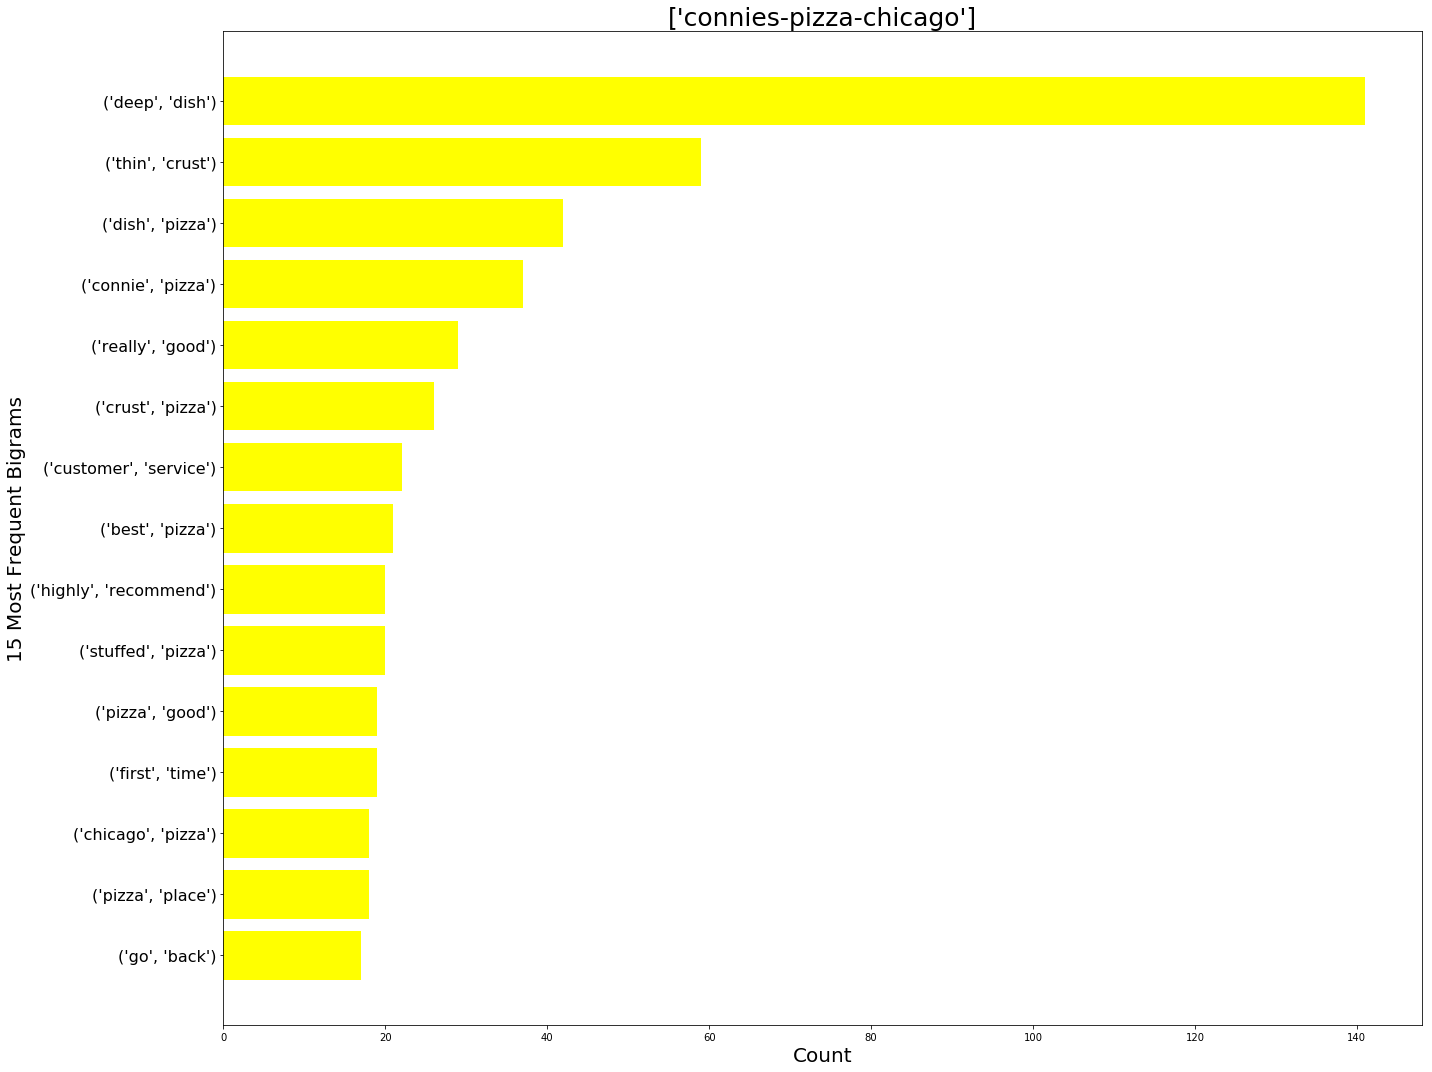

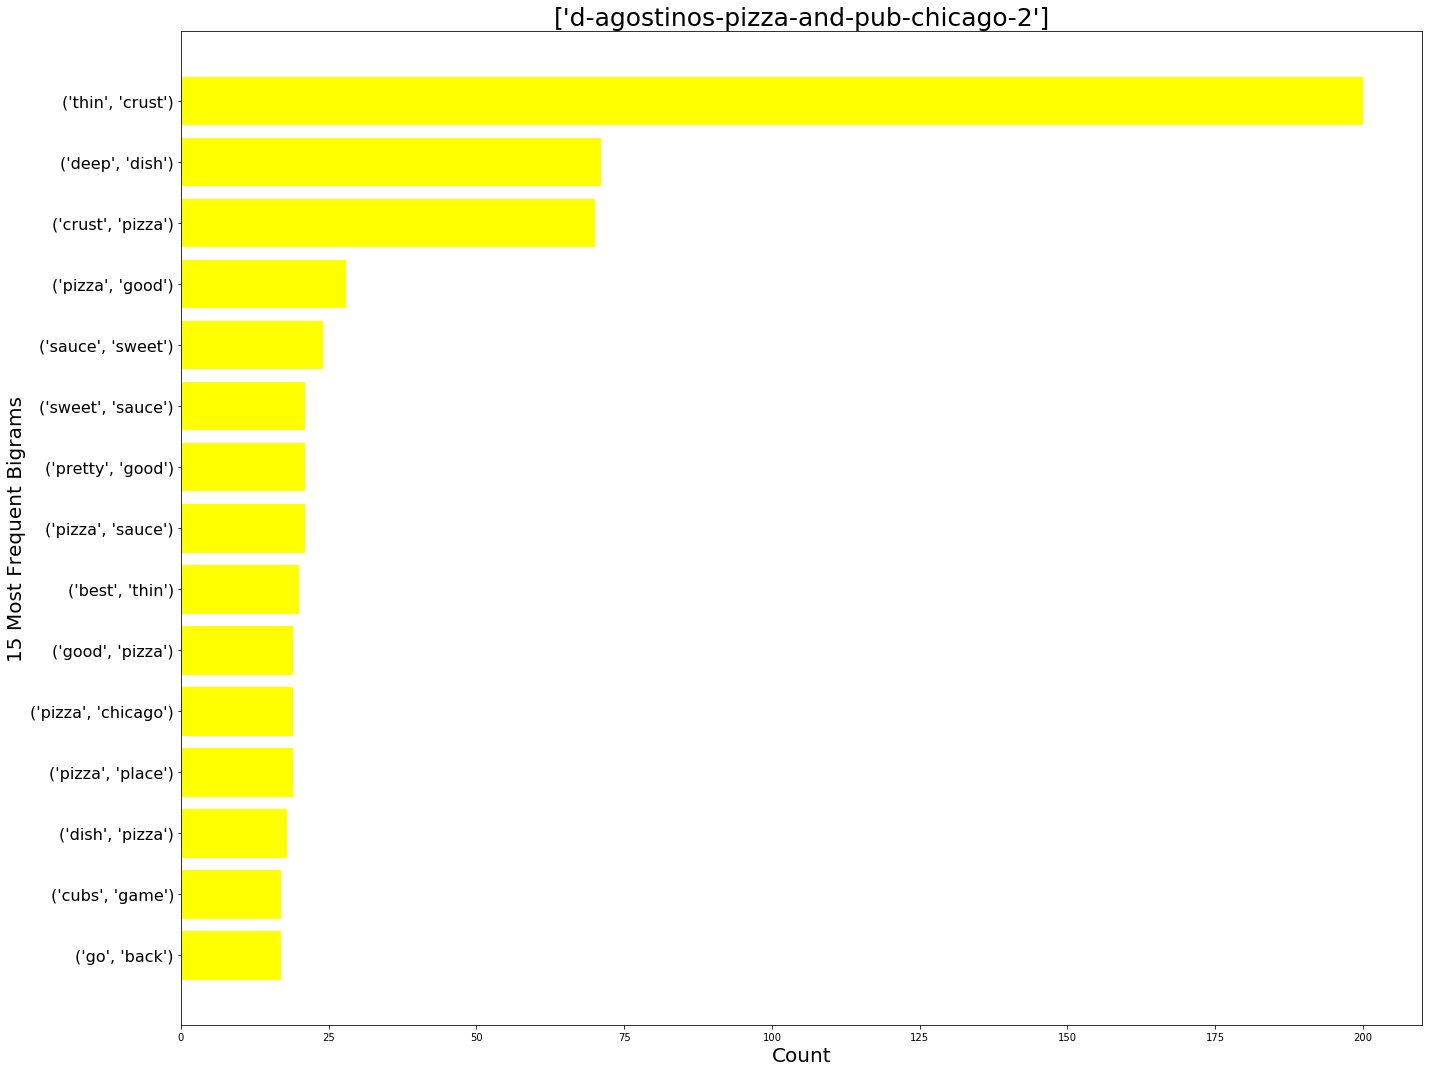

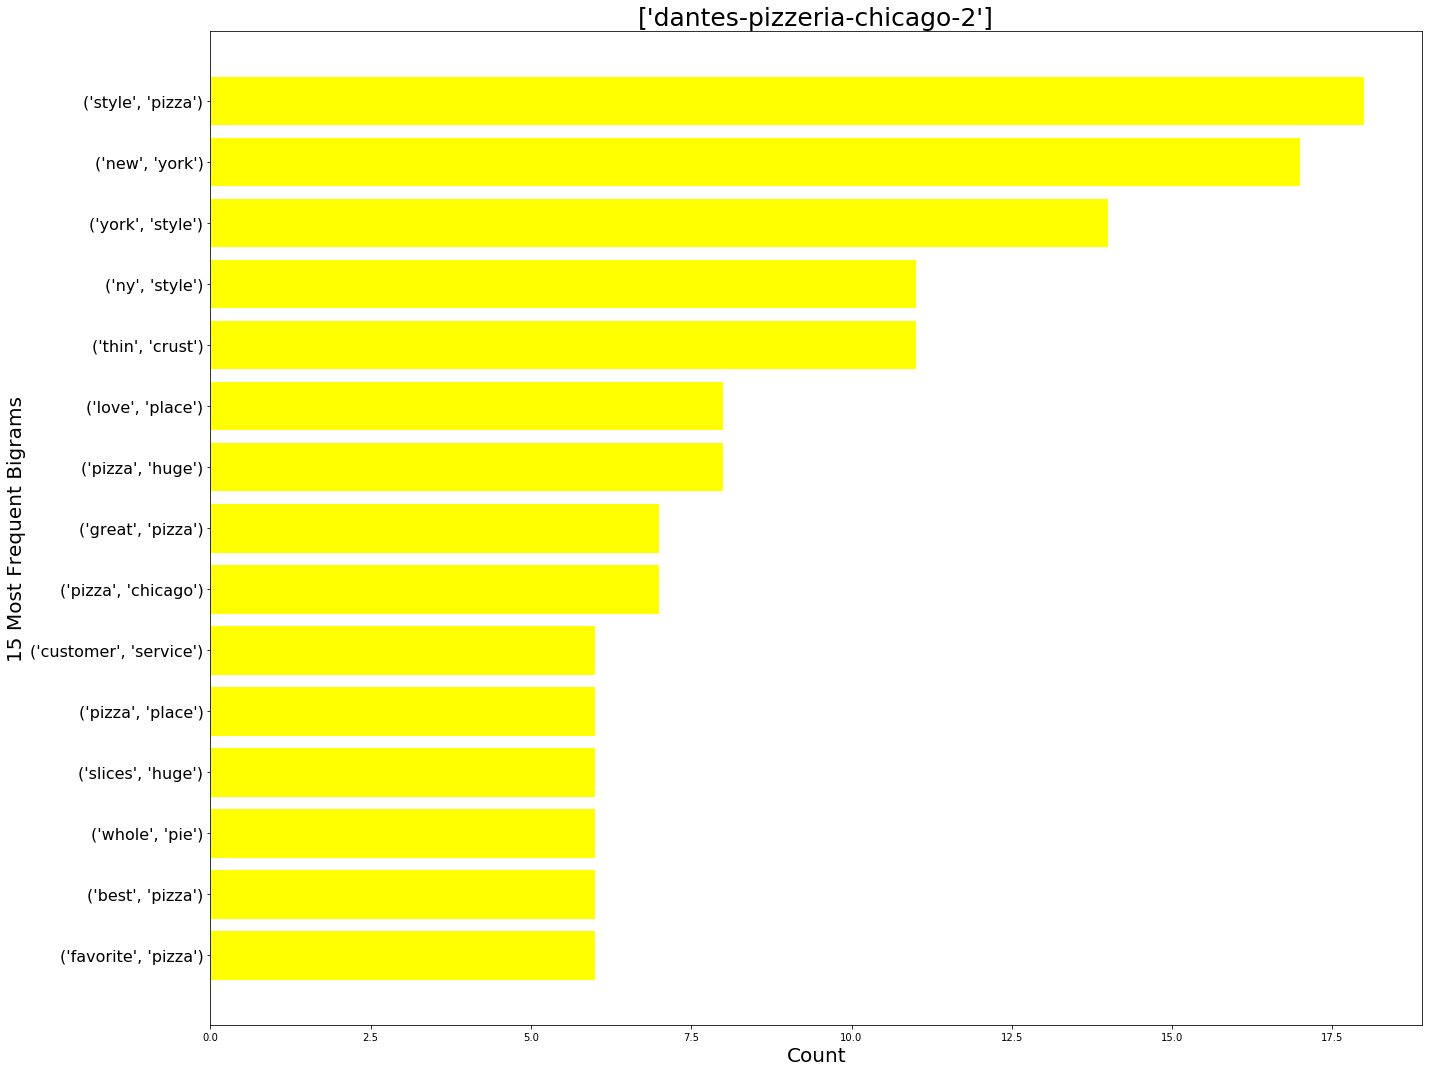

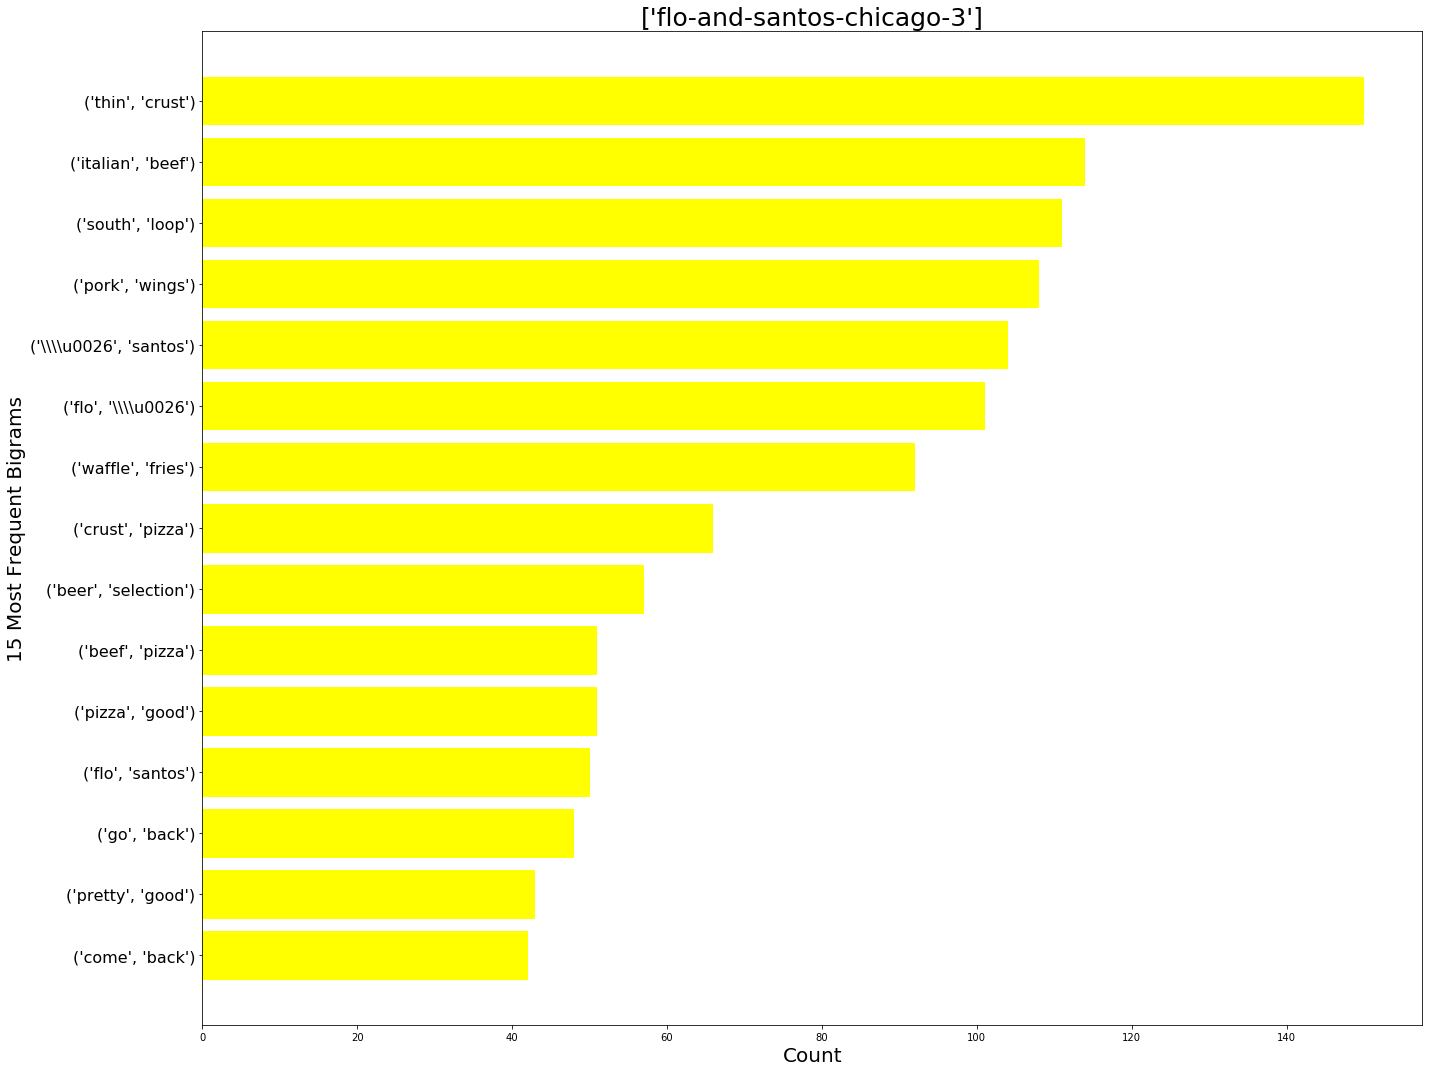

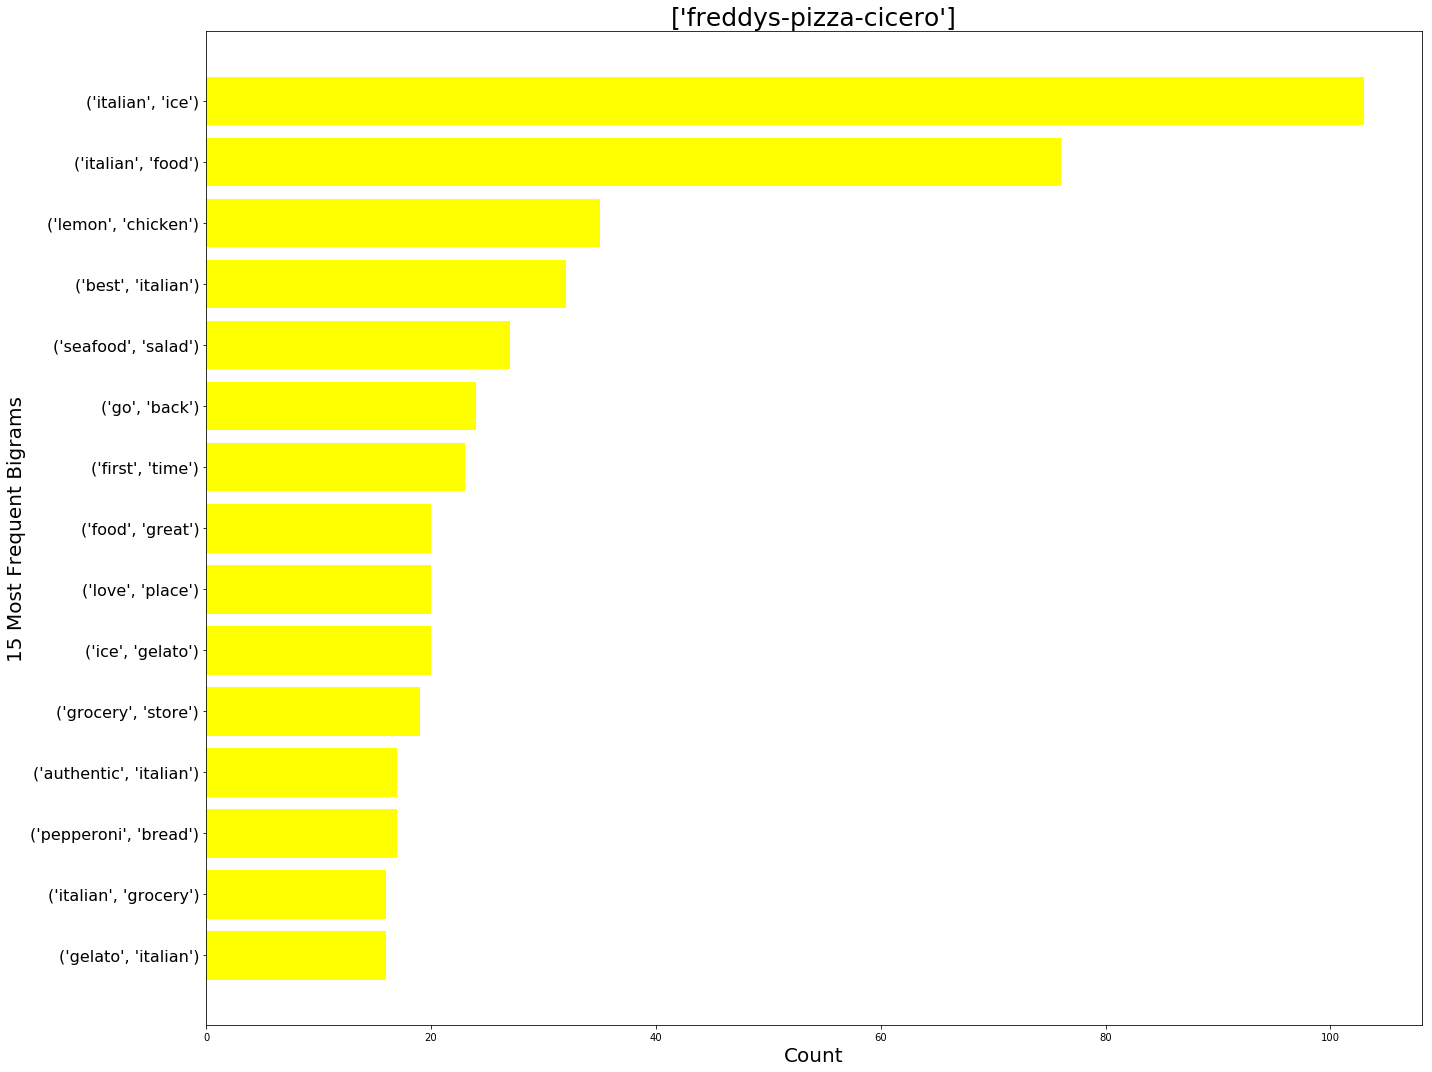

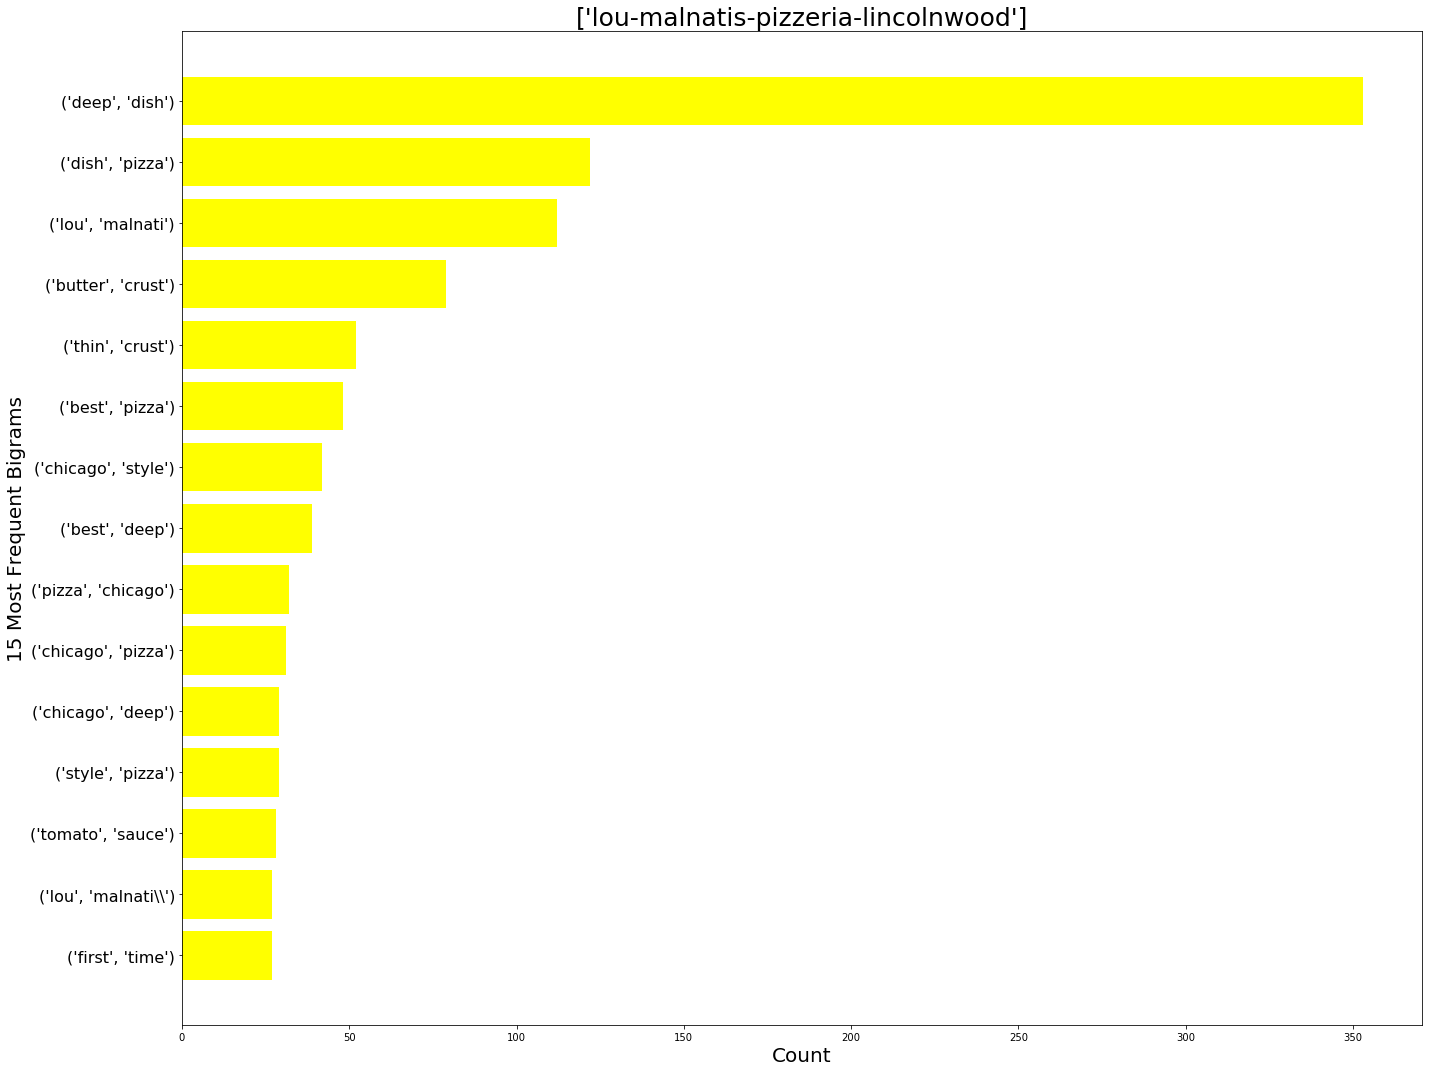

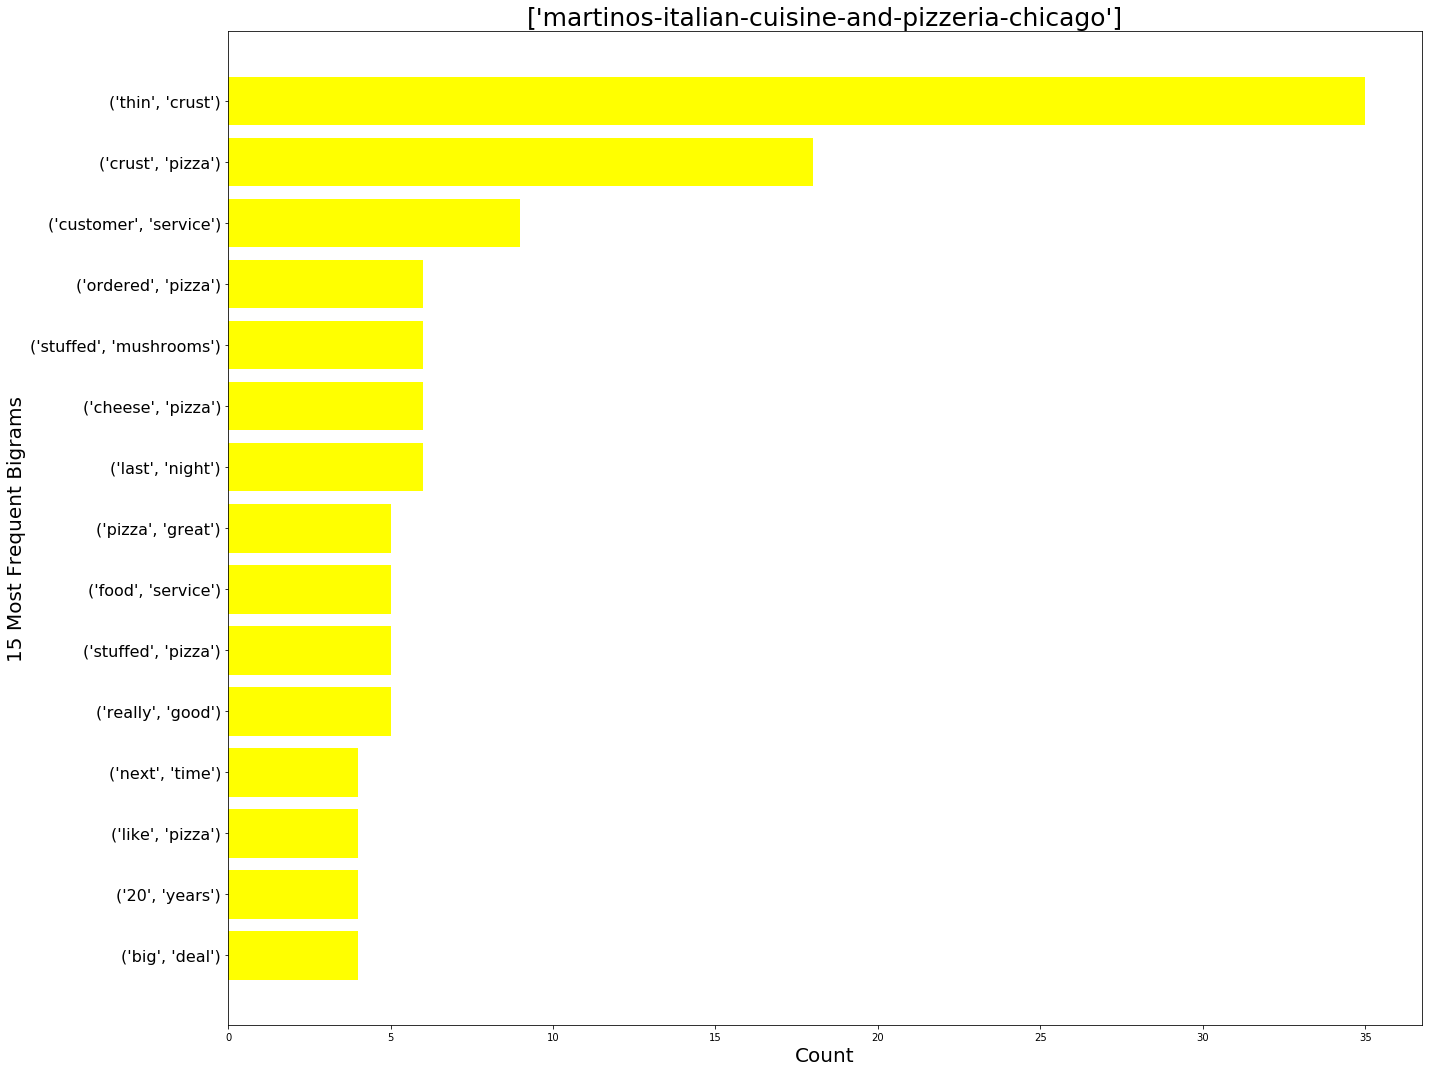

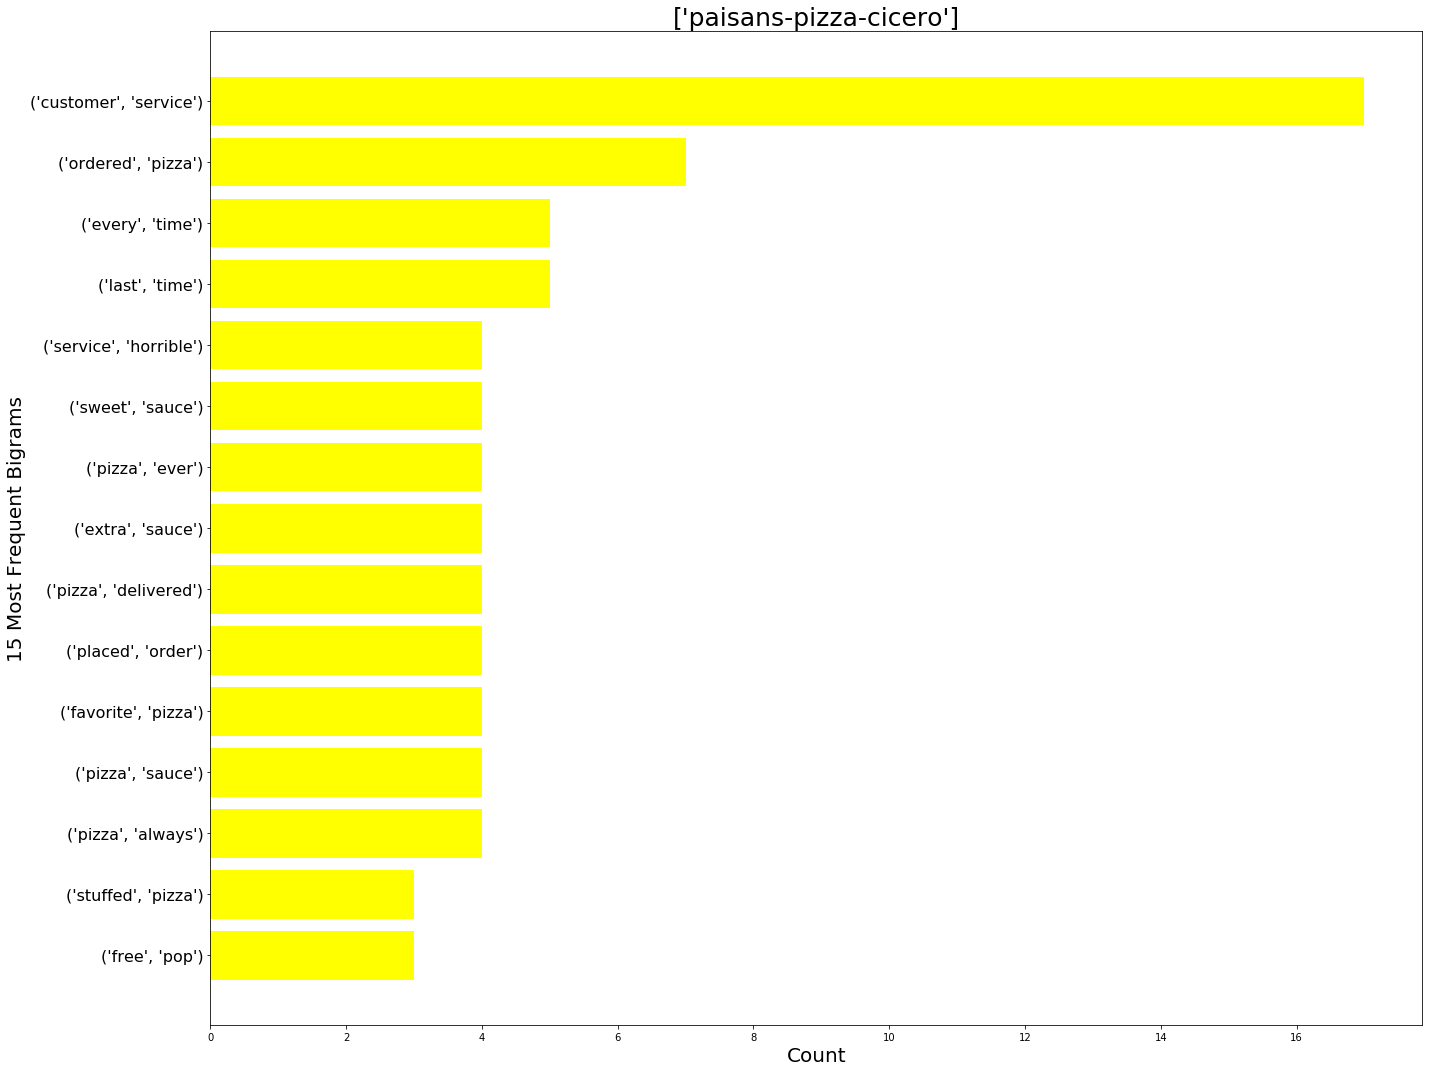

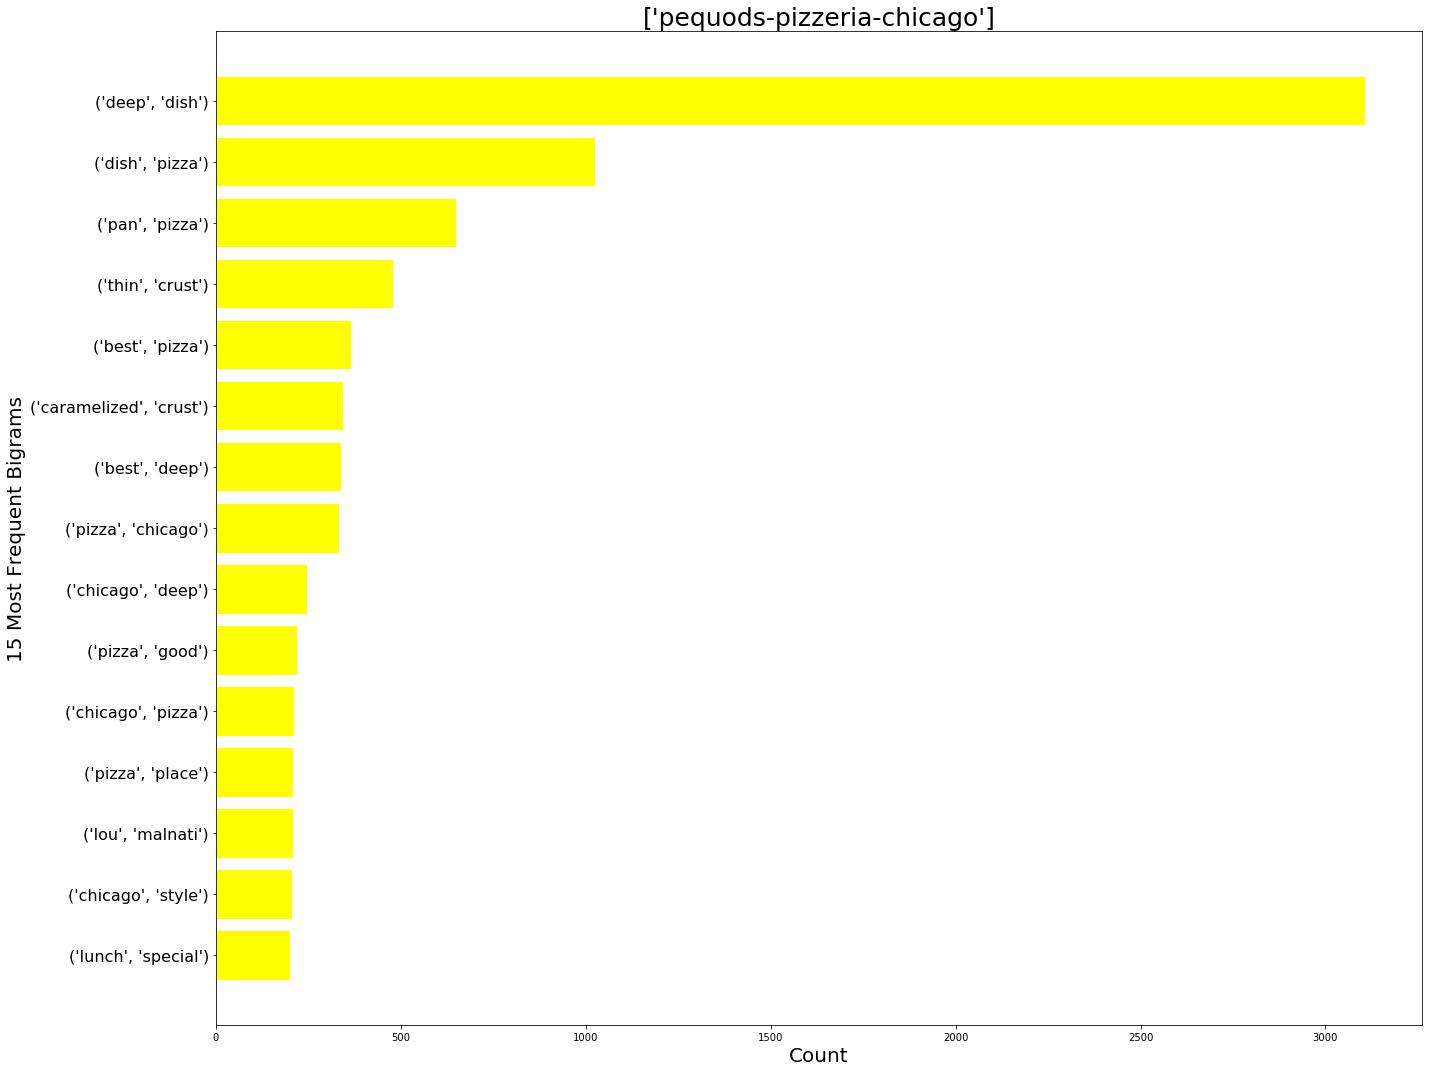

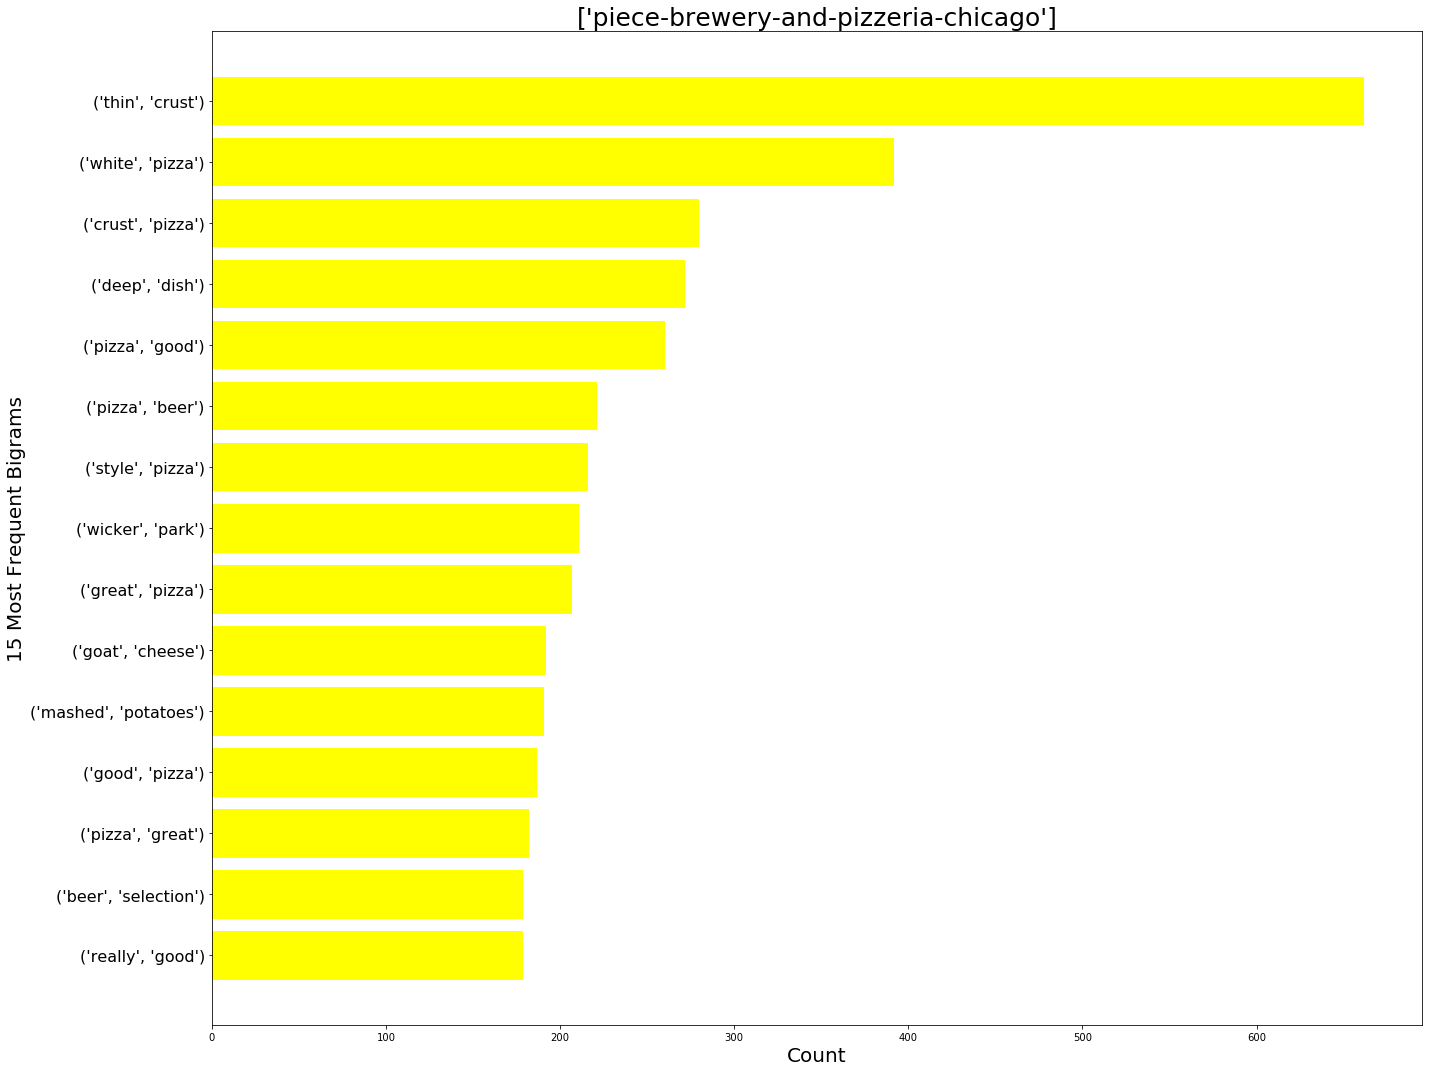

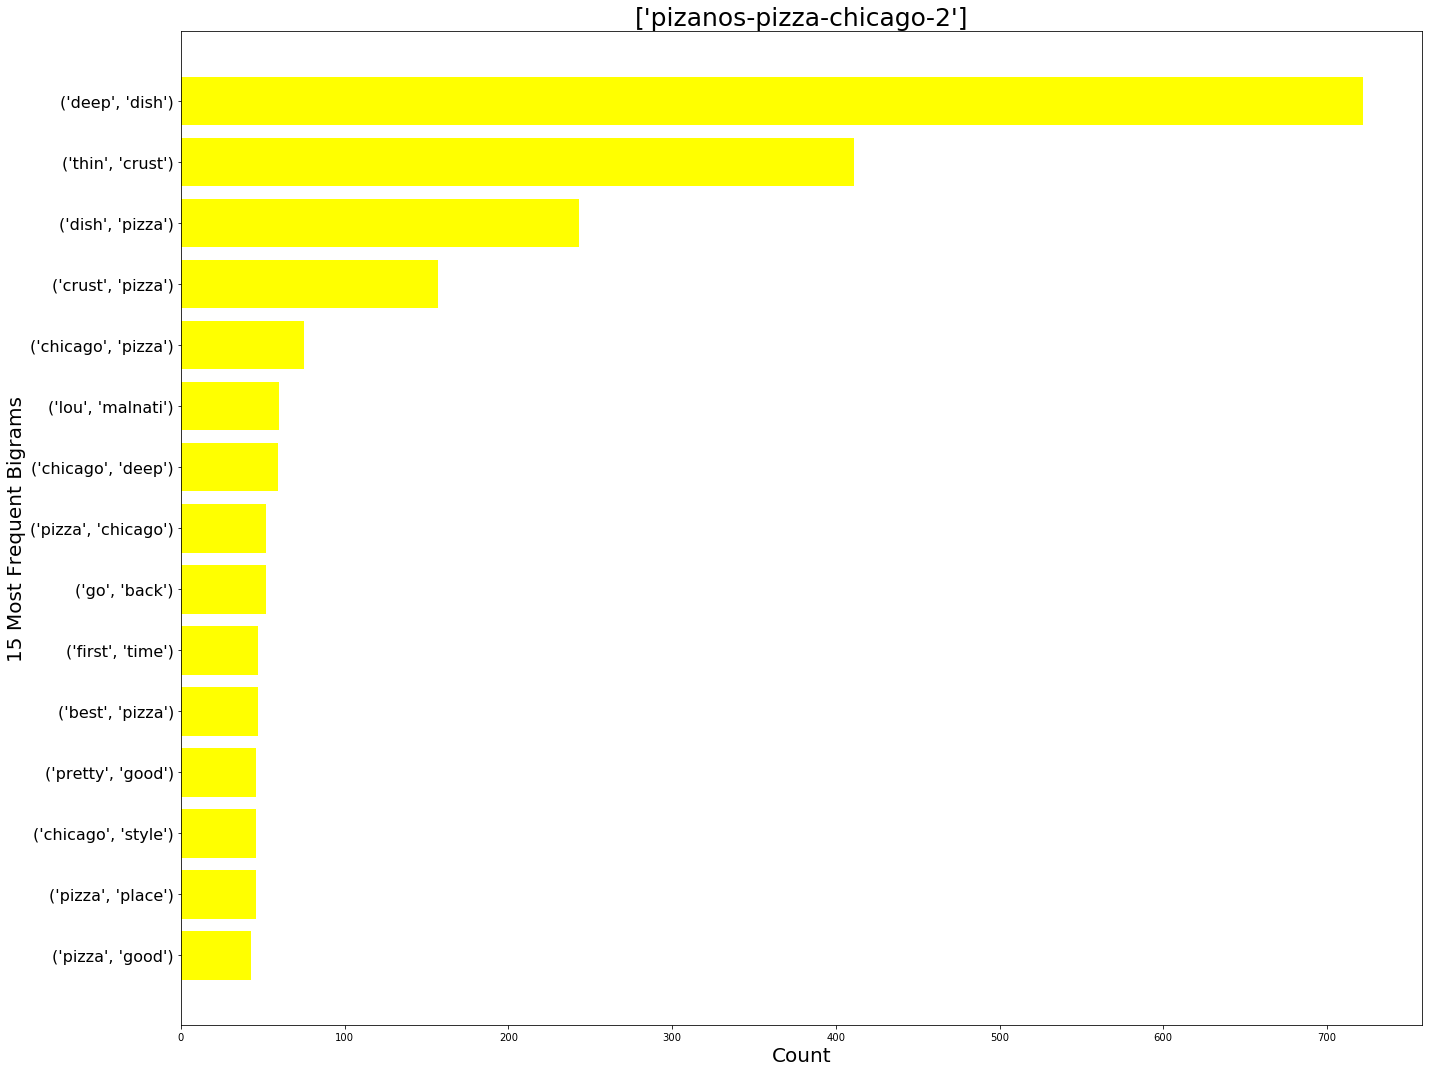

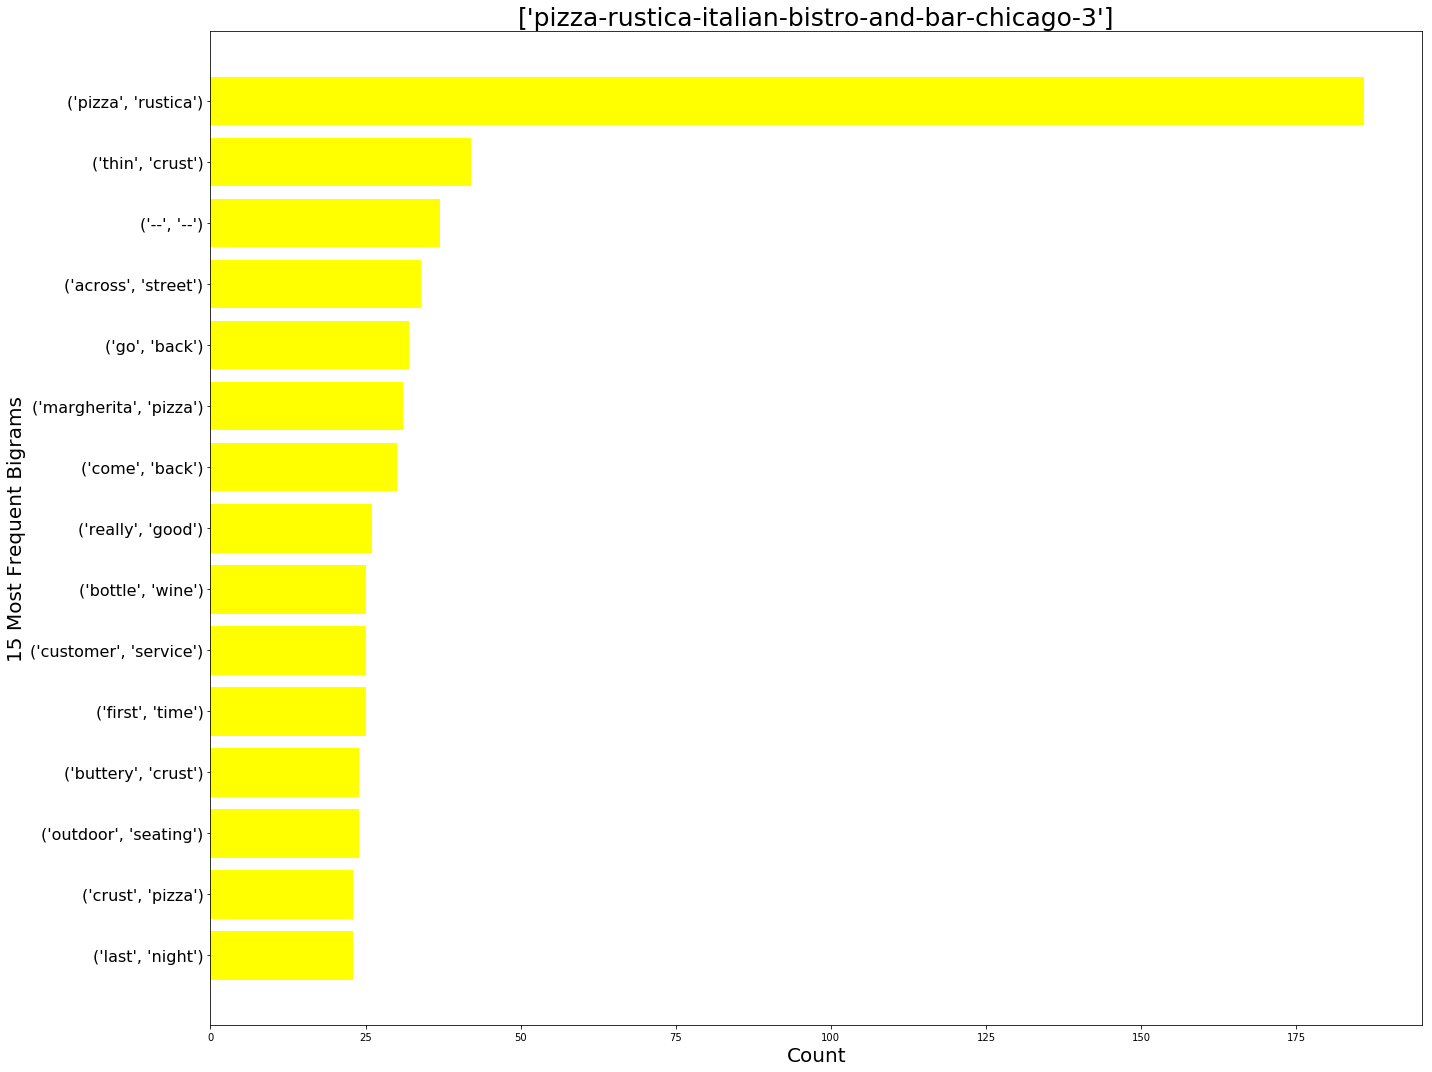

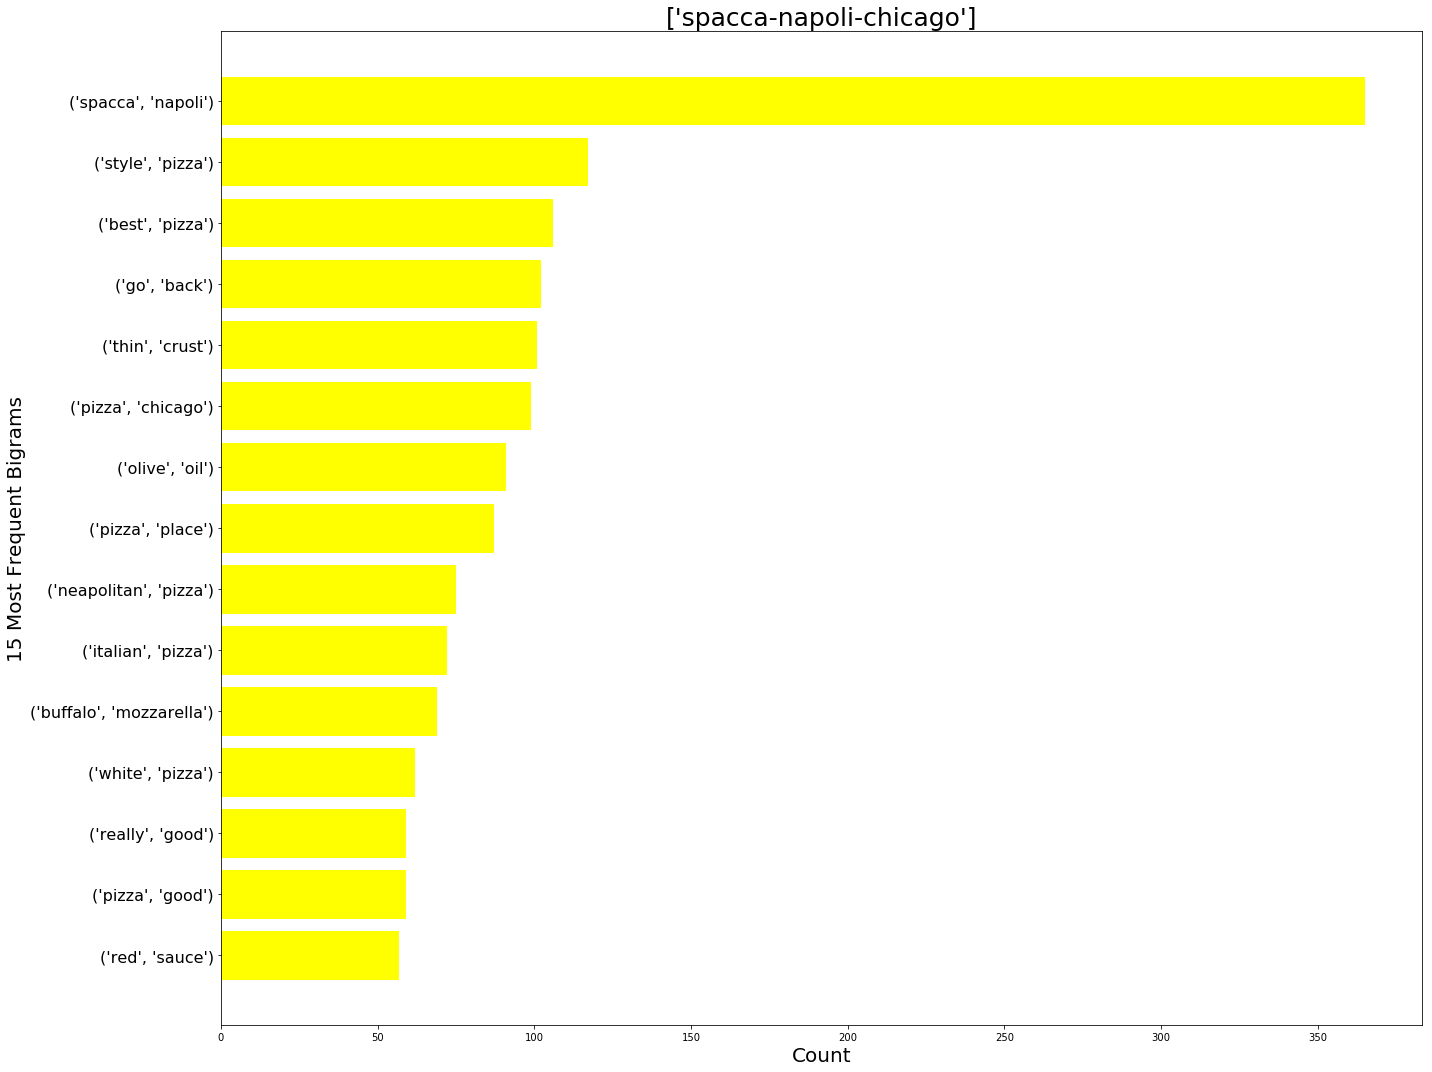

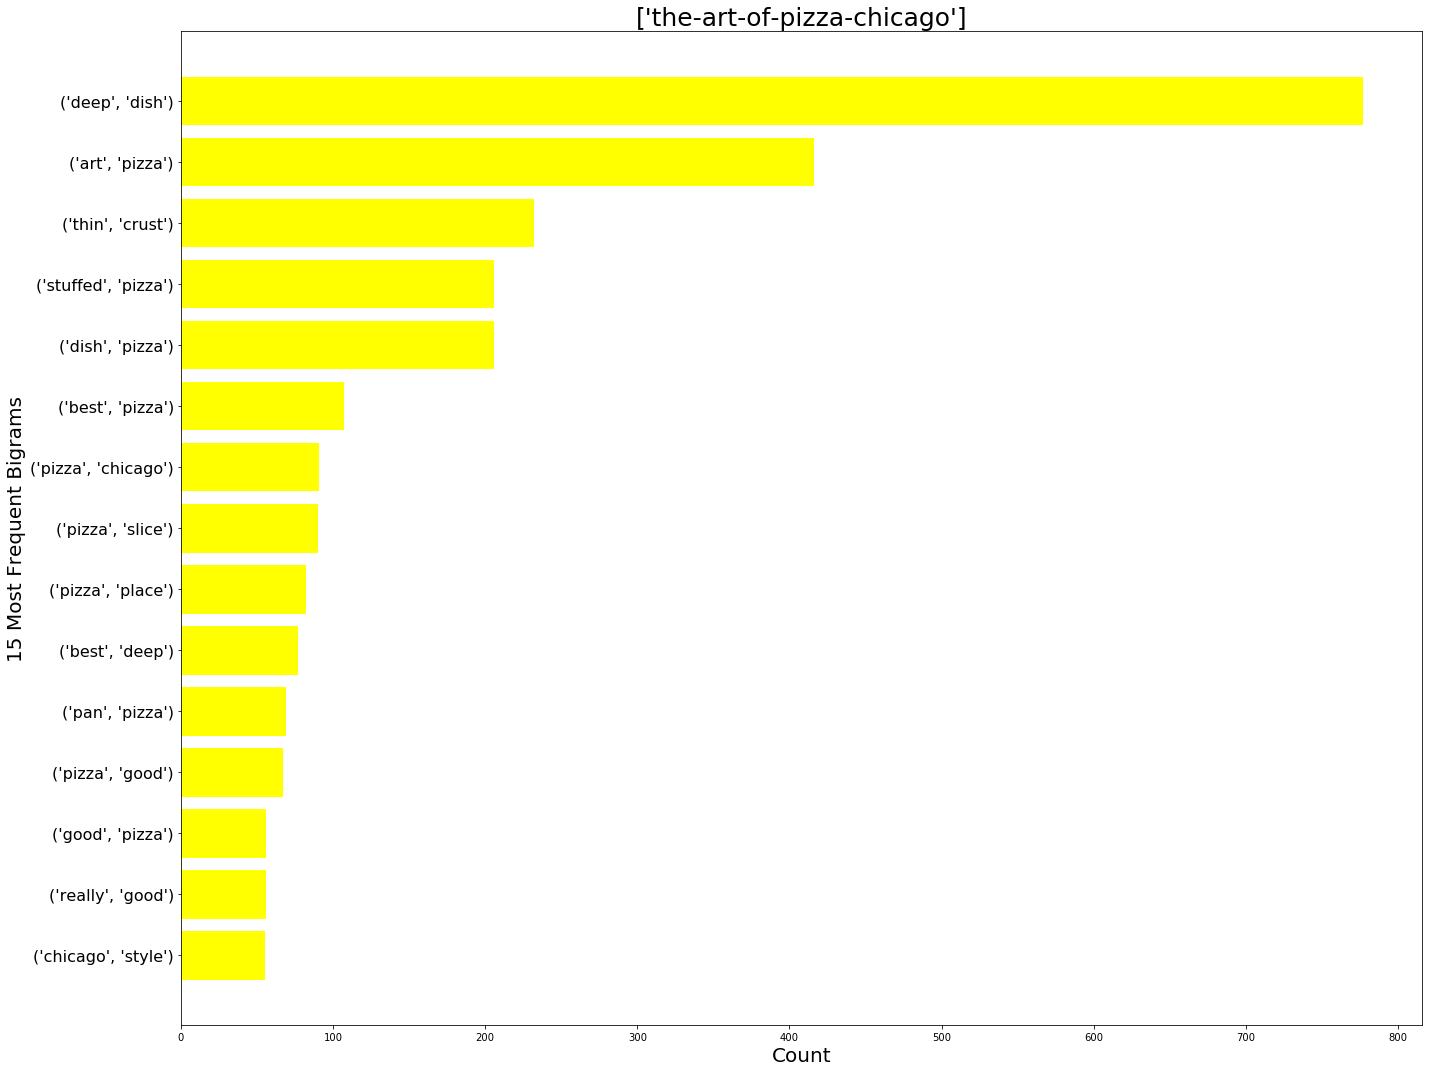

In [888]:
#take the filtered list of words from the prior step and make plots for each restaurant

for row in list(range(1,len(filt_txt))): #this ammounts to each row
    
    #filt_txt[:i]
    
    tbg = filt_txt[row - 1:row]
    #tbg.sort_values(ascending=True),#this not working
    res = filt_txt[row - 1:row].index.values
    
    
    bgrams = list(nltk.ngrams(" ".join(tbg[0]).split(),2))
    freqBgrams = nltk.FreqDist(bgrams)
    
    topBgrams = freqBgrams.most_common(15)
    topBgrams.sort(key=itemgetter(1))
    
    word = []
    frequency = []
    for i in list(range(len(topBgrams))): # 15 is the number of tuples it should be since I'm finding top 15
        word.append(topBgrams[i][0]) #i is going to be number of tuples for a restuarant;
        frequency.append(topBgrams[i][1])


    indices = np.arange(len(topBgrams)) #or filttxt
    ax = plt.subplots(figsize=(20,15))
    plt.title(res, fontsize=25)
    plt.xlabel('Count',fontsize = 20)
    plt.ylabel('15 Most Frequent Bigrams',fontsize = 20)
    plt.barh(indices, frequency, color='yellow')
    plt.yticks(indices, word, rotation='horizontal',size=16)

    plt.tight_layout()
    plt.show()

Above, the bigrams definitely give us more insight into the common words for each restaurant. But it almost seems as if two words isn't quite enough to get a larger view of people's intent/ideas about the restaurant. Let's try three words.

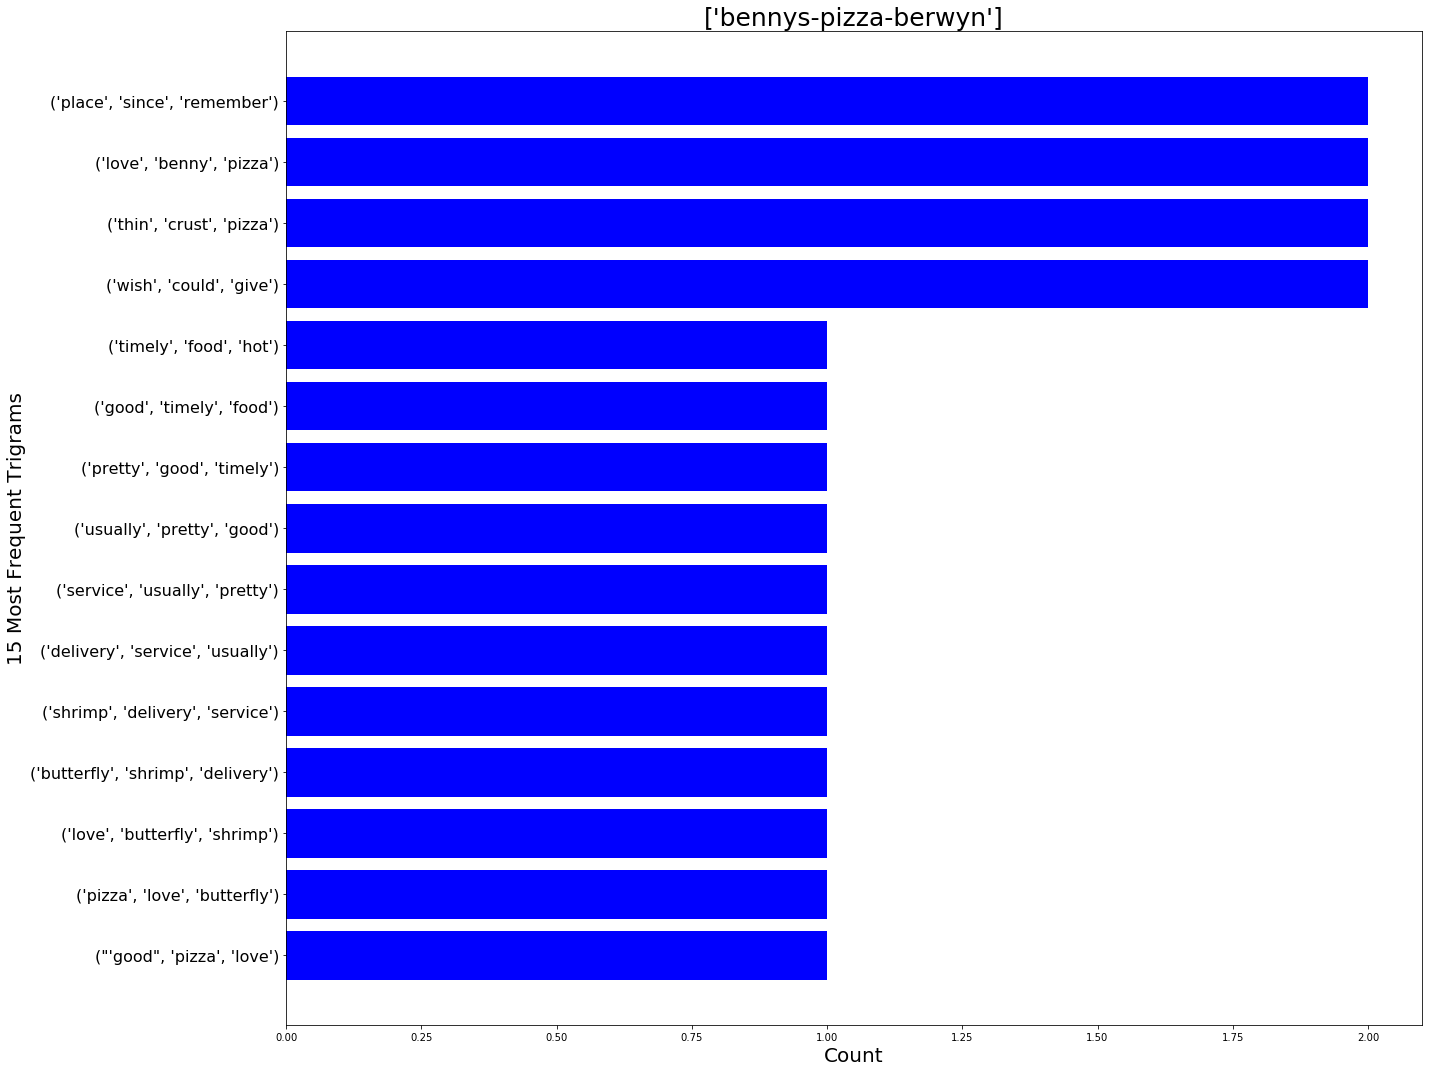

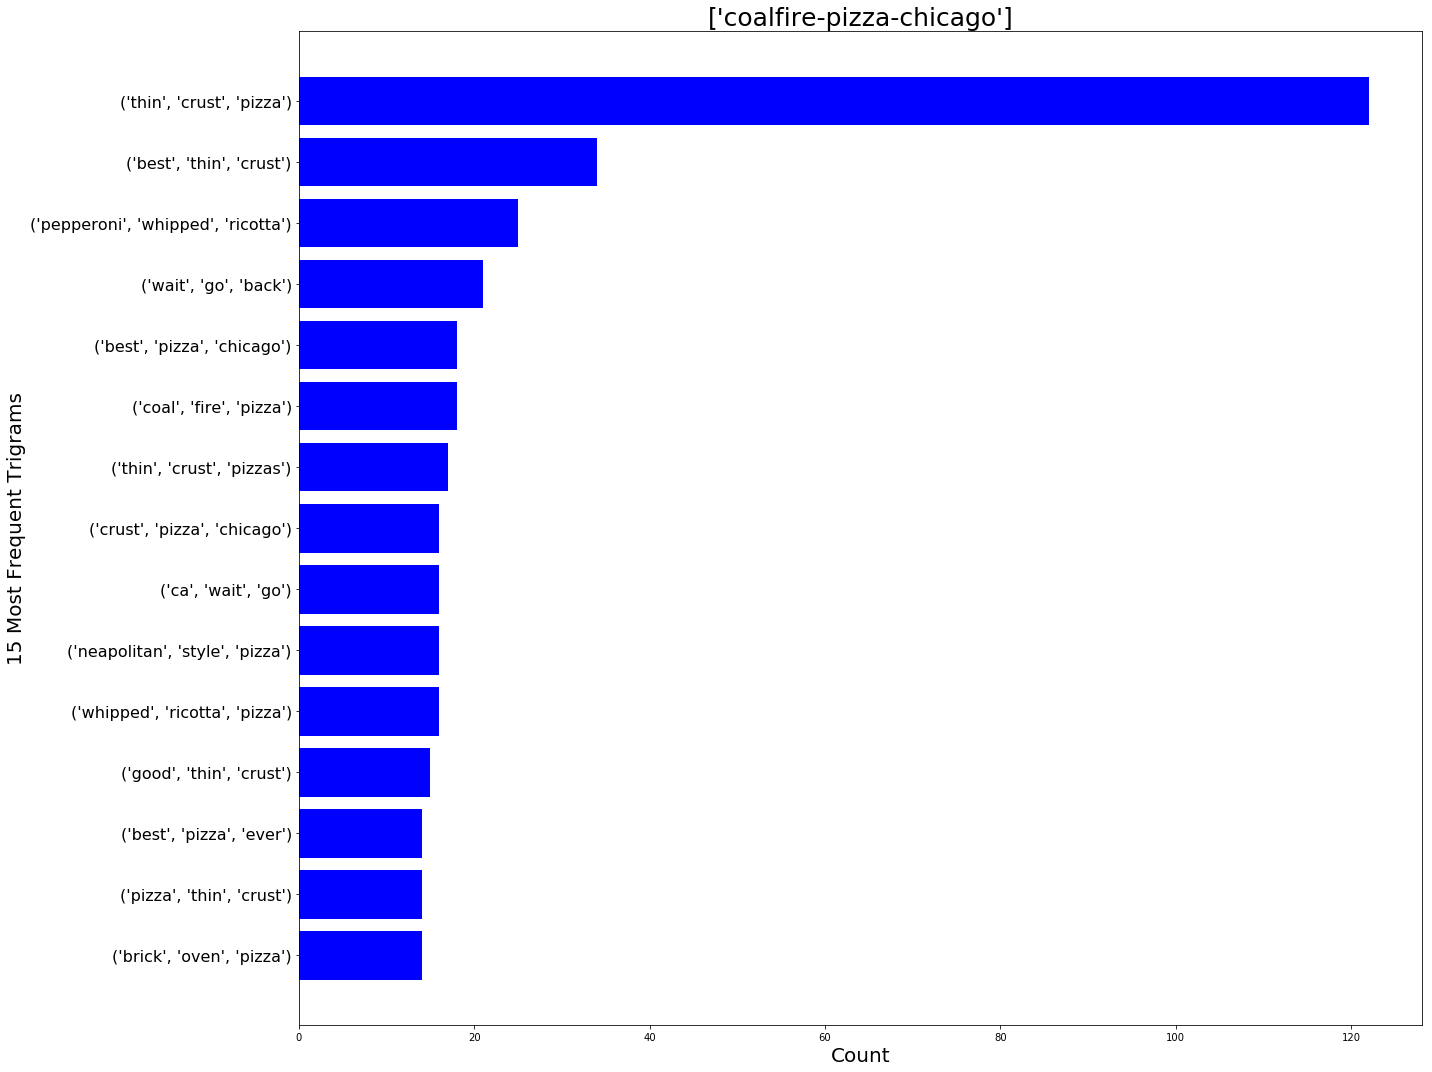

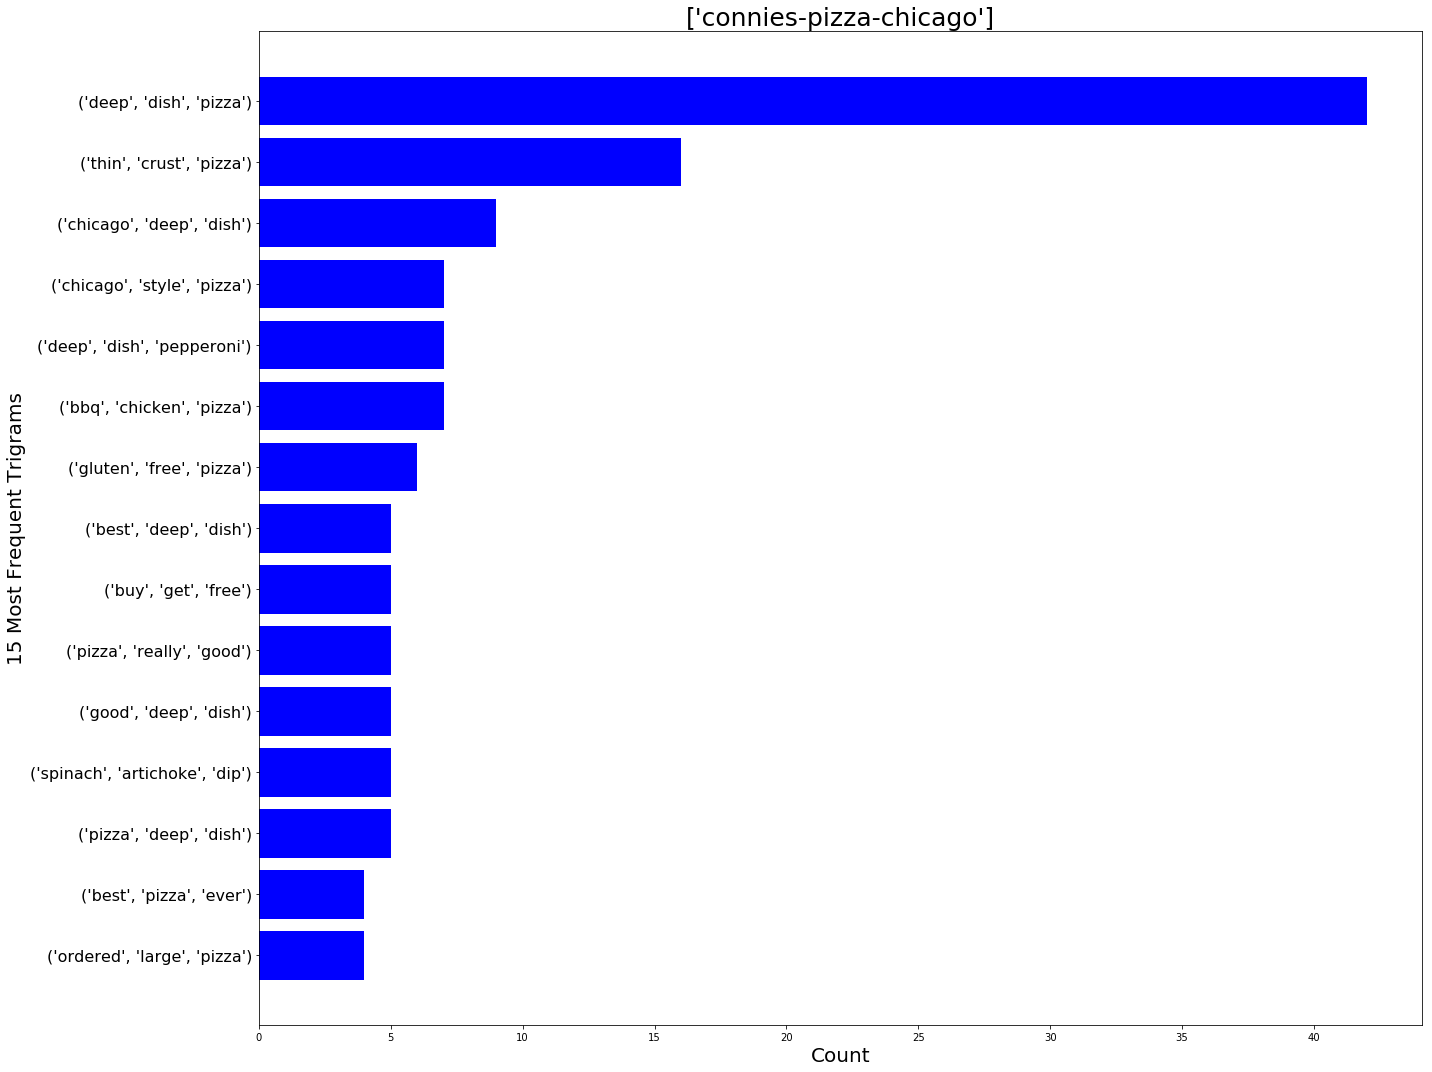

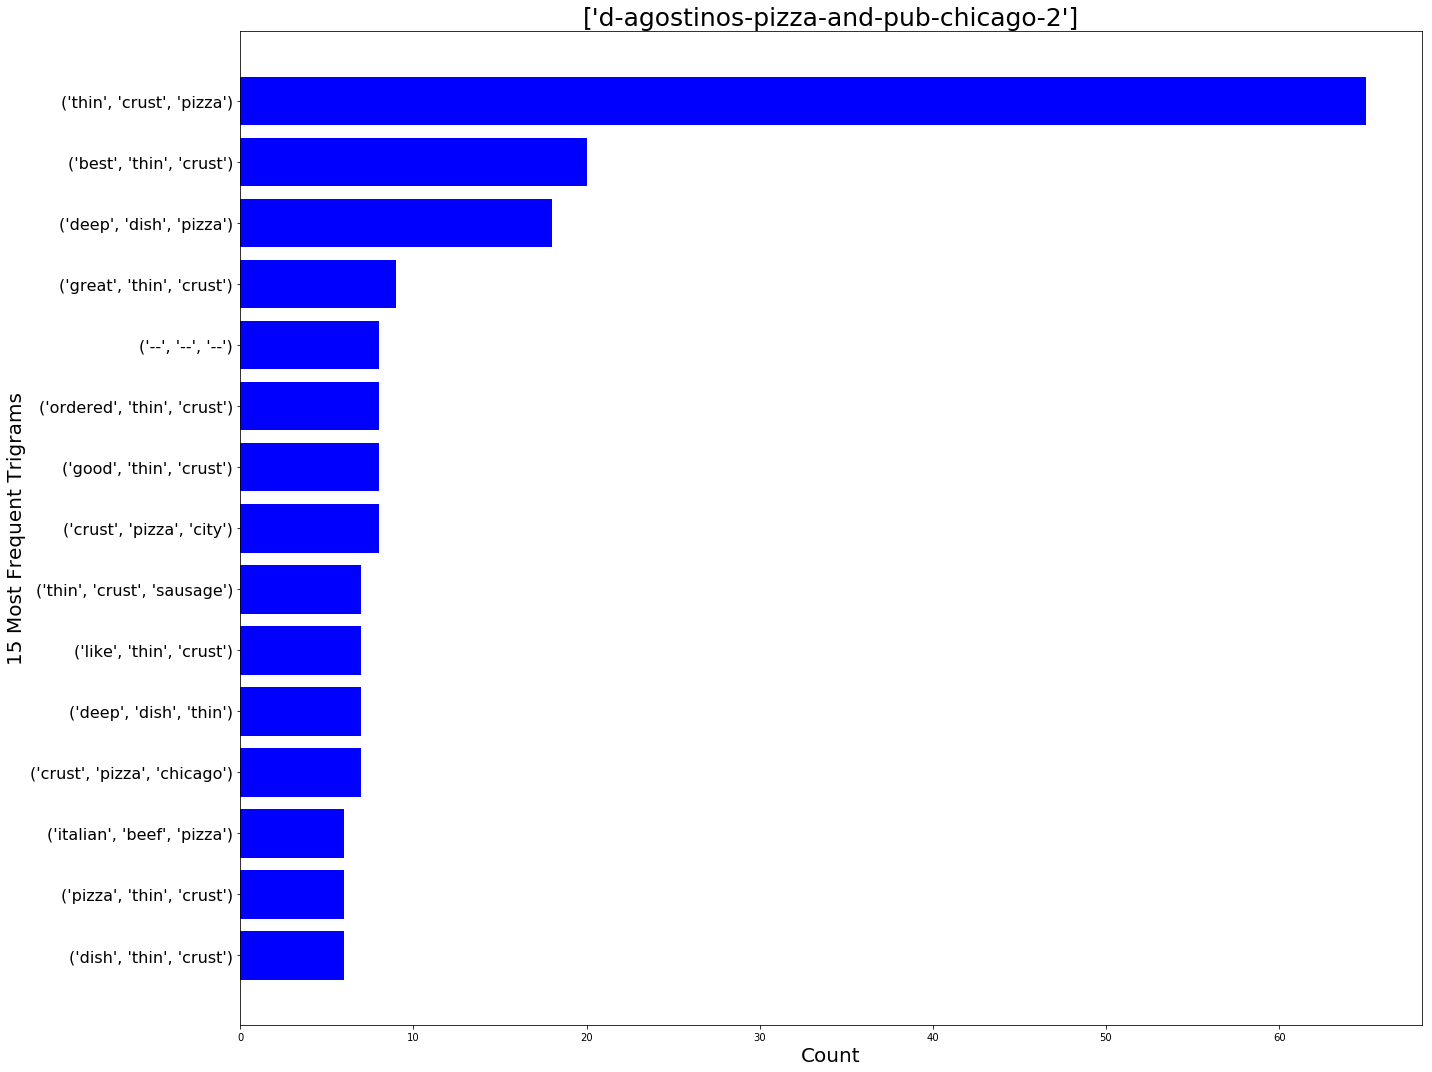

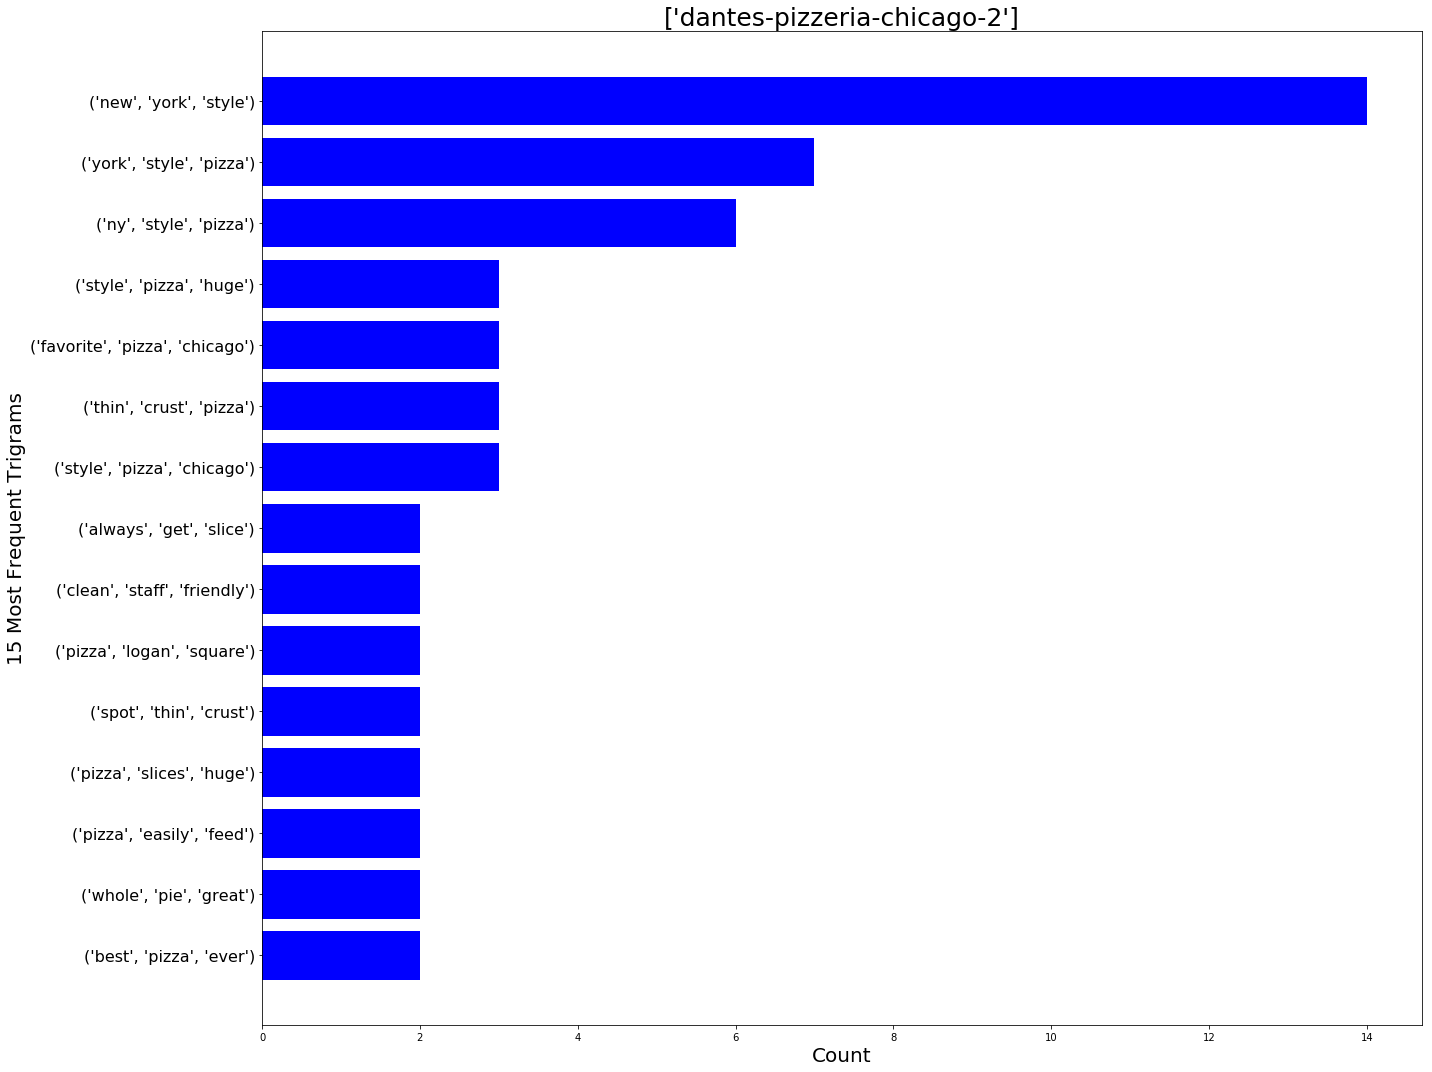

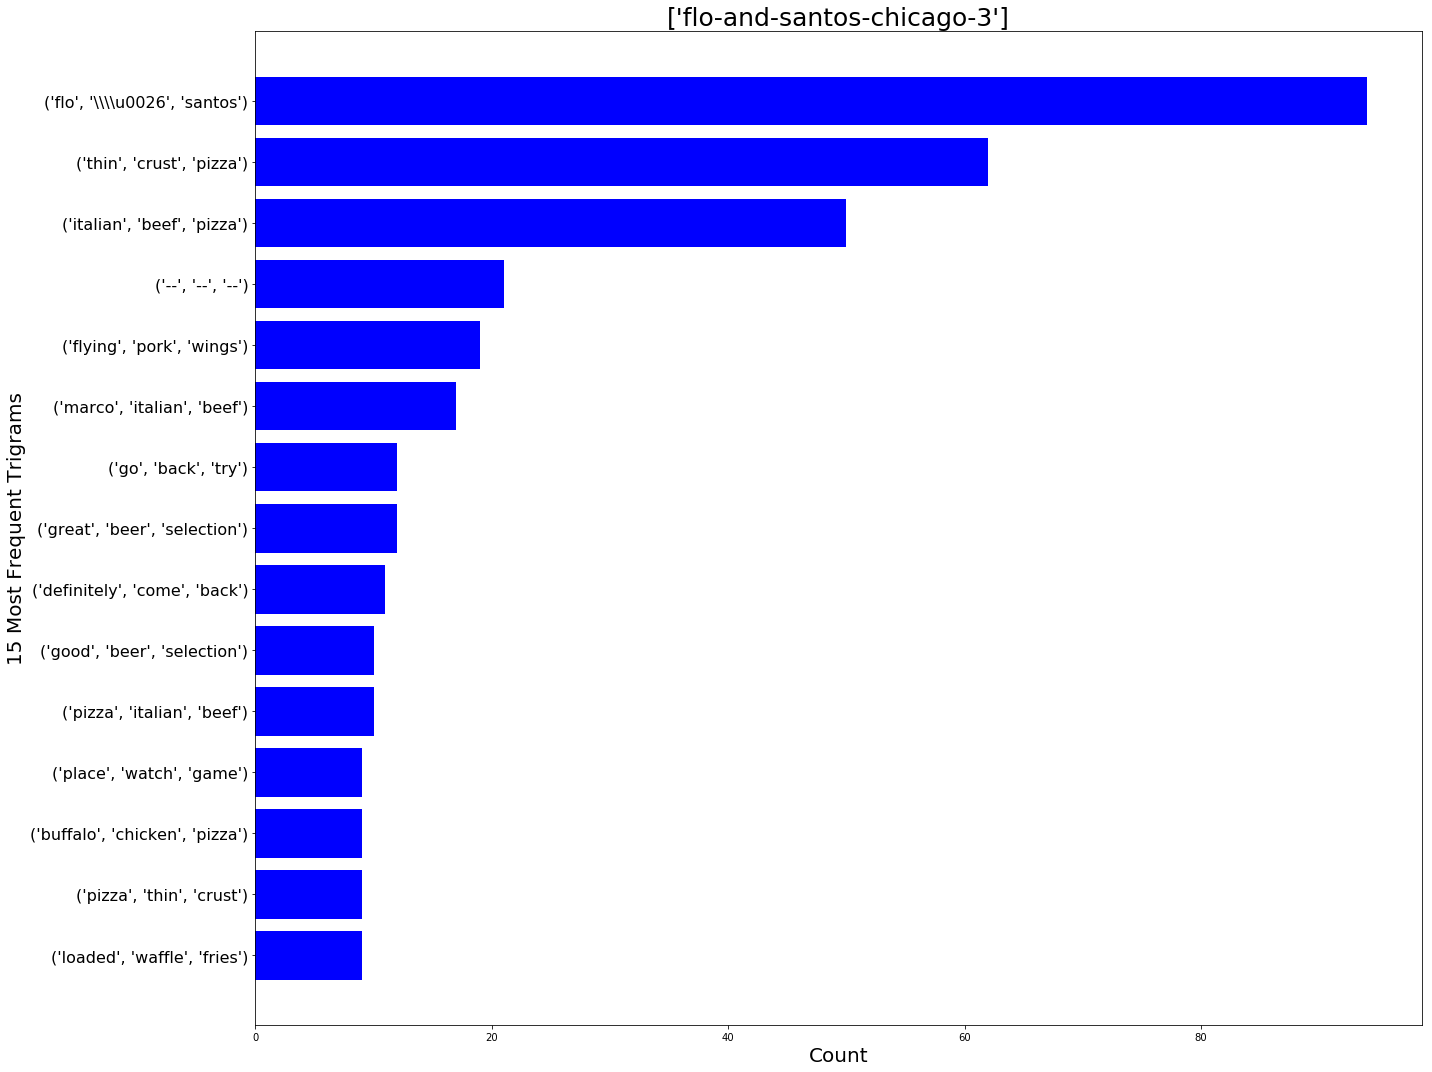

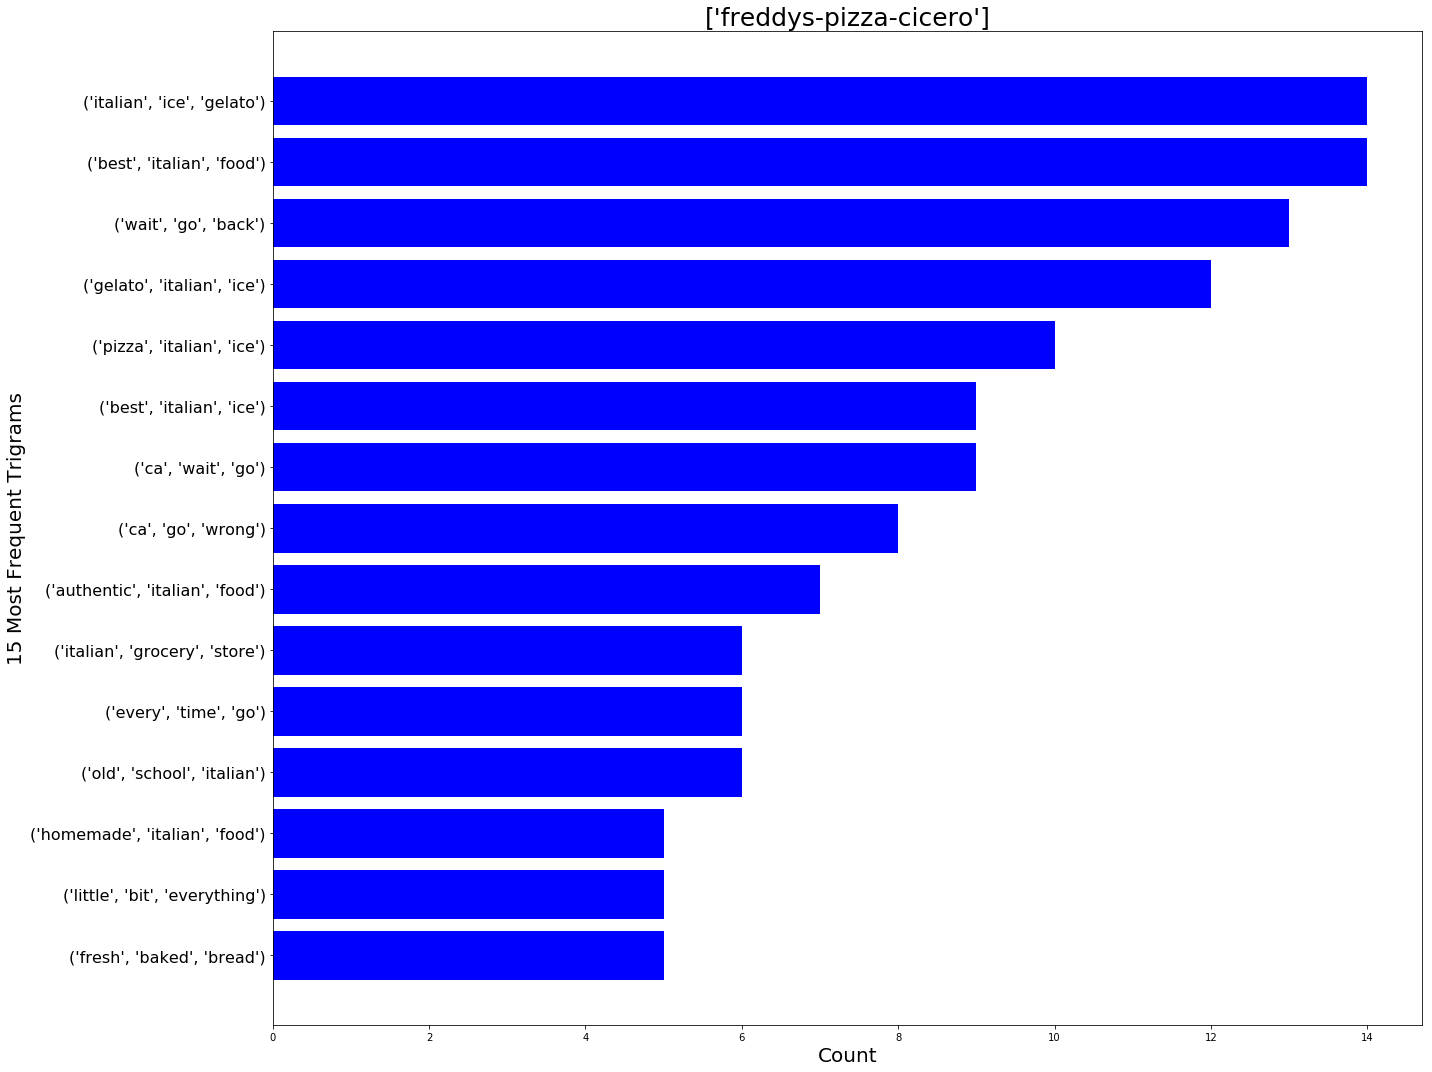

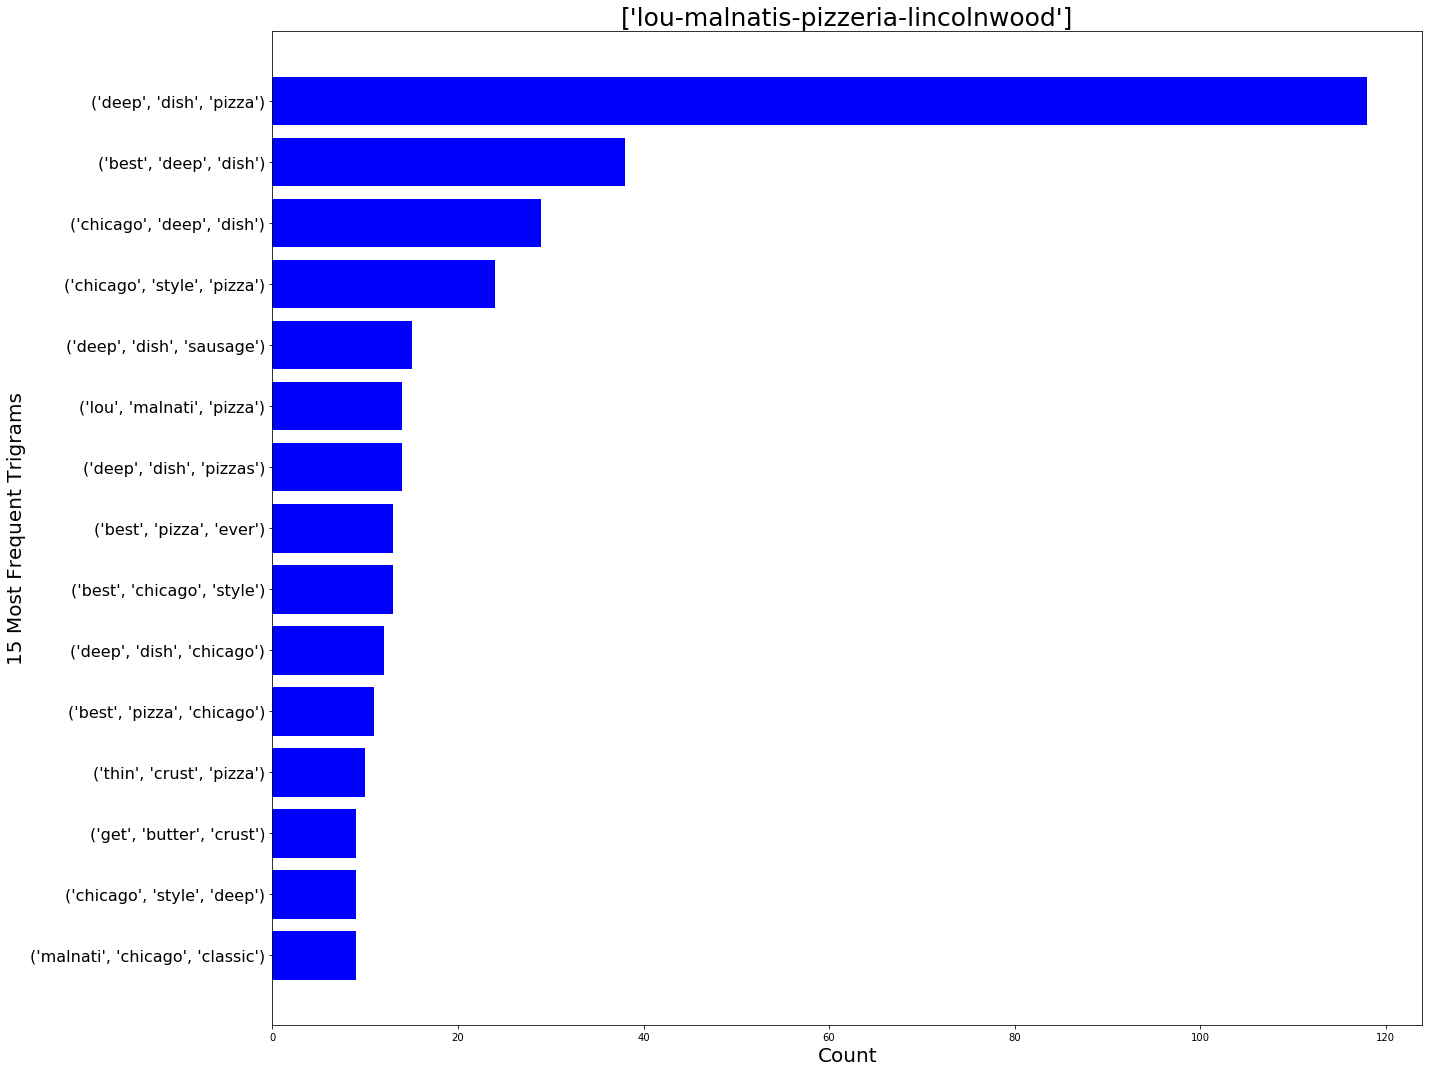

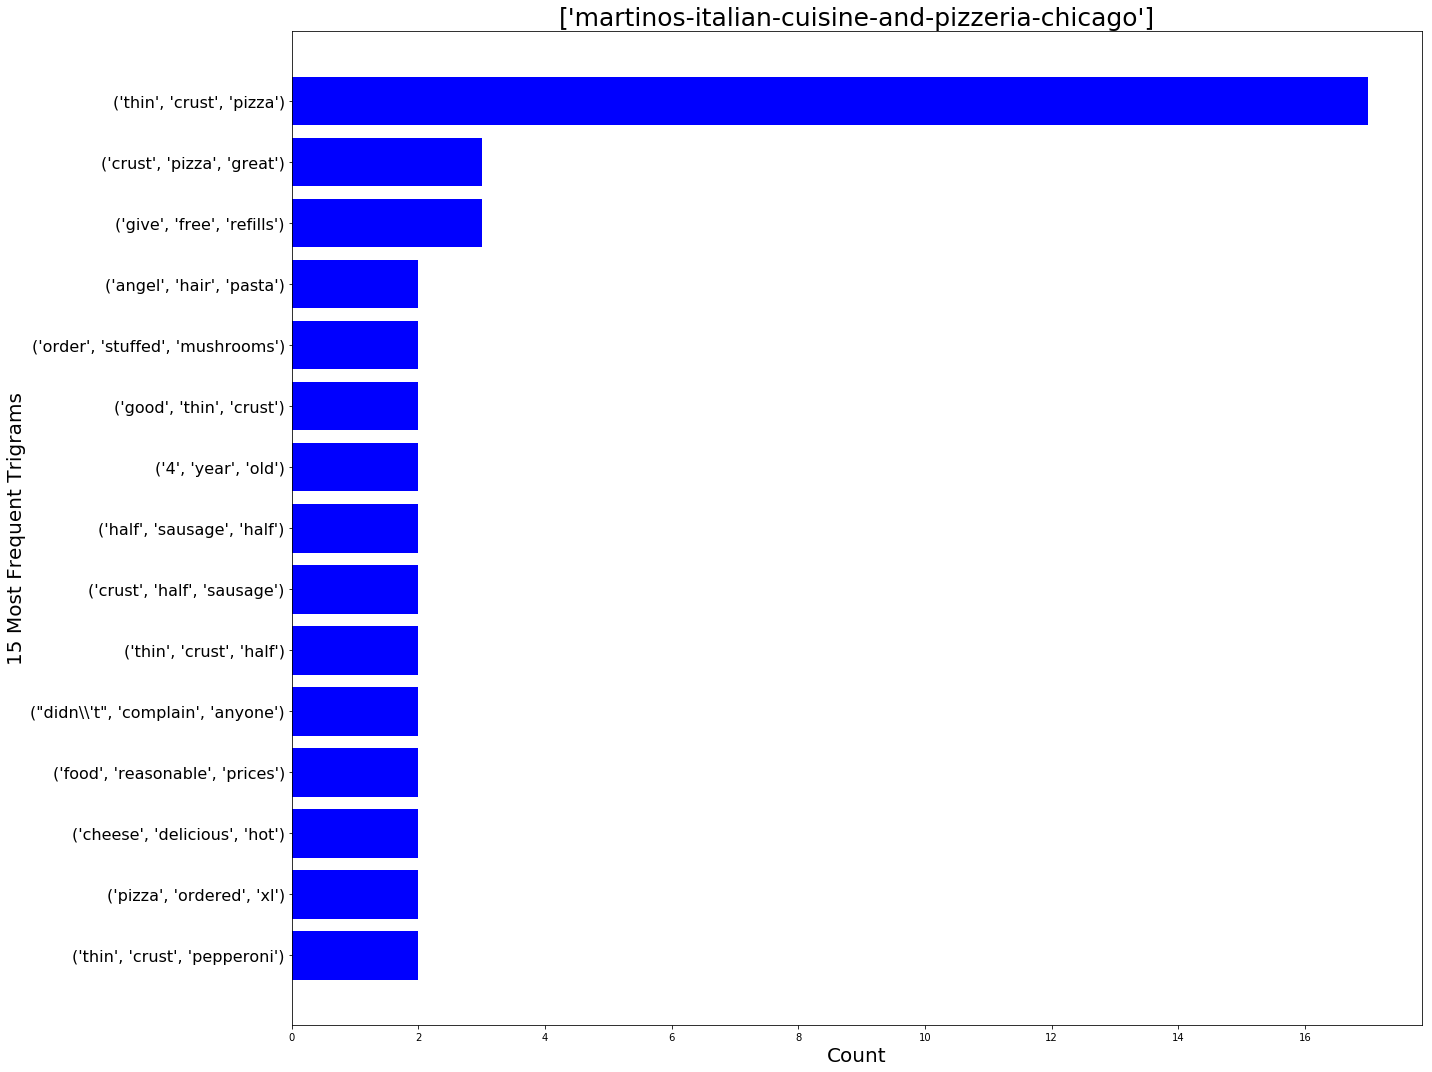

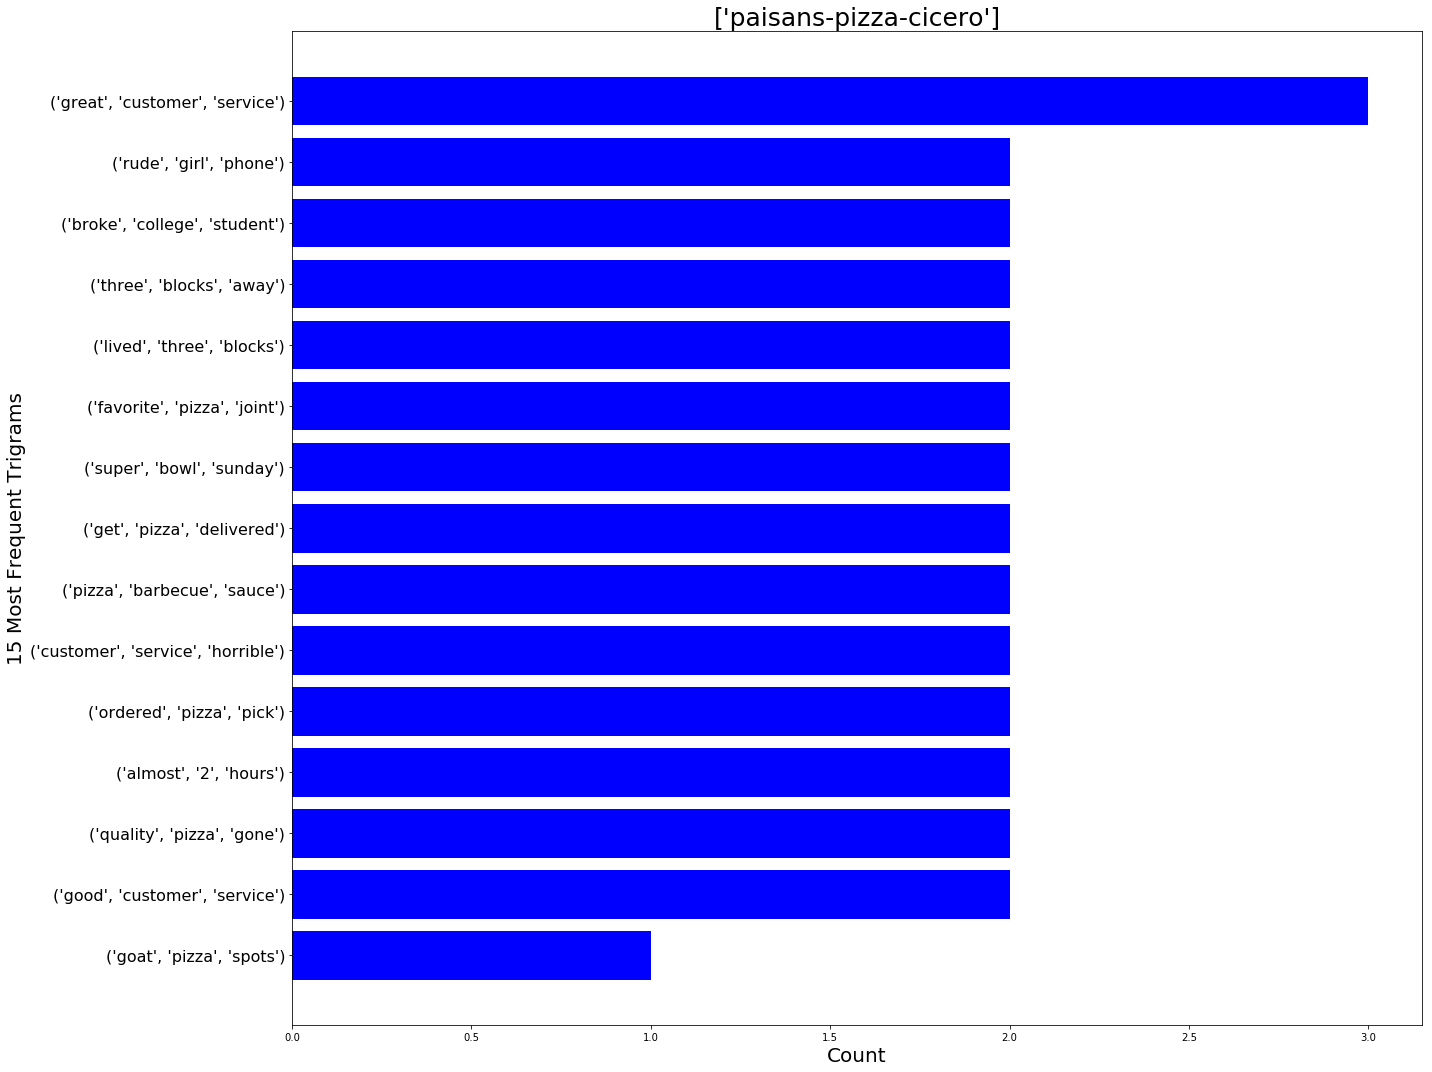

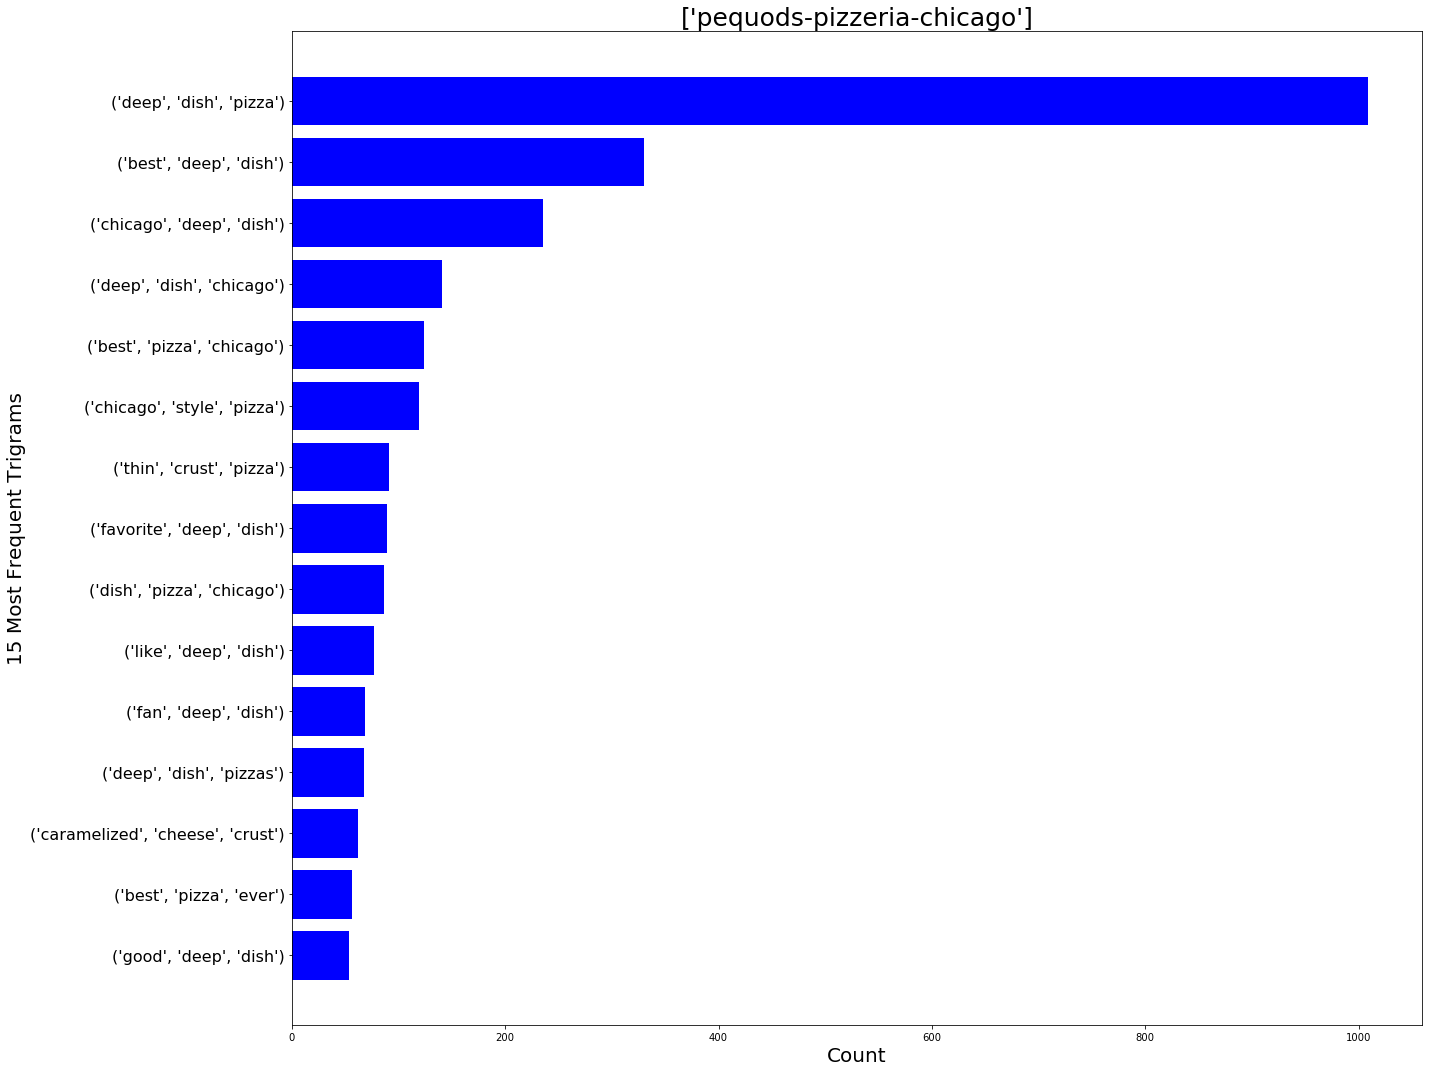

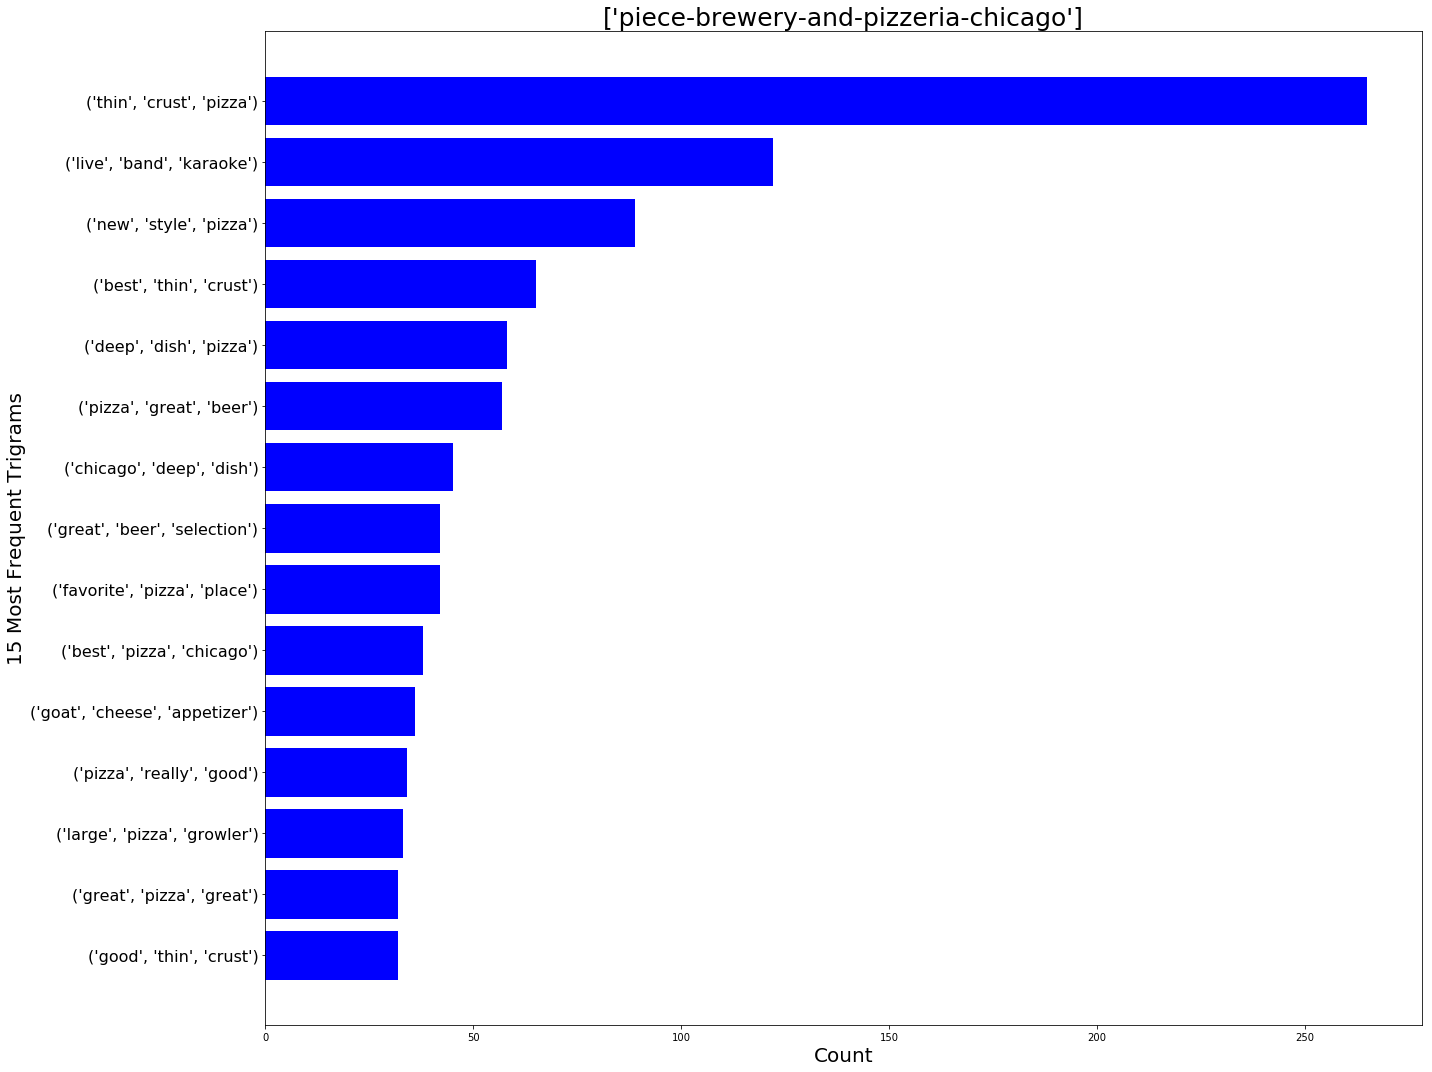

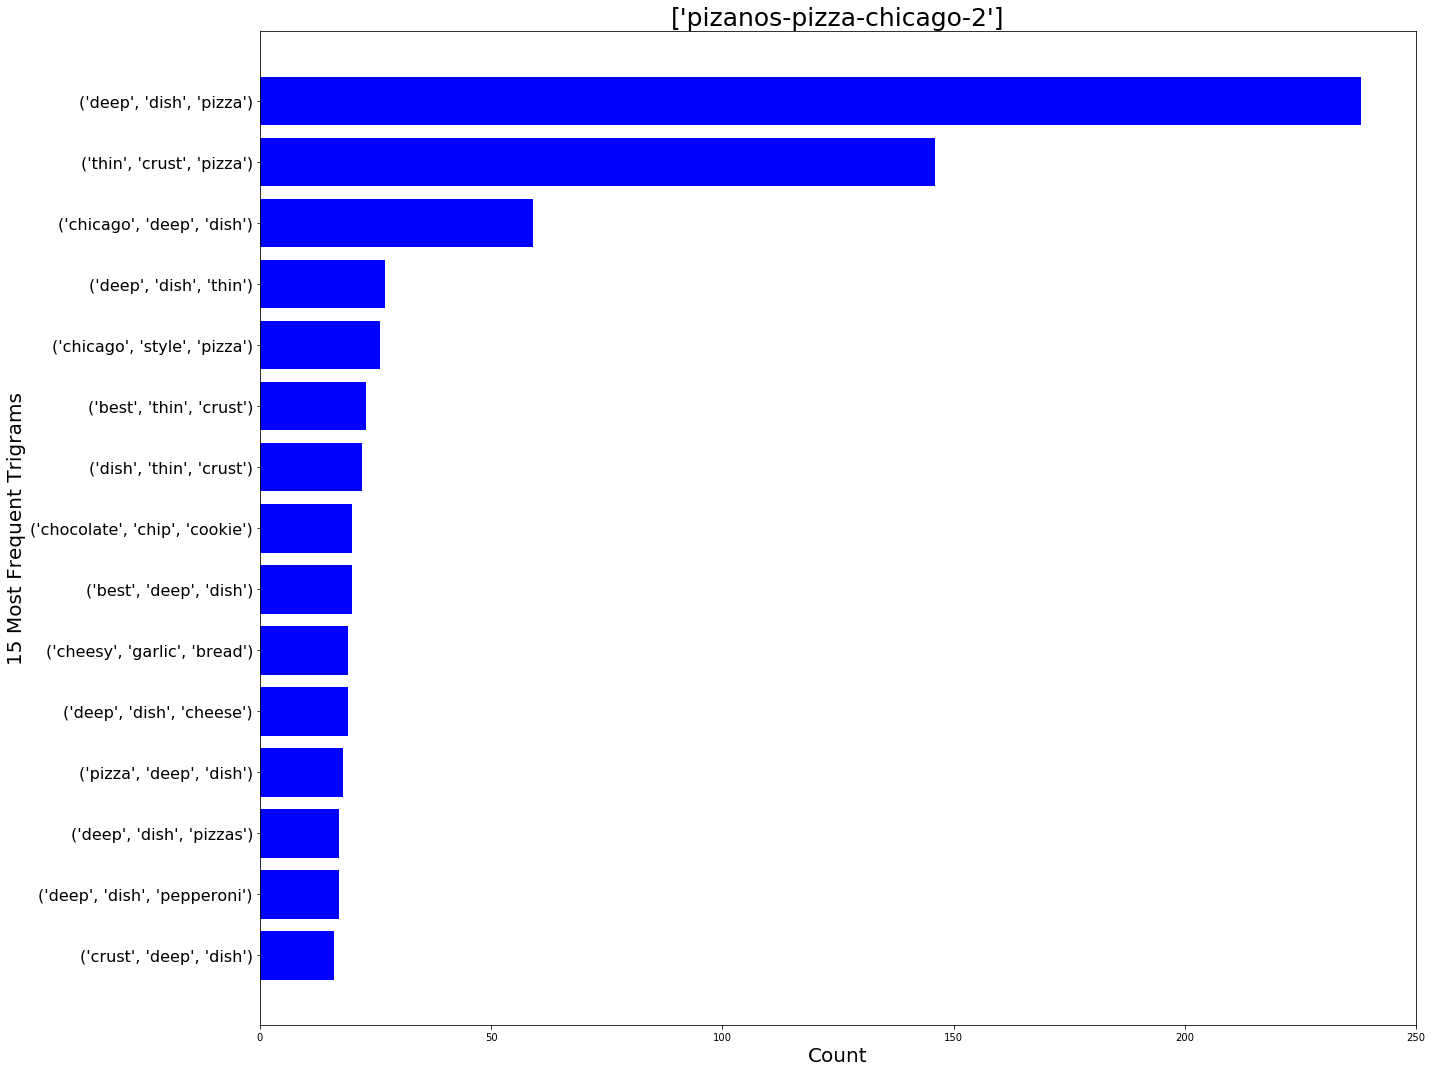

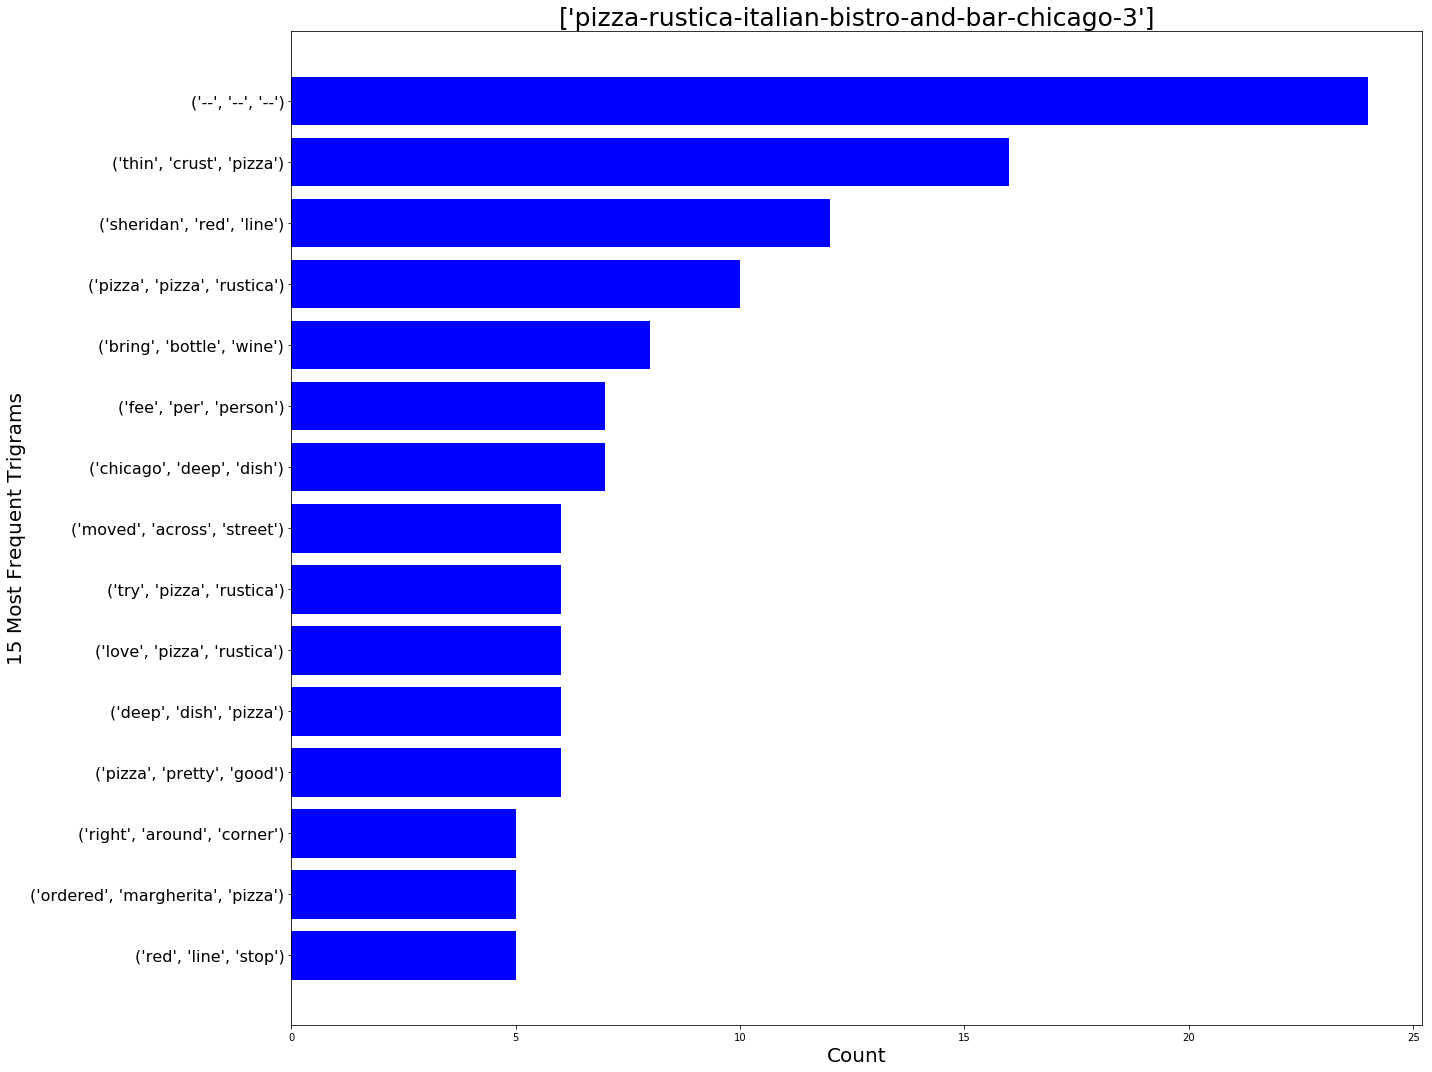

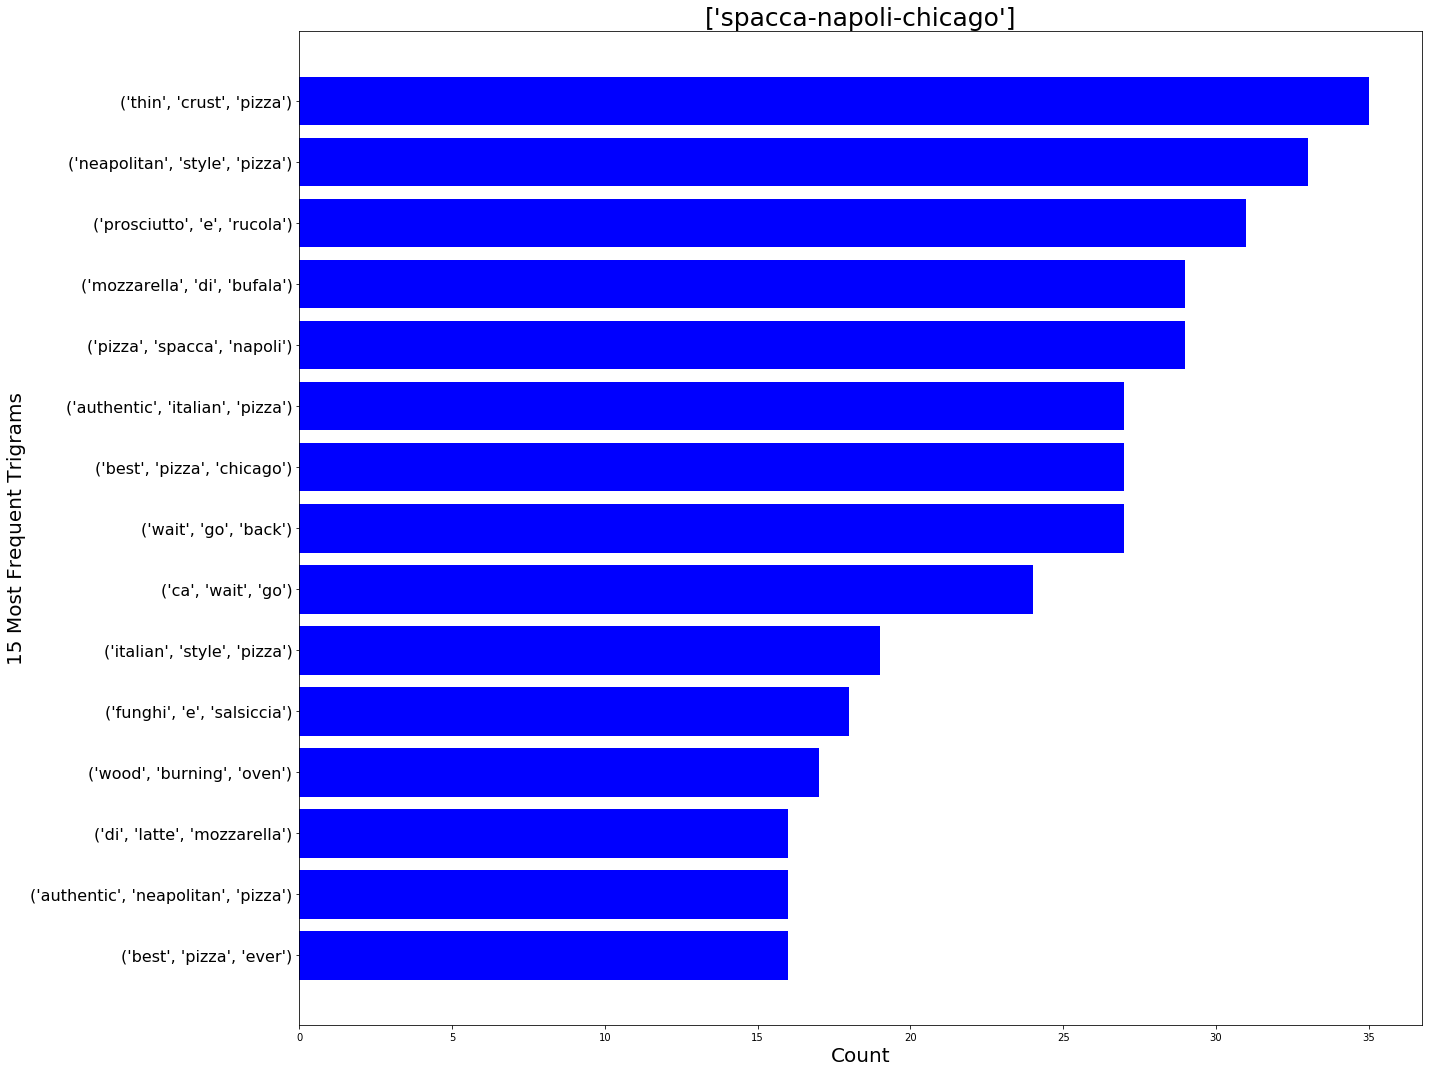

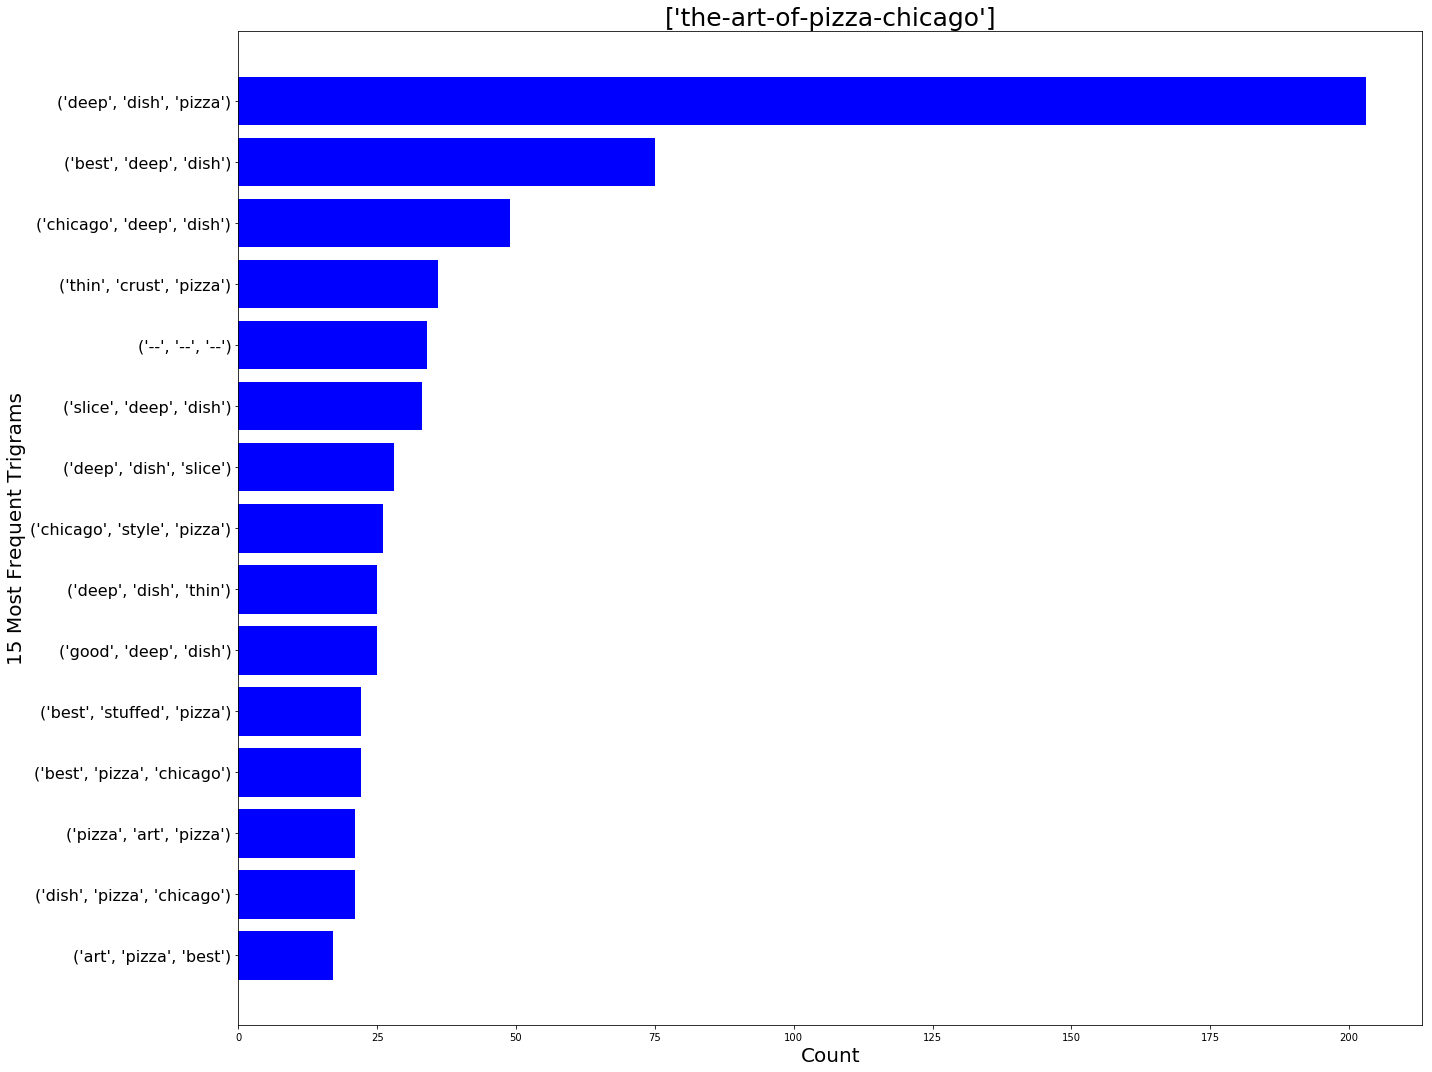

In [887]:
for row in list(range(1,len(filt_txt))): #this ammounts to each row
    
    #filt_txt[:i]
    
    tbg = filt_txt[row - 1:row]
    #tbg.sort_values(ascending=True),#this not working
    res = filt_txt[row - 1:row].index.values
    
    
    bgrams = list(nltk.ngrams(" ".join(tbg[0]).split(),3))
    freqBgrams = nltk.FreqDist(bgrams)
    
    topBgrams = freqBgrams.most_common(15)
    topBgrams.sort(key=itemgetter(1))
    
    word = []
    frequency = []
    for i in list(range(len(topBgrams))): # 15 is the number of tuples it should be since I'm finding top 15
        word.append(topBgrams[i][0]) #i is going to be number of tuples for a restuarant;
        frequency.append(topBgrams[i][1])


    indices = np.arange(len(topBgrams)) #or filttxt
    ax = plt.subplots(figsize=(20,15))
    plt.title(res, fontsize=25)
    plt.xlabel('Count',fontsize = 20)
    plt.ylabel('15 Most Frequent Trigrams',fontsize = 20)
    plt.barh(indices, frequency, color='blue')
    plt.yticks(indices, word, rotation='horizontal',size=16)

    plt.tight_layout()
    plt.show()

Above we take a look at the most common trigrams for each restaurant, just to see if we can gain any additional insights. Looking at this, we can tell what type of pizza a restaurant is good for; for example Dante's does New York style pizza, Connie's is great for deep dish, and D'agostino's although they seem to do both deep and thin, thin crust gets more mentions, and is prefaced with some positive comments.

We could take insights such as this a bit further by doing some sentiment around common words, so that we can know what a restaurant is good and bad at. Like, "great butter crust" or "horrible customer service".

# Term Document Matrix and Similarities in Review Text


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

In [914]:
#function returns filtered string of all reviews for each restaurant;

def filteredstring_fun(reviews):
    #global(stop_words)
    #global(throwaways)
    
    bigstring = str(reviews.tolist()).lower().strip(r"\\n\\")
    tokens = word_tokenize(bigstring)
    
    filtered_desc = []

    for word in tokens:
        if word not in stop_words and word not in throwaways:
            filterd_desc = filtered_desc.append(word)
            
    filt_string = " ".join(filtered_desc)
    
    return(filt_string)
    
    
    
    
filt_string = descWide.apply(filteredstring_fun, axis=0) #it's a filtered corpus

In [921]:
#create a document term matrix
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(filt_string) #a sparse matrix

my_dtm = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names())

vocab = vectorizer.get_feature_names() # a list of words from the matrix

In [949]:
mtx_rstnt = filt_string.index

We can use the document term matrix to calculate distances/measures of dissimilarity between the restaurants

In [939]:
dist = euclidean_distances(my_dtm)
dist[1,4] #to return the distance between two restaurants. look at mtx_rstnt to see which index number is which restaurant

Using cosine similarity, we can easily see which restaurants are most similar according to the distances calculated by text. Cosine similarity is nice because it takes into consideration the length of the texts. Below is a cosine_similarity matrix.

In [968]:
sim = cosine_similarity(my_dtm)
pd.DataFrame(np.round(sim, 2)).set_index(mtx_rstnt)
#want to give the columns restaurant headers as well

0     1     2     3     4   \
restaurant                                                                     
bennys-pizza-berwyn                             1.00  0.85  0.84  0.87  0.83   
coalfire-pizza-chicago                          0.85  1.00  0.89  0.92  0.88   
connies-pizza-chicago                           0.84  0.89  1.00  0.91  0.84   
d-agostinos-pizza-and-pub-chicago-2             0.87  0.92  0.91  1.00  0.87   
dantes-pizzeria-chicago-2                       0.83  0.88  0.84  0.87  1.00   
flo-and-santos-chicago-3                        0.79  0.86  0.86  0.87  0.80   
freddys-pizza-cicero                            0.61  0.62  0.69  0.65  0.61   
lou-malnatis-pizzeria-lincolnwood               0.78  0.85  0.88  0.86  0.79   
martinos-italian-cuisine-and-pizzeria-chicago   0.82  0.82  0.86  0.89  0.79   
paisans-pizza-cicero                            0.85  0.82  0.83  0.88  0.83   
pequods-pizzeria-chicago                        0.80  0.88  0.88  0.89  0.82   
piece-brewery-and-pizzeria-chicago              0.82  0.91  0.86  0.88  0.85   
pizanos-pizza-chicago-2                         0.79  0.89  0.91  0.92  0.81   
pizza-rustica-italian-bistro-and-bar-chicago-3  0.82  0.90  0.90  0.90  0.84   
spacca-napoli-chicago                           0.83  0.93  0.88  0.88  0.85   
the-art-of-pizza-chicago                        0.82  0.88  0.87  0.90  0.85   
the-boiler-room-chicago-2                       0.73  0.81  0.80  0.81  0.80   

                                                  5     6     7     8     9   \
restaurant                                                                     
bennys-pizza-berwyn                             0.79  0.61  0.78  0.82  0.85   
coalfire-pizza-chicago                          0.86  0.62  0.85  0.82  0.82   
connies-pizza-chicago                           0.86  0.69  0.88  0.86  0.83   
d-agostinos-pizza-and-pub-chicago-2             0.87  0.65  0.86  0.89  0.88   
dantes-pizzeria-chicago-2                       0.80  0.61  0.79  0.79  0.83   
flo-and-santos-chicago-3                        1.00  0.71  0.78  0.81  0.77   
freddys-pizza-cicero                            0.71  1.00  0.61  0.67  0.62   
lou-malnatis-pizzeria-lincolnwood               0.78  0.61  1.00  0.77  0.77   
martinos-italian-cuisine-and-pizzeria-chicago   0.81  0.67  0.77  1.00  0.84   
paisans-pizza-cicero                            0.77  0.62  0.77  0.84  1.00   
pequods-pizzeria-chicago                        0.79  0.59  0.93  0.78  0.78   
piece-brewery-and-pizzeria-chicago              0.88  0.62  0.82  0.80  0.80   
pizanos-pizza-chicago-2                         0.83  0.63  0.92  0.81  0.78   
pizza-rustica-italian-bistro-and-bar-chicago-3  0.90  0.73  0.82  0.87  0.83   
spacca-napoli-chicago                           0.87  0.70  0.83  0.83  0.81   
the-art-of-pizza-chicago                        0.77  0.58  0.90  0.79  0.80   
the-boiler-room-chicago-2                       0.84  0.65  0.73  0.75  0.74   

                                                  10    11    12    13    14  \
restaurant                                                                     
bennys-pizza-berwyn                             0.80  0.82  0.79  0.82  0.83   
coalfire-pizza-chicago                          0.88  0.91  0.89  0.90  0.93   
connies-pizza-chicago                           0.88  0.86  0.91  0.90  0.88   
d-agostinos-pizza-and-pub-chicago-2             0.89  0.88  0.92  0.90  0.88   
dantes-pizzeria-chicago-2                       0.82  0.85  0.81  0.84  0.85   
flo-and-santos-chicago-3                        0.79  0.88  0.83  0.90  0.87   
freddys-pizza-cicero                            0.59  0.62  0.63  0.73  0.70   
lou-malnatis-pizzeria-lincolnwood               0.93  0.82  0.92  0.82  0.83   
martinos-italian-cuisine-and-pizzeria-chicago   0.78  0.80  0.81  0.87  0.83   
paisans-pizza-cicero                            0.78  0.80  0.78  0.83  0.81   
pequods-pizzeria-chicago                        

In [959]:
import os  # for os.path.basename
from sklearn.manifold import MDS

Finally, below we will plot the distance measures we calculated earlier, so that we can get a visual representation of disimillarity between the restaurants.

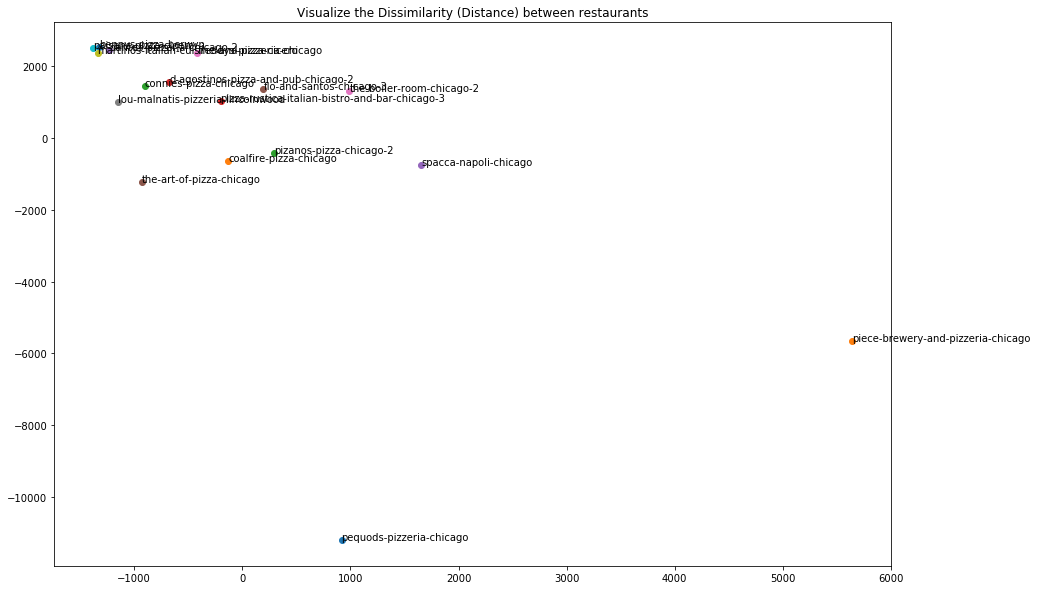

In [969]:
#visualizing distance - multidimensional scalings
# https://de.dariah.eu/tatom/working_with_text.html

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
#mtx_rstnt

# color-blind-friendly palette
plt.figure(figsize = (15,10))
for x, y, name in zip(xs, ys, mtx_rstnt):
    plt.scatter(x, y)
    plt.text(x, y, name)
    plt.title("Visualize the Dissimilarity (Distance) between restaurants")
    

plt.show()